<a href="https://colab.research.google.com/github/ajaikrishn/laptop-dataset/blob/main/laptop_price2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAPTOP PRICE PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

laptop_data=pd.read_csv('laptop_data.csv')
laptop_data

Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 12 columns]

## **EDA**

In [ ]:
laptop_data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
laptop_data.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
laptop_data.describe()

Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000

In [ ]:
laptop_data.describe(include='object')


Company  TypeName   ScreenResolution                         Cpu   Ram  \
count     1303      1303               1303                        1303  1303   
unique      19         6                 40                         118     9   
top       Dell  Notebook  Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
freq       297       727                507                         190   619   

           Memory                    Gpu       OpSys Weight  
count        1303                   1303        1303   1303  
unique         39                    110           9    179  
top     256GB SSD  Intel HD Graphics 620  Windows 10  2.2kg  
freq          412                    281        1072    121

In [ ]:
laptop_data=laptop_data.drop(columns=['Unnamed: 0'])
laptop_data

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 11 columns]

In [ ]:
for features in laptop_data:
  print(laptop_data[features].value_counts())
  print('\n')

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / T

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


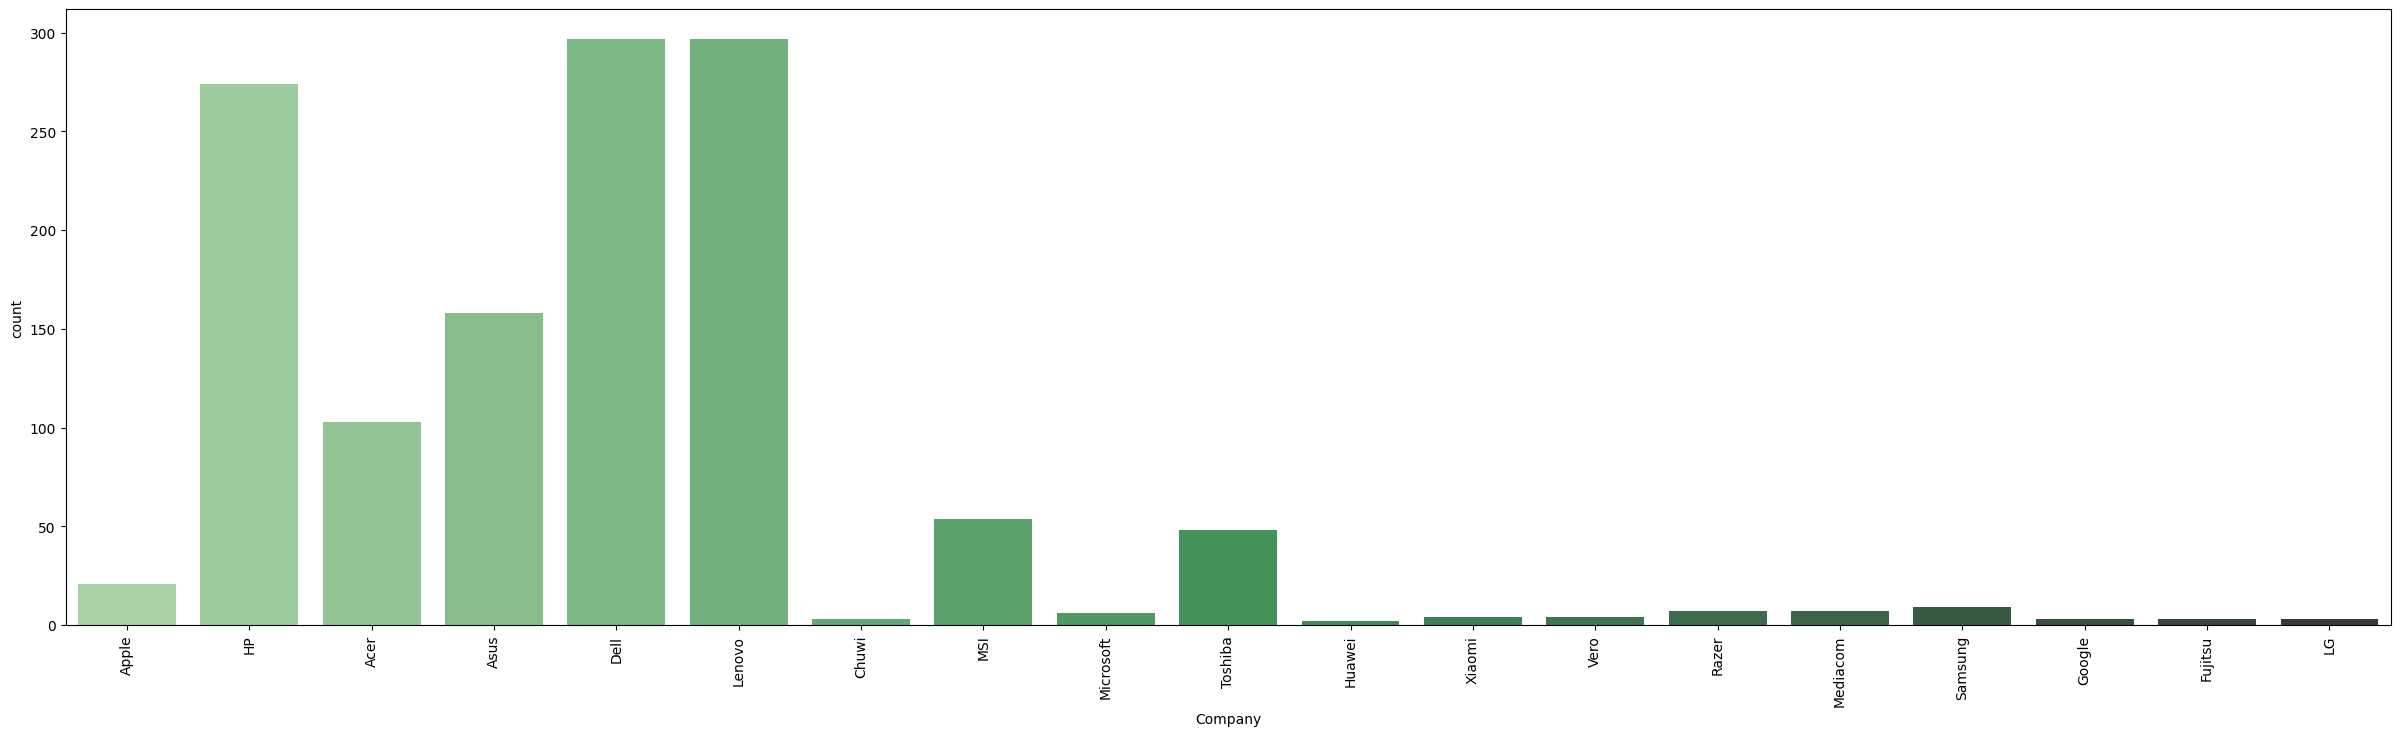

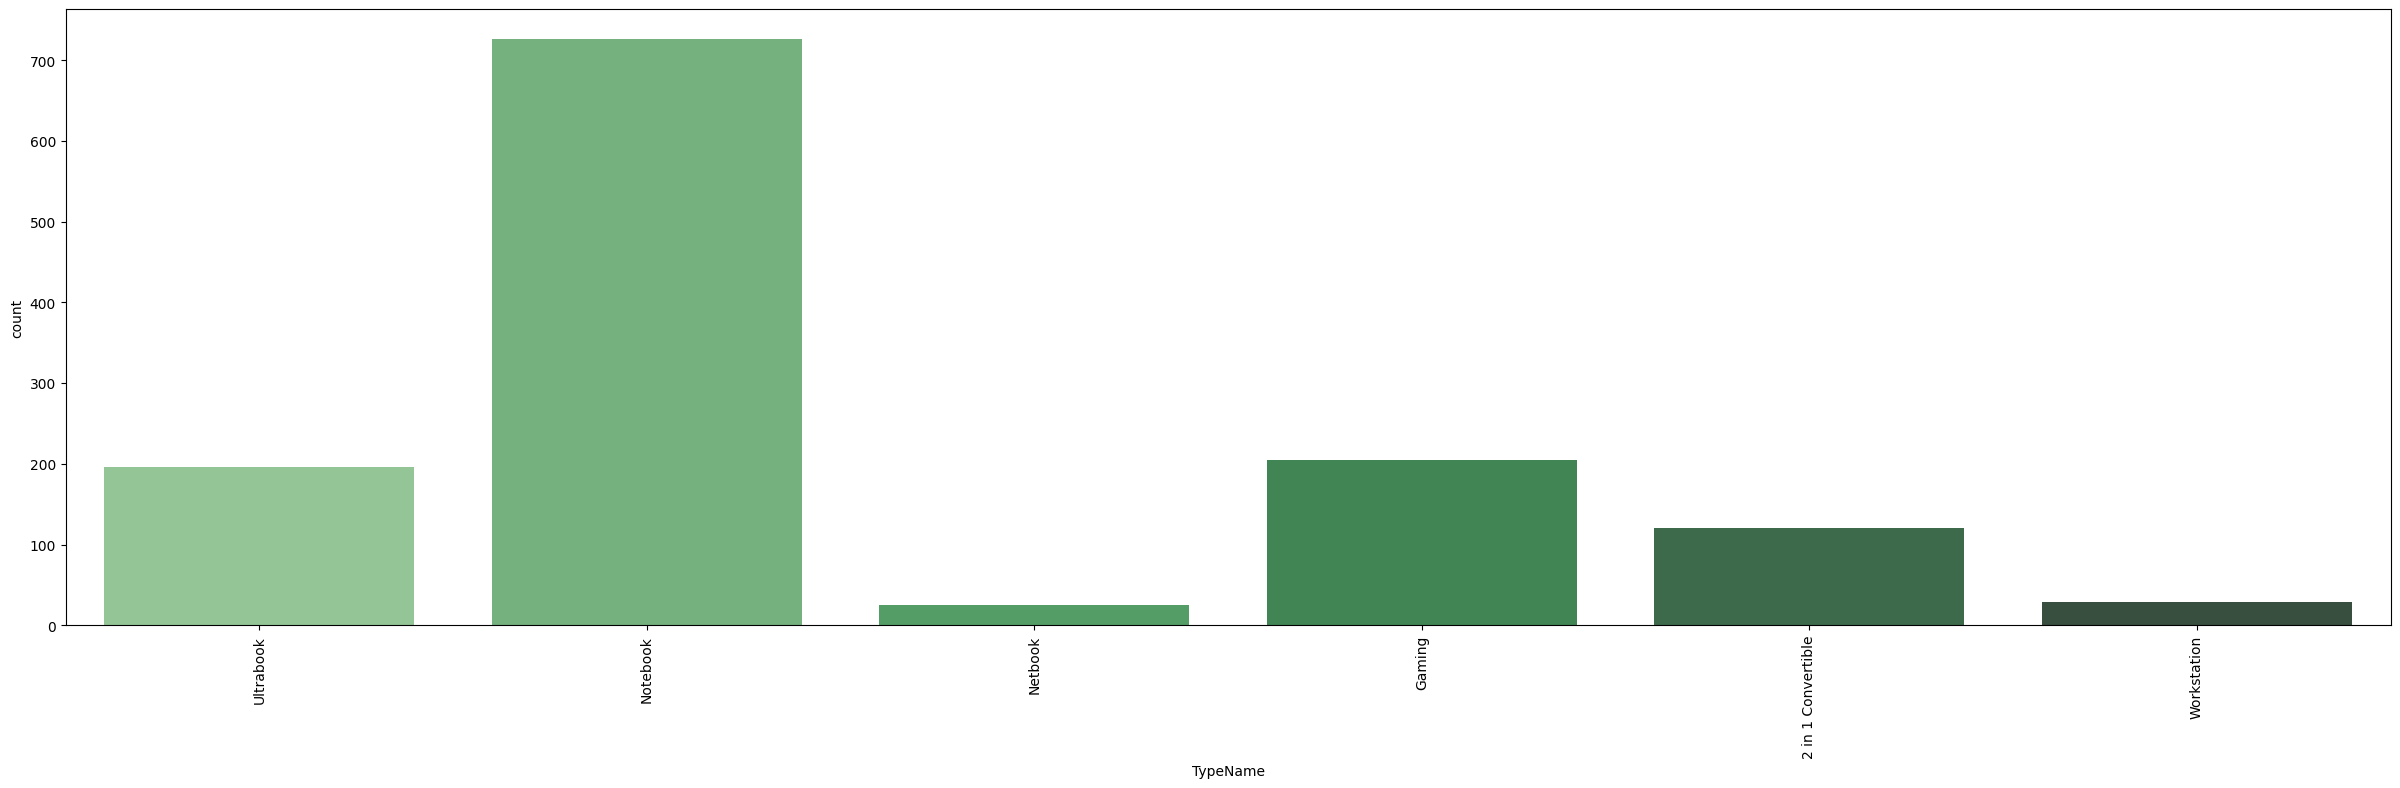

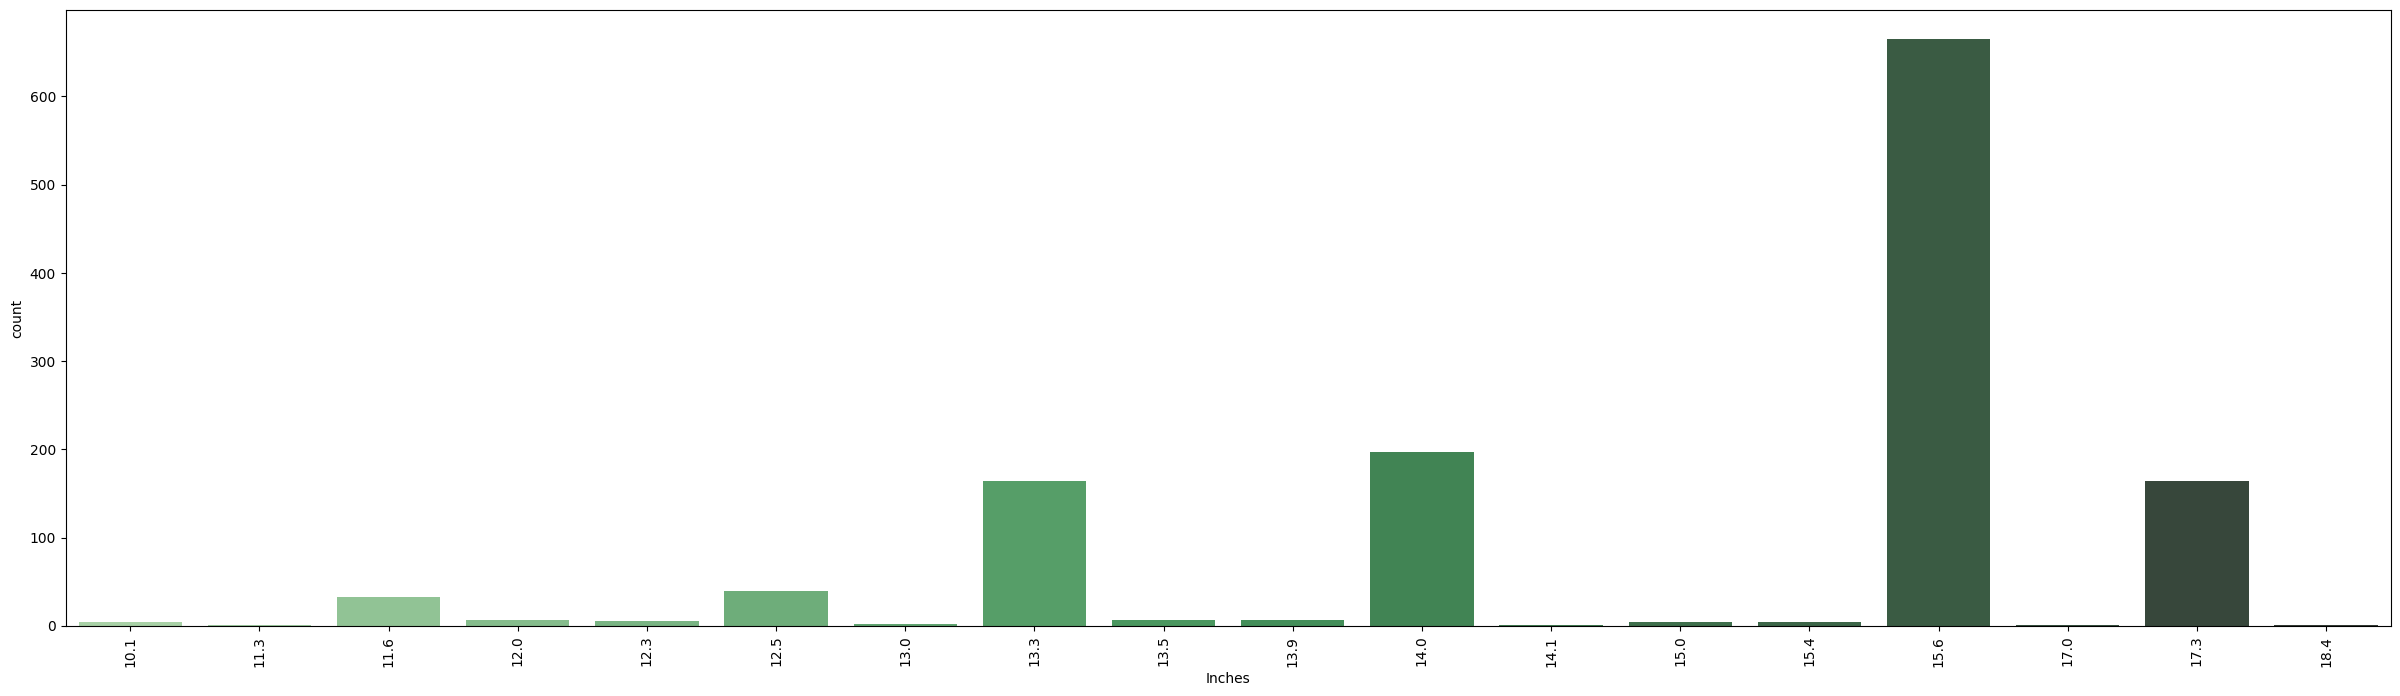

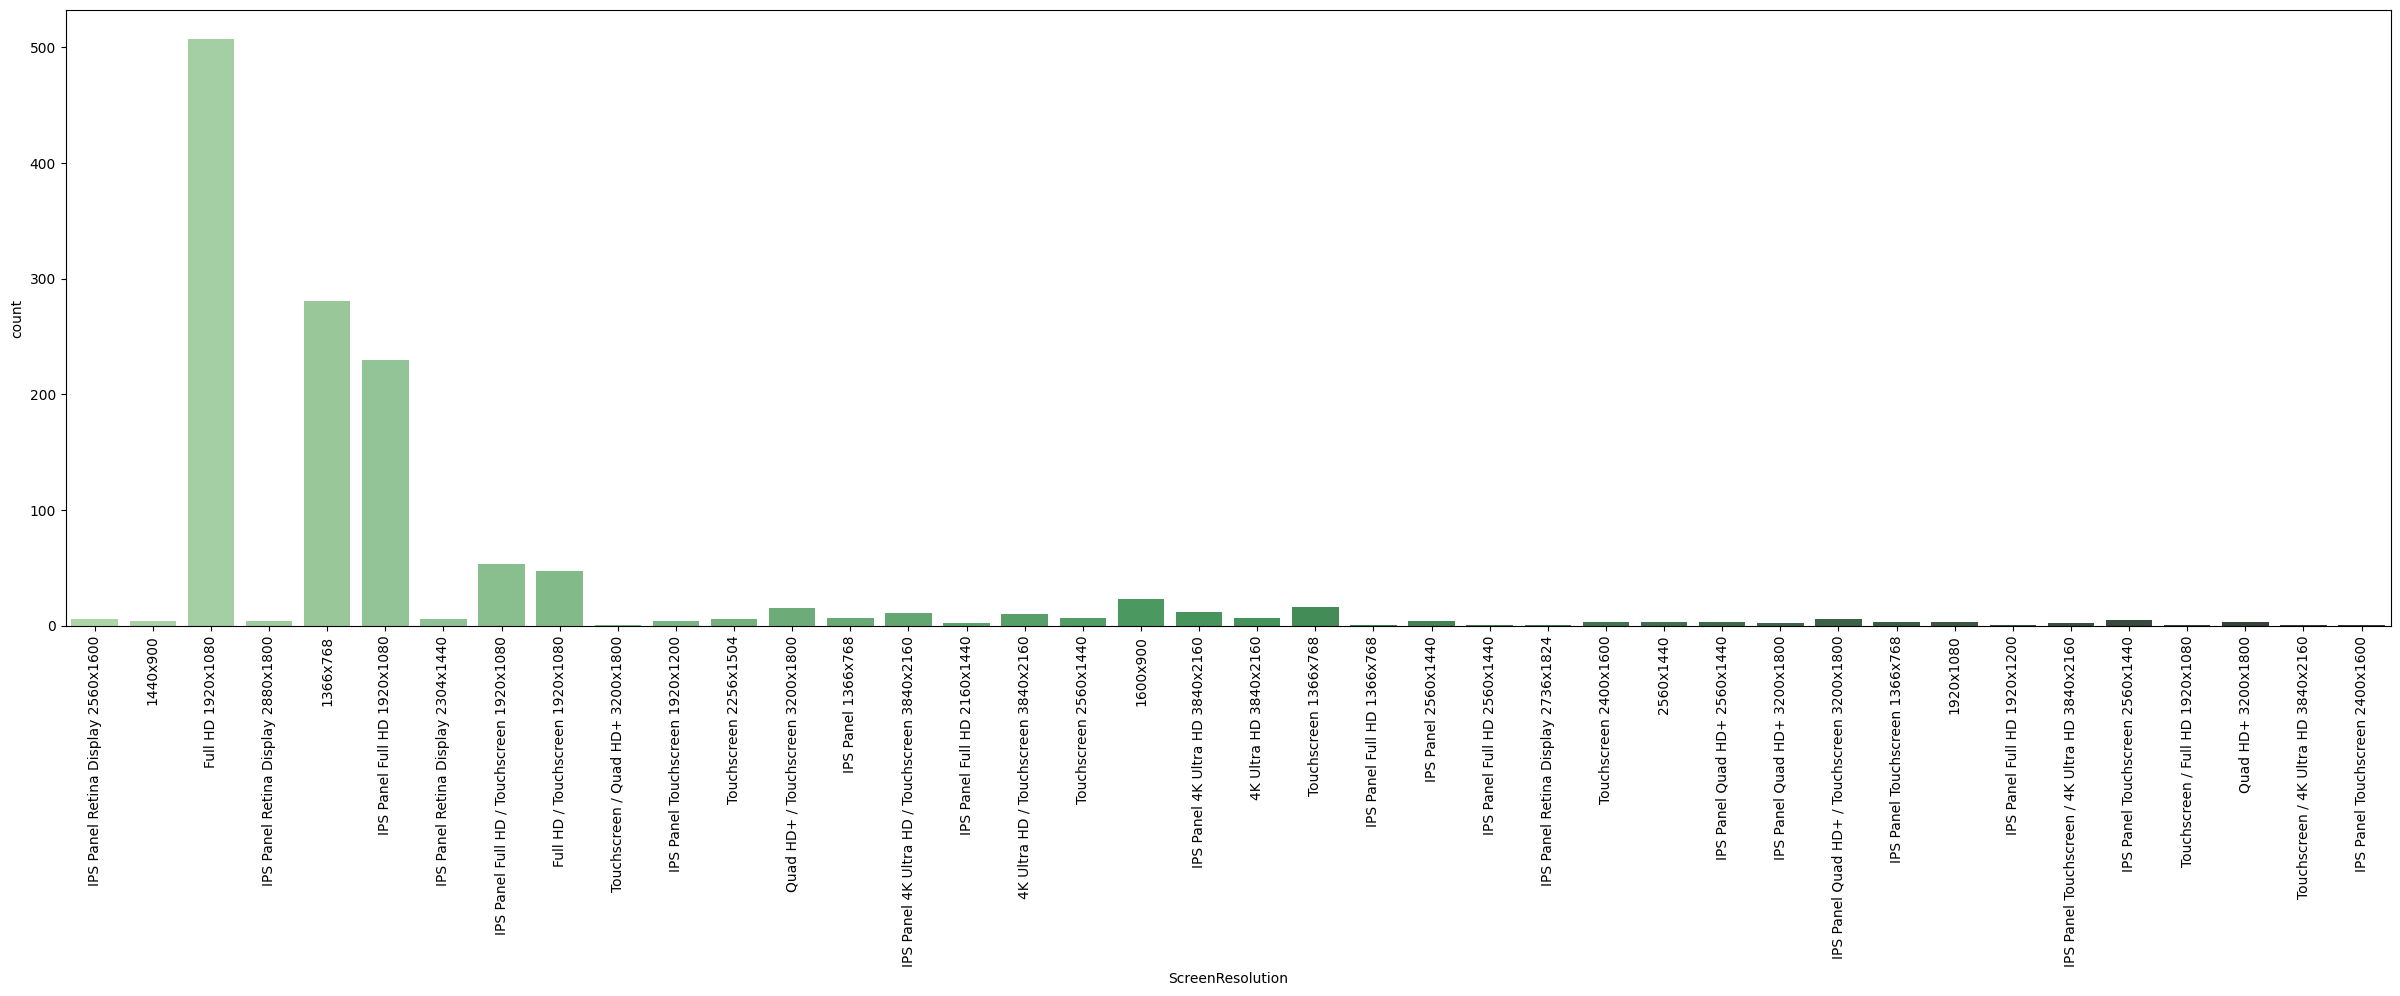

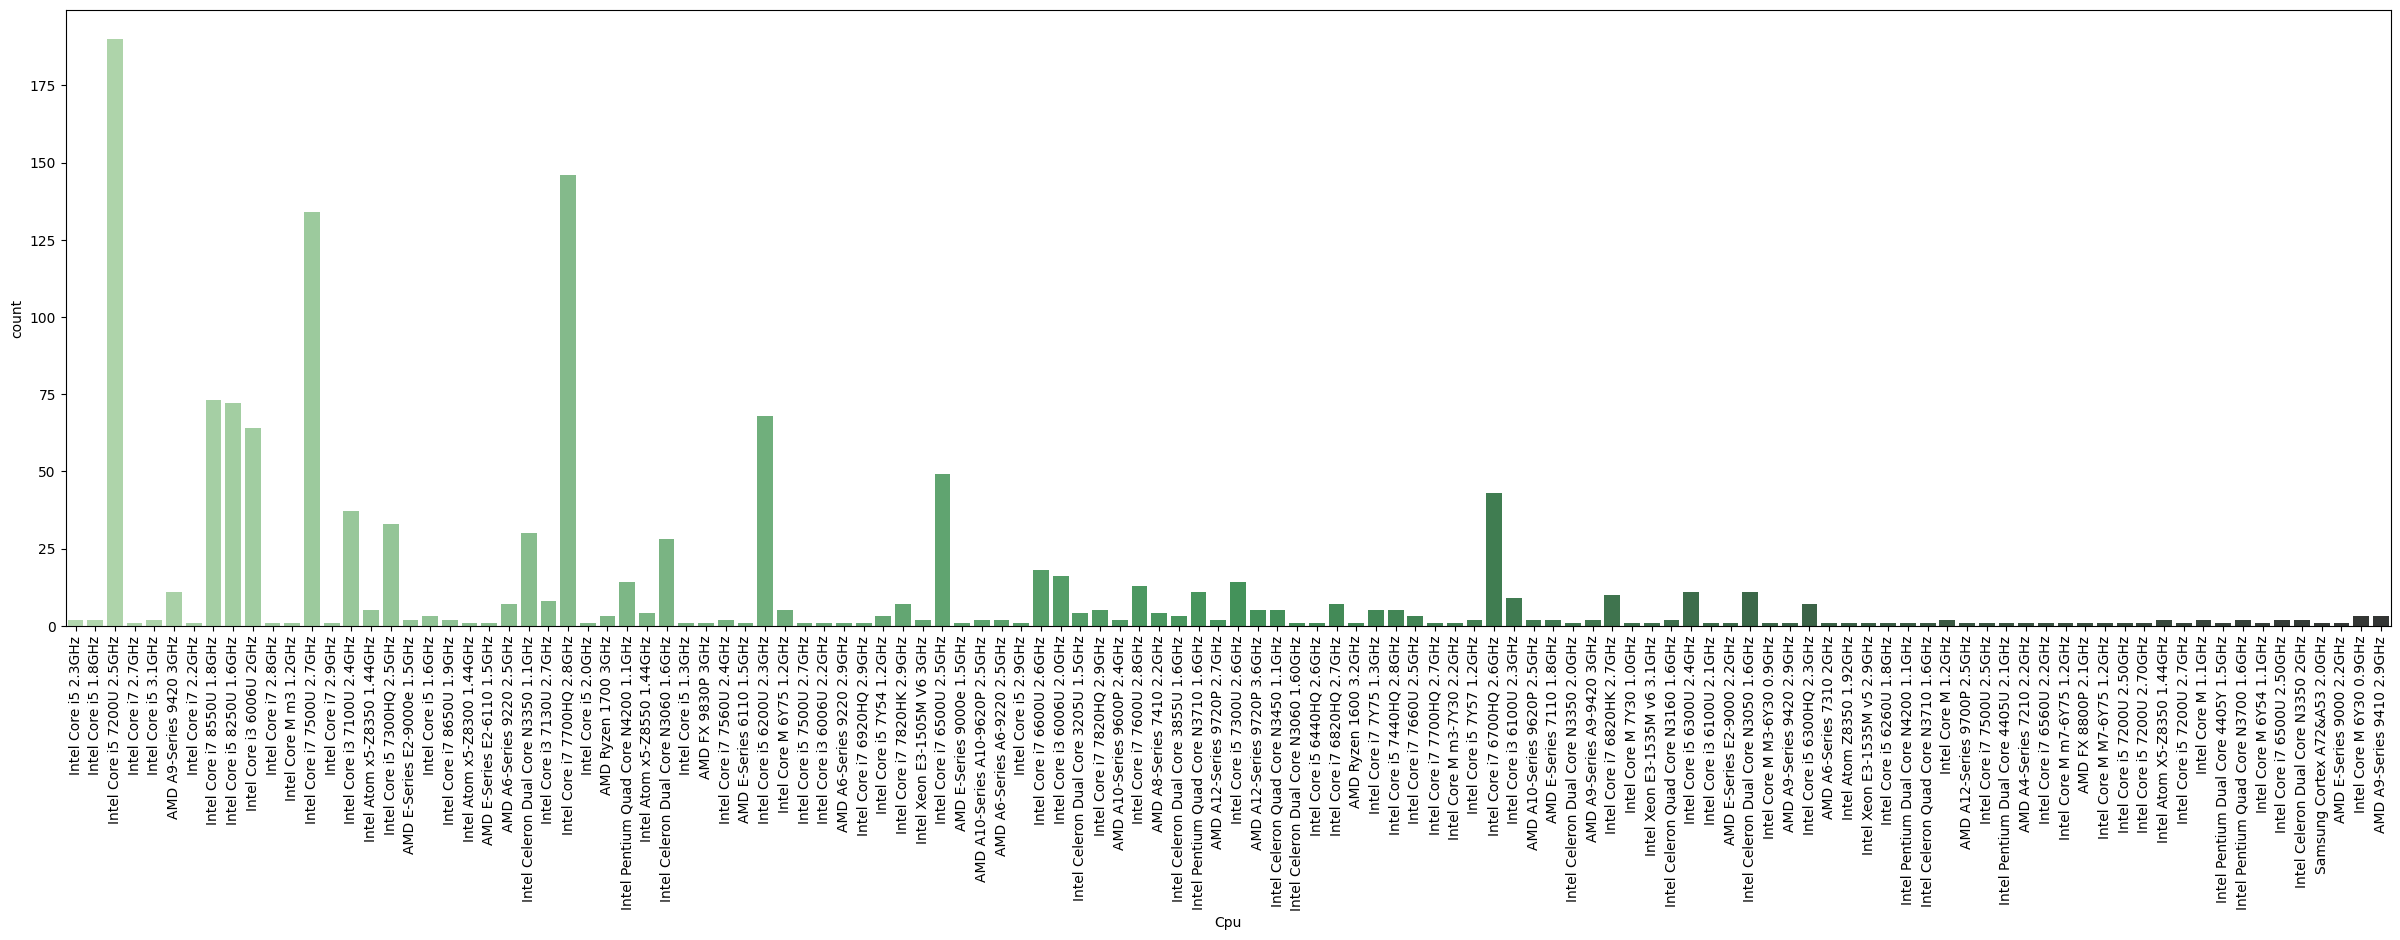

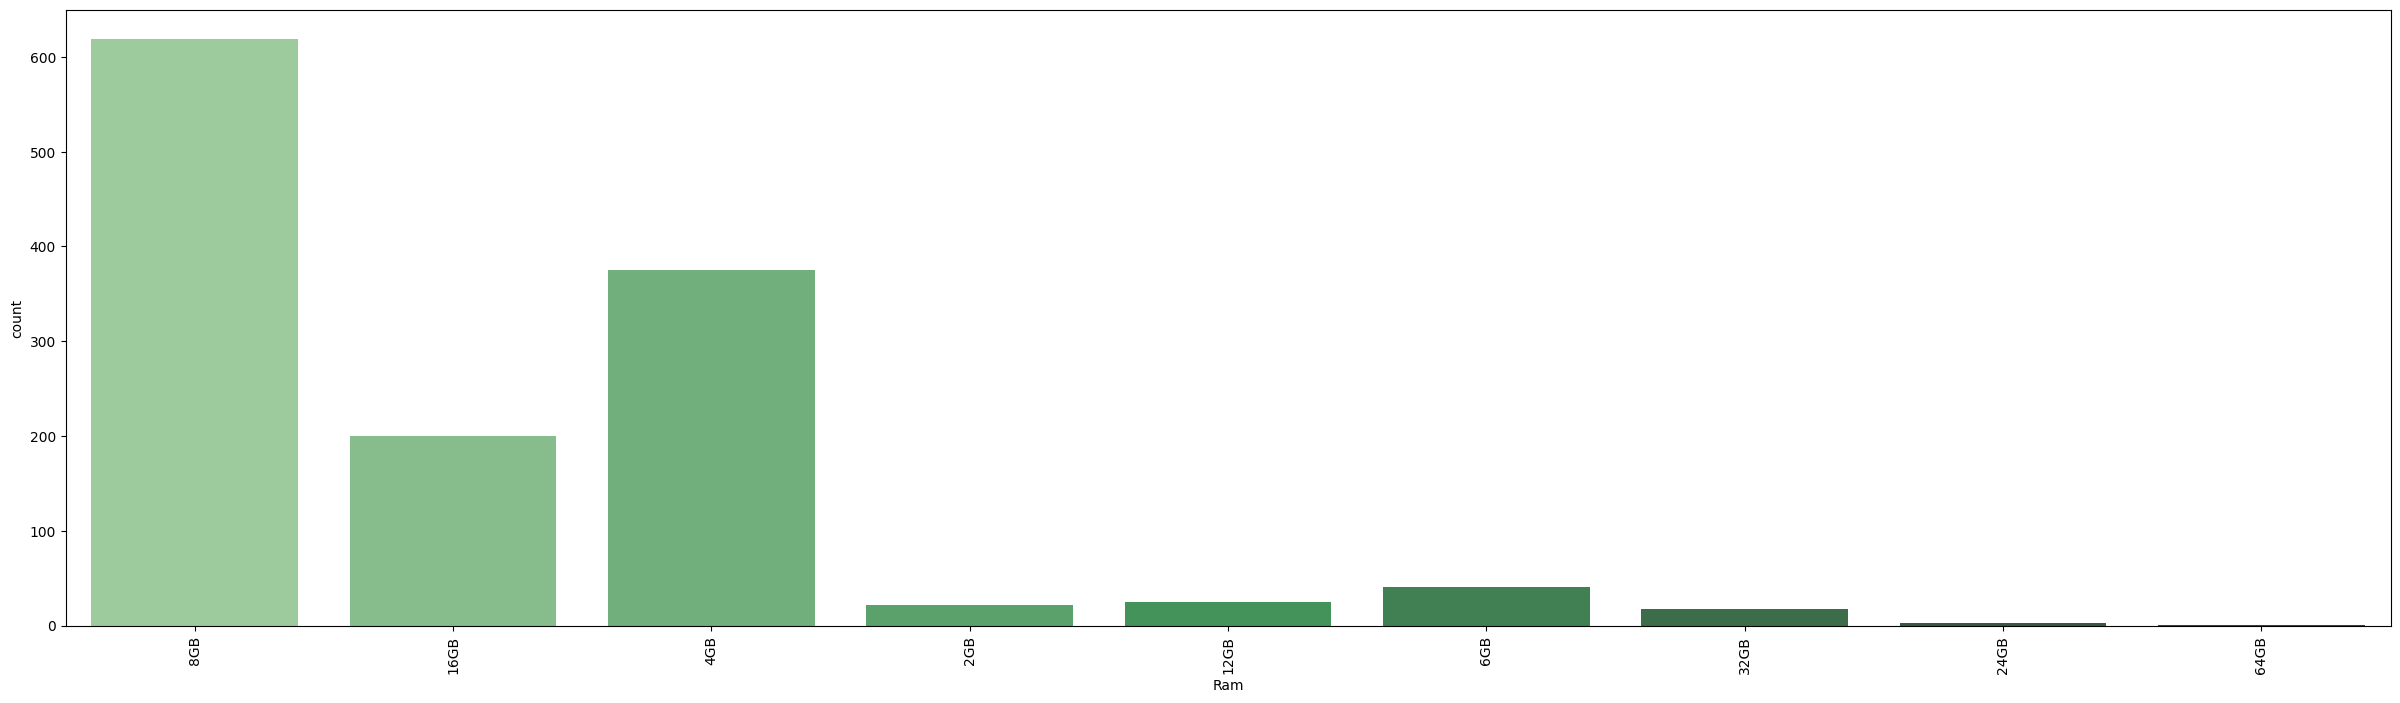

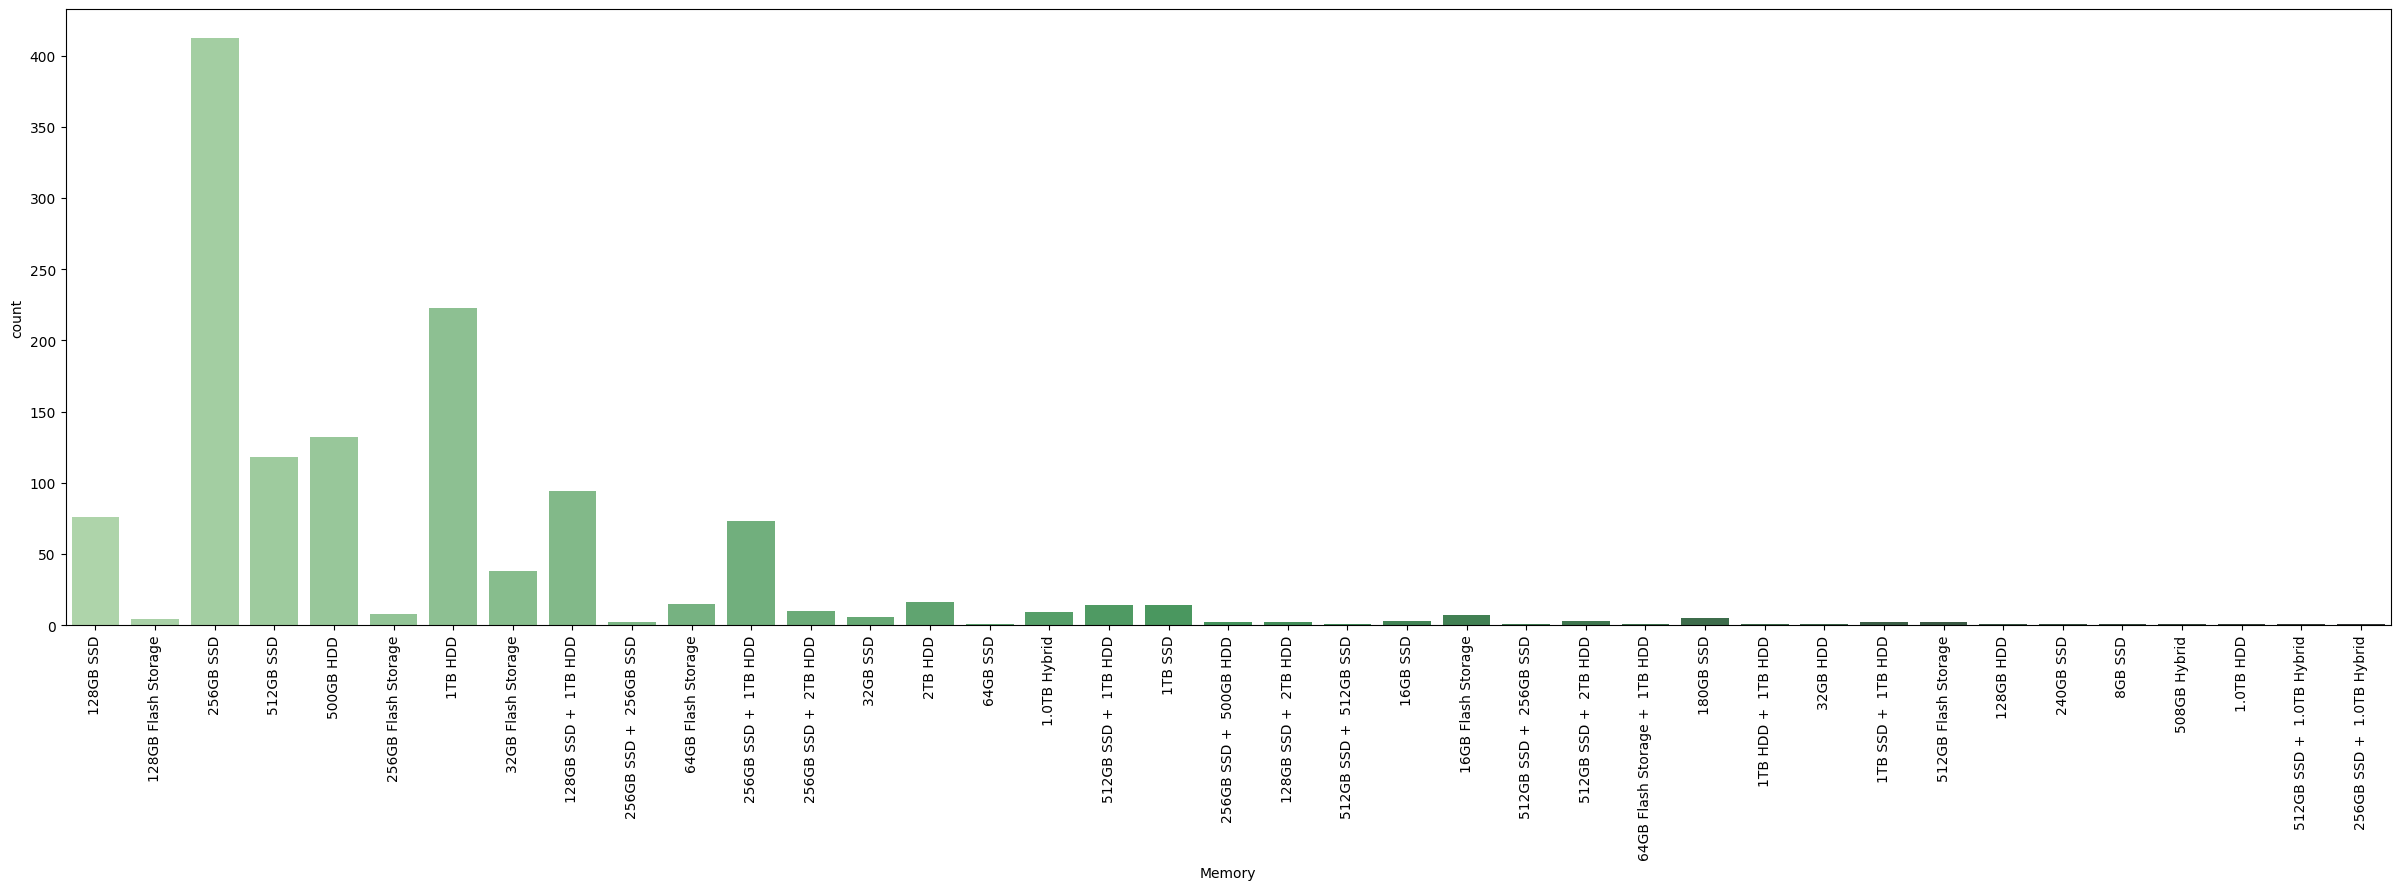

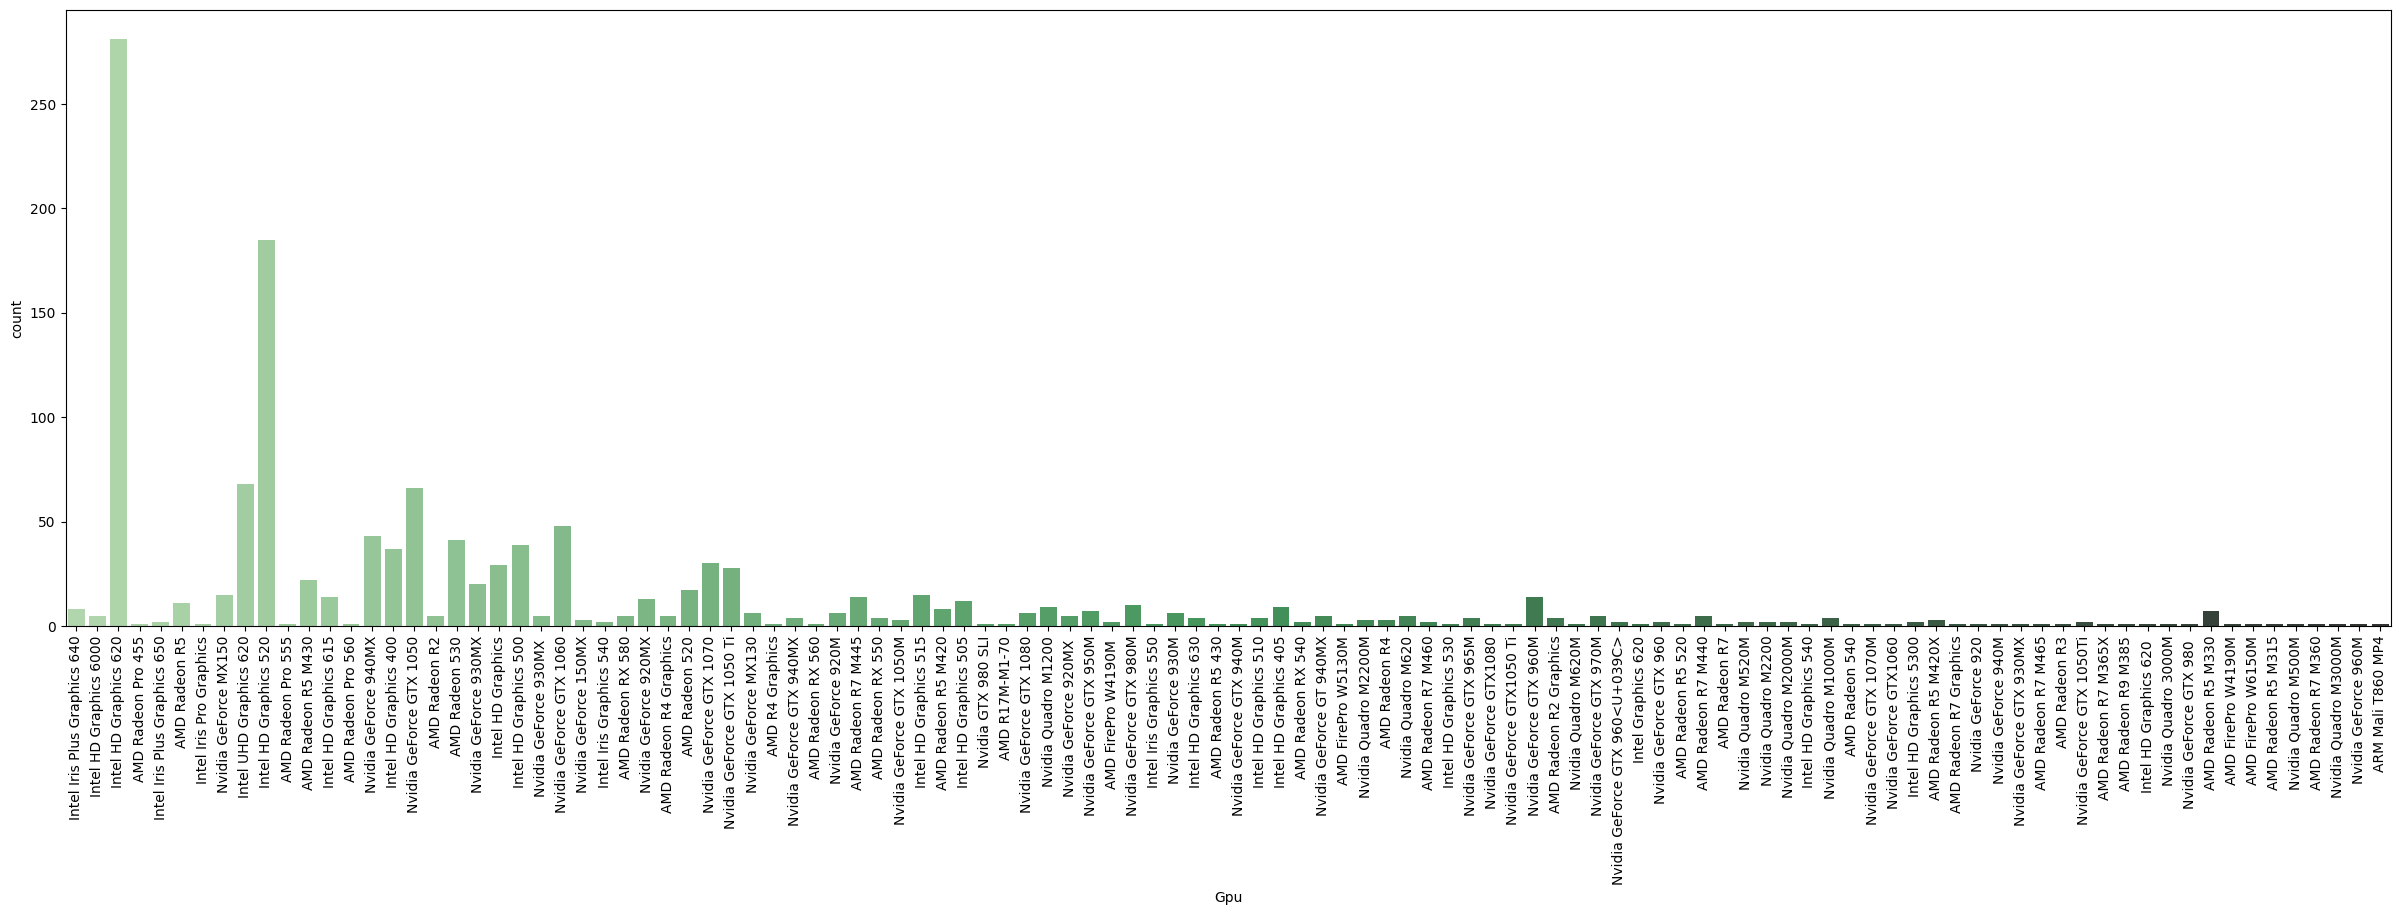

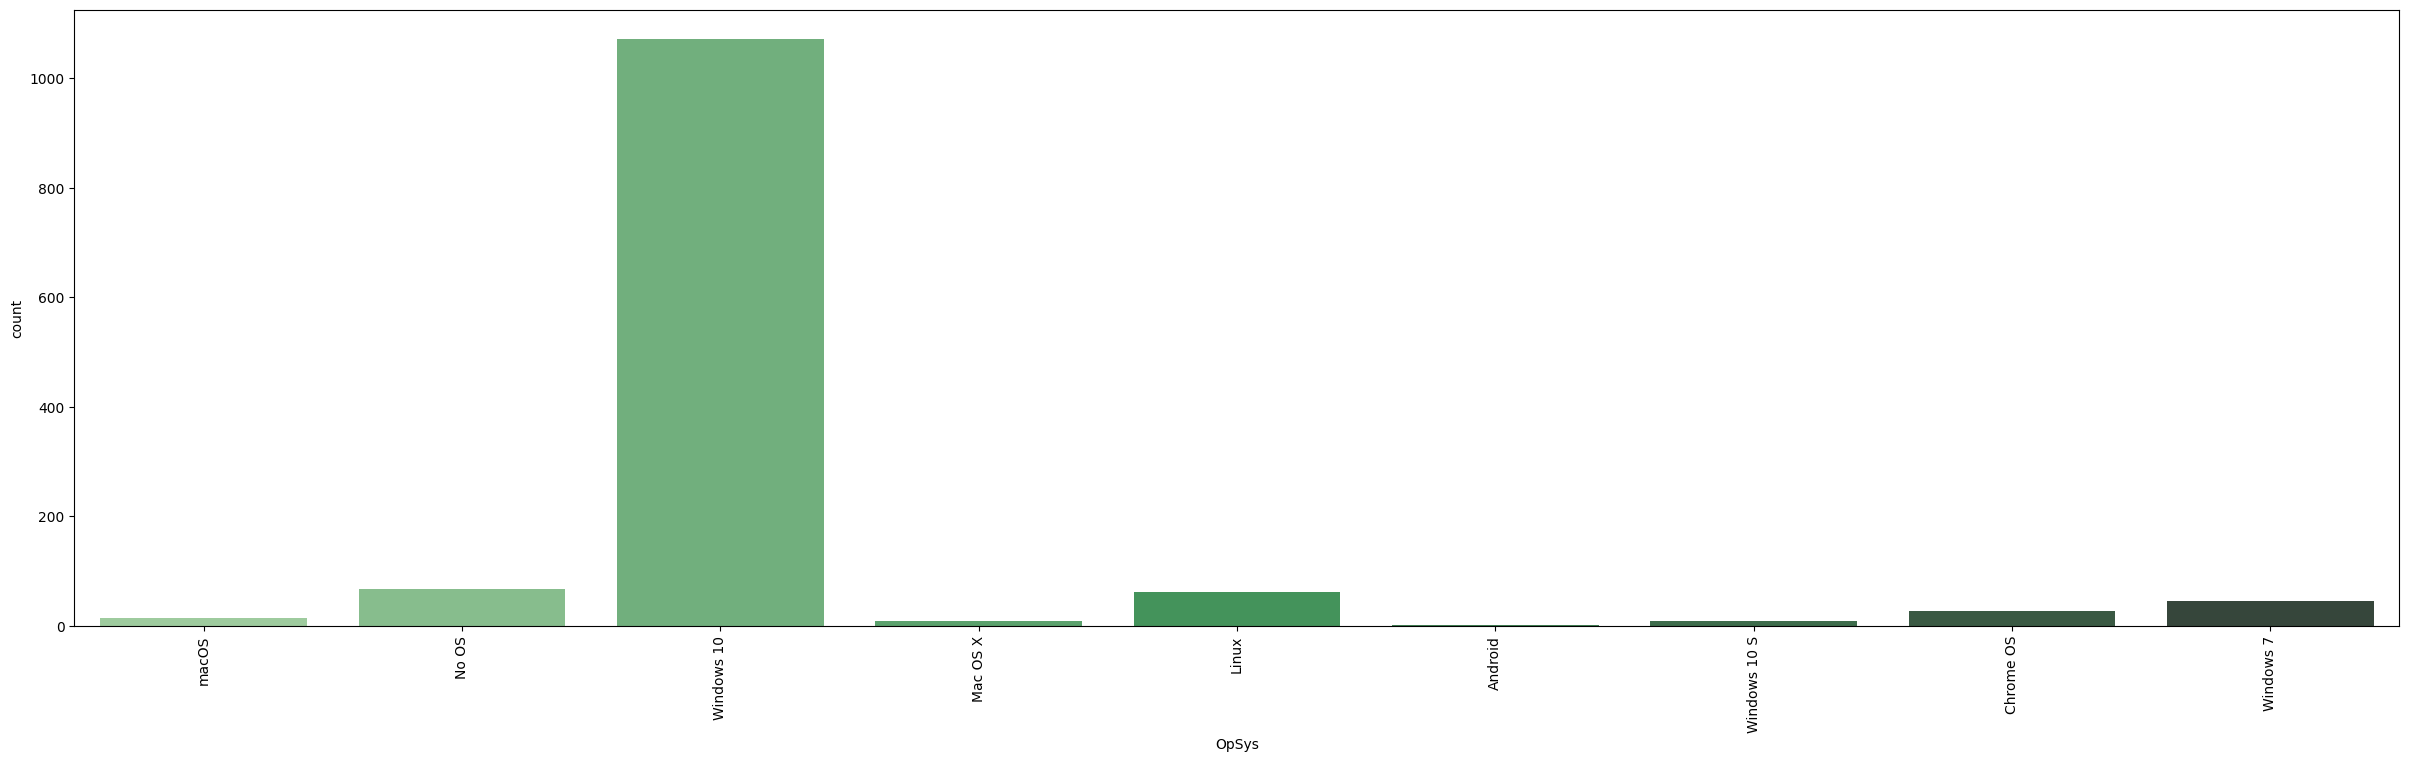

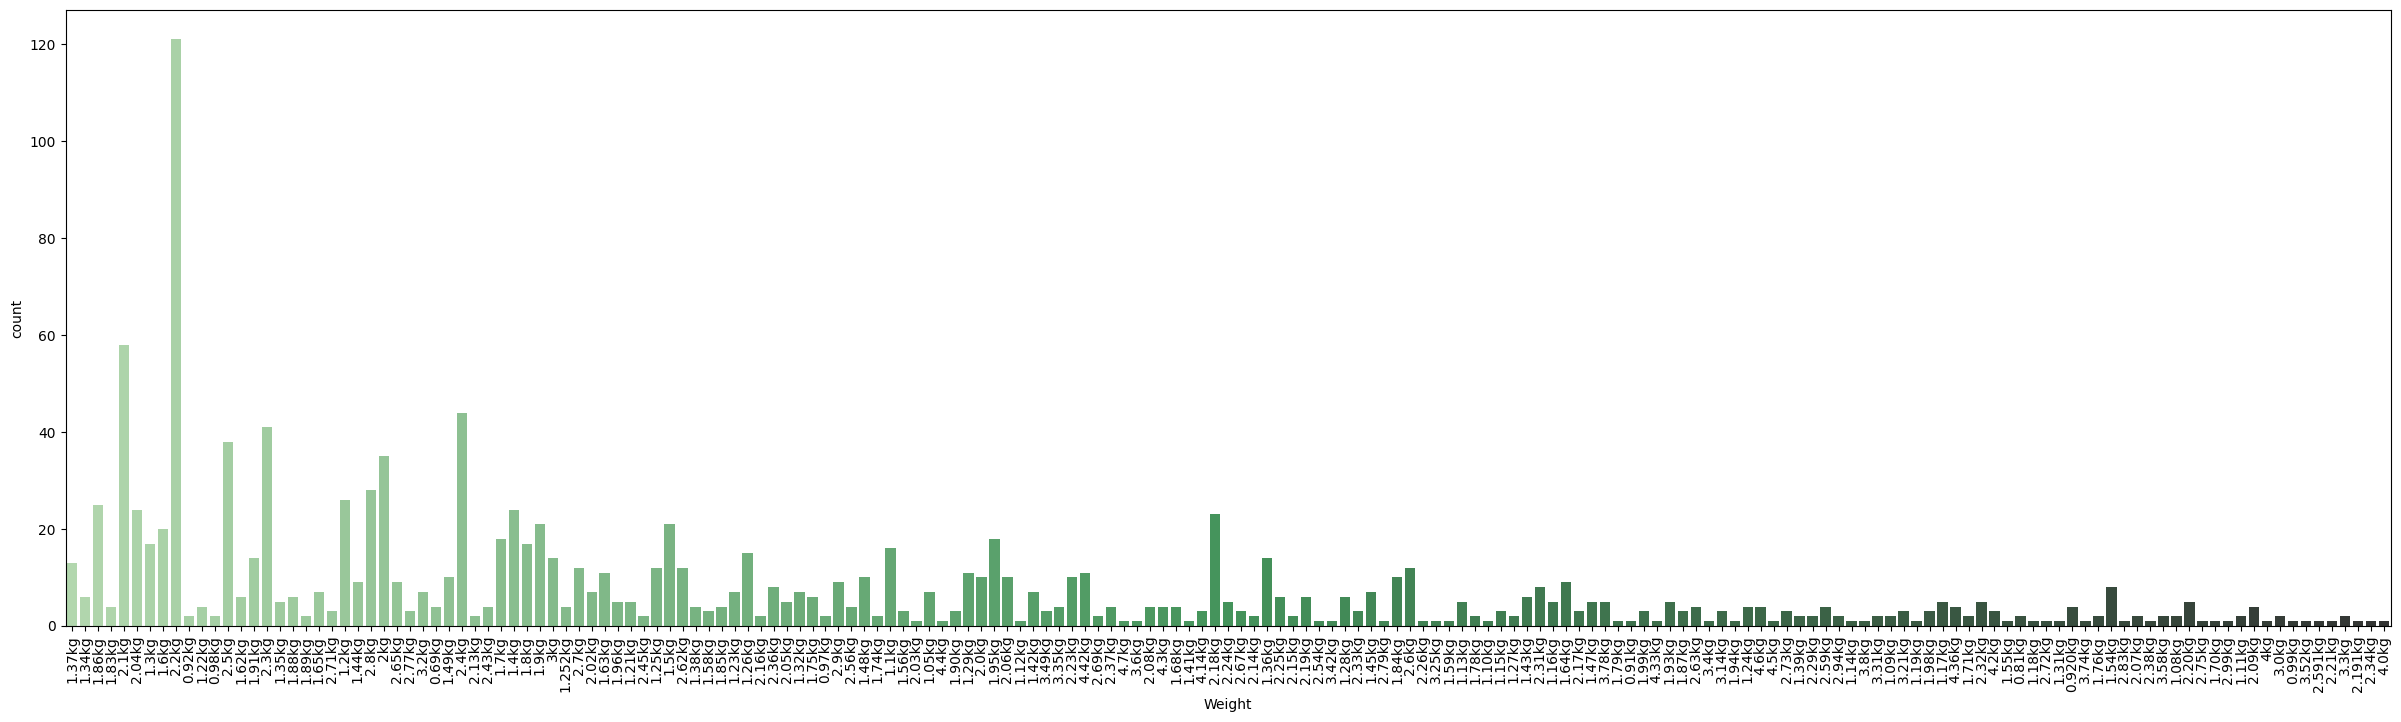

In [ ]:
for value in laptop_data.columns:
  if value != 'Price':
    plt.figure(figsize=(30,8))
    print(sns.countplot(x=value,data=laptop_data,palette='Greens_d'))
    plt.xticks(rotation=90)

## **FEATURE ENGINEERING**

In [ ]:
laptop_data['Ram']=laptop_data['Ram'].str.replace('GB','')
laptop_data['Weight']=laptop_data['Weight'].str.replace('kg','')
laptop_data

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu Ram               Memory  \
0                     Intel Core i5 2.3GHz   8            128GB SSD   
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1298            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight        Price  
0     Intel Iris Plus Graphics 640       macOS   1.37   71378.6832  
1           Intel HD Graphics 6000       macOS   1.34   47895.5232  
2            Intel HD Graphics 620       No OS   1.86   30636.0000  
3               AMD Radeon Pro 455       macOS   1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS   1.37   96095.8080  
...                            ...         ...    ...          ...  
1298         Intel HD Graphics 520  Windows 10    1.8   33992.6400  
1299         Intel HD Graphics 520  Windows 10    1.3   79866.7200  
1300             Intel HD Graphics  Windows 10    1.5   12201.1200  
1301            AMD Radeon R5 M330  Windows 10   2.19   40705.9200  
1302             Intel HD Graphics  Windows 10    2.2   19660.3200  

[1303 rows x 11 columns]

In [ ]:
features=laptop_data.drop(columns=['Price'])
features

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu Ram               Memory  \
0                     Intel Core i5 2.3GHz   8            128GB SSD   
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1298            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight  
0     Intel Iris Plus Graphics 640       macOS   1.37  
1           Intel HD Graphics 6000       macOS   1.34  
2            Intel HD Graphics 620       No OS   1.86  
3               AMD Radeon Pro 455       macOS   1.83  
4     Intel Iris Plus Graphics 650       macOS   1.37  
...                            ...         ...    ...  
1298         Intel HD Graphics 520  Windows 10    1.8  
1299         Intel HD Graphics 520  Windows 10    1.3  
1300             Intel HD Graphics  Windows 10    1.5  
1301            AMD Radeon R5 M330  Windows 10   2.19  
1302             Intel HD Graphics  Windows 10    2.2  

[1303 rows x 10 columns]

In [ ]:
target=laptop_data['Price']
target

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

## **COMPANY**

In [ ]:
features=features.join(pd.get_dummies(features['Company']))
features=features.drop(columns=['Company'])
features

TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu Ram               Memory  \
0                     Intel Core i5 2.3GHz   8            128GB SSD   
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1298            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight   Acer  ...     LG  \
0     Intel Iris Plus Graphics 640       macOS   1.37  False  ...  False   
1           Intel HD Graphics 6000       macOS   1.34  False  ...  False   
2            Intel HD Graphics 620       No OS   1.86  False  ...  False   
3               AMD Radeon Pro 455       macOS   1.83  False  ...  False   
4     Intel Iris Plus Graphics 650       macOS   1.37  False  ...  False   
...                            ...         ...    ...    ...  ...    ...   
1298         Intel HD Graphics 520  Windows 10    1.8  False  ...  False   
1299         Intel HD Graphics 520  Windows 10    1.3  False  ...  False   
1300             Intel HD Graphics  Windows 10    1.5  False  ...  False   
1301            AMD Radeon R5 M330  Windows 10   2.19  False  ...  False   
1302             Intel HD Graphics  Windows 10    2.2  False  ...  False   

      Lenovo    MSI  Mediacom  Microsoft  Razer  Samsung  Toshiba   Vero  \
0      False  False     False      False  False    False    False  False   
1      False  False     False      False  False    False    False  False   
2      False  False     False      False  False    False    False  False   
3      False  False     False      False  False    False    False  False   
4      False  False     False      False  False    False    False  False   
...      ...    ...       ...        ...    ...      ...      ...    ...   
1298    True  False     False      False  False    False    False  False   
1299    True  False     False      False  False    False    False  False   
1300    True  False     False      False  False    False    False  False   
1301   False  False     False      False  False    False    False  False   
1302   False  False     False      False  False    False    False  False   

      Xiaomi  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
1298   False  
1299   False  
1300   False  
1301   False  
1302   False  

[1303 rows x 28 columns]

**TYPE NAME**

In [ ]:
features=features.join(pd.get_dummies(features['TypeName']))
features=features.drop(columns=['TypeName'])
features

Inches                            ScreenResolution  \
0       13.3          IPS Panel Retina Display 2560x1600   
1       13.3                                    1440x900   
2       15.6                           Full HD 1920x1080   
3       15.4          IPS Panel Retina Display 2880x1800   
4       13.3          IPS Panel Retina Display 2560x1600   
...      ...                                         ...   
1298    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300    14.0                                    1366x768   
1301    15.6                                    1366x768   
1302    15.6                                    1366x768   

                                       Cpu Ram               Memory  \
0                     Intel Core i5 2.3GHz   8            128GB SSD   
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1298            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight   Acer  Apple  ...  \
0     Intel Iris Plus Graphics 640       macOS   1.37  False   True  ...   
1           Intel HD Graphics 6000       macOS   1.34  False   True  ...   
2            Intel HD Graphics 620       No OS   1.86  False  False  ...   
3               AMD Radeon Pro 455       macOS   1.83  False   True  ...   
4     Intel Iris Plus Graphics 650       macOS   1.37  False   True  ...   
...                            ...         ...    ...    ...    ...  ...   
1298         Intel HD Graphics 520  Windows 10    1.8  False  False  ...   
1299         Intel HD Graphics 520  Windows 10    1.3  False  False  ...   
1300             Intel HD Graphics  Windows 10    1.5  False  False  ...   
1301            AMD Radeon R5 M330  Windows 10   2.19  False  False  ...   
1302             Intel HD Graphics  Windows 10    2.2  False  False  ...   

      Samsung  Toshiba   Vero  Xiaomi  2 in 1 Convertible  Gaming  Netbook  \
0       False    False  False   False               False   False    False   
1       False    False  False   False               False   False    False   
2       False    False  False   False               False   False    False   
3       False    False  False   False               False   False    False   
4       False    False  False   False               False   False    False   
...       ...      ...    ...     ...                 ...     ...      ...   
1298    False    False  False   False                True   False    False   
1299    False    False  False   False                True   False    False   
1300    False    False  False   False               False   False    False   
1301    False    False  False   False               False   False    False   
1302    False    False  False   False               False   False    False   

      Notebook  Ultrabook  Workstation  
0        False       True        False  
1        False       True        False  
2         True      False        False  
3        False       True        False  
4        False       True        False  
...        ...        ...          ...  
1298     False      False        False  
1299     False      False        False  
1300      True      False        False  
1301      True      False        False  
1302      True      False        False  

[1303 rows x 33 columns]

**SCREEN RESOLUTION**

In [ ]:
features['Touchscreen']=features['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
features['IPS']=features['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
features

Inches                            ScreenResolution  \
0       13.3          IPS Panel Retina Display 2560x1600   
1       13.3                                    1440x900   
2       15.6                           Full HD 1920x1080   
3       15.4          IPS Panel Retina Display 2880x1800   
4       13.3          IPS Panel Retina Display 2560x1600   
...      ...                                         ...   
1298    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300    14.0                                    1366x768   
1301    15.6                                    1366x768   
1302    15.6                                    1366x768   

                                       Cpu Ram               Memory  \
0                     Intel Core i5 2.3GHz   8            128GB SSD   
1                     Intel Core i5 1.8GHz   8  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3                     Intel Core i7 2.7GHz  16            512GB SSD   
4                     Intel Core i5 3.1GHz   8            256GB SSD   
...                                    ...  ..                  ...   
1298            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight   Acer  Apple  ...  \
0     Intel Iris Plus Graphics 640       macOS   1.37  False   True  ...   
1           Intel HD Graphics 6000       macOS   1.34  False   True  ...   
2            Intel HD Graphics 620       No OS   1.86  False  False  ...   
3               AMD Radeon Pro 455       macOS   1.83  False   True  ...   
4     Intel Iris Plus Graphics 650       macOS   1.37  False   True  ...   
...                            ...         ...    ...    ...    ...  ...   
1298         Intel HD Graphics 520  Windows 10    1.8  False  False  ...   
1299         Intel HD Graphics 520  Windows 10    1.3  False  False  ...   
1300             Intel HD Graphics  Windows 10    1.5  False  False  ...   
1301            AMD Radeon R5 M330  Windows 10   2.19  False  False  ...   
1302             Intel HD Graphics  Windows 10    2.2  False  False  ...   

       Vero  Xiaomi  2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  \
0     False   False               False   False    False     False       True   
1     False   False               False   False    False     False       True   
2     False   False               False   False    False      True      False   
3     False   False               False   False    False     False       True   
4     False   False               False   False    False     False       True   
...     ...     ...                 ...     ...      ...       ...        ...   
1298  False   False                True   False    False     False      False   
1299  False   False                True   False    False     False      False   
1300  False   False               False   False    False      True      False   
1301  False   False               False   False    False      True      False   
1302  False   False               False   False    False      True      False   

      Workstation  Touchscreen  IPS  
0           False            0    1  
1           False            0    0  
2           False            0    0  
3           False            0    1  
4           False            0    1  
...           ...          ...  ...  
1298        False            1    1  
1299        False            1    1  
1300        False            0    0  
1301        False            0    0  
1302        False            0    0  

[1303 rows x 35 columns]

<Axes: xlabel='Touchscreen', ylabel='Price'>

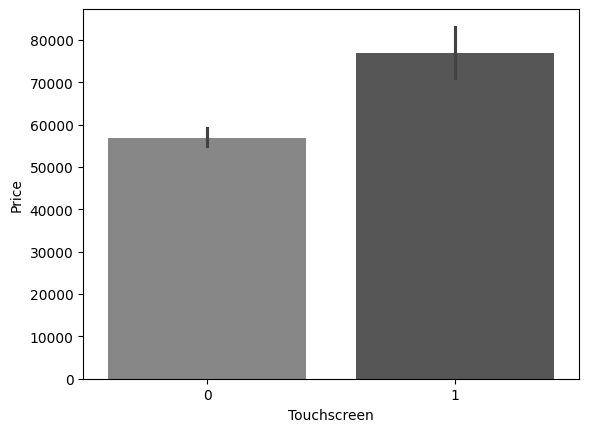

In [ ]:
sns.barplot(x=features['Touchscreen'],y=target,palette='Greys_d')

In [ ]:
features["ScreenResolution"] = features['ScreenResolution'].str.split(" ").apply(lambda x: x[-1])
features["ScreenWidth"] =features['ScreenResolution'].str.split("x").apply(lambda x: x[0]).astype(int)
features["ScreenHeight"] =features['ScreenResolution'].str.split("x").apply(lambda x: x[1]).astype(int)
features

Inches ScreenResolution                                   Cpu Ram  \
0       13.3        2560x1600                  Intel Core i5 2.3GHz   8   
1       13.3         1440x900                  Intel Core i5 1.8GHz   8   
2       15.6        1920x1080            Intel Core i5 7200U 2.5GHz   8   
3       15.4        2880x1800                  Intel Core i7 2.7GHz  16   
4       13.3        2560x1600                  Intel Core i5 3.1GHz   8   
...      ...              ...                                   ...  ..   
1298    14.0        1920x1080            Intel Core i7 6500U 2.5GHz   4   
1299    13.3        3200x1800            Intel Core i7 6500U 2.5GHz  16   
1300    14.0         1366x768  Intel Celeron Dual Core N3050 1.6GHz   2   
1301    15.6         1366x768            Intel Core i7 6500U 2.5GHz   6   
1302    15.6         1366x768  Intel Celeron Dual Core N3050 1.6GHz   4   

                   Memory                           Gpu       OpSys Weight  \
0               128GB SSD  Intel Iris Plus Graphics 640       macOS   1.37   
1     128GB Flash Storage        Intel HD Graphics 6000       macOS   1.34   
2               256GB SSD         Intel HD Graphics 620       No OS   1.86   
3               512GB SSD            AMD Radeon Pro 455       macOS   1.83   
4               256GB SSD  Intel Iris Plus Graphics 650       macOS   1.37   
...                   ...                           ...         ...    ...   
1298            128GB SSD         Intel HD Graphics 520  Windows 10    1.8   
1299            512GB SSD         Intel HD Graphics 520  Windows 10    1.3   
1300   64GB Flash Storage             Intel HD Graphics  Windows 10    1.5   
1301              1TB HDD            AMD Radeon R5 M330  Windows 10   2.19   
1302            500GB HDD             Intel HD Graphics  Windows 10    2.2   

       Acer  Apple  ...  2 in 1 Convertible  Gaming  Netbook  Notebook  \
0     False   True  ...               False   False    False     False   
1     False   True  ...               False   False    False     False   
2     False  False  ...               False   False    False      True   
3     False   True  ...               False   False    False     False   
4     False   True  ...               False   False    False     False   
...     ...    ...  ...                 ...     ...      ...       ...   
1298  False  False  ...                True   False    False     False   
1299  False  False  ...                True   False    False     False   
1300  False  False  ...               False   False    False      True   
1301  False  False  ...               False   False    False      True   
1302  False  False  ...               False   False    False      True   

      Ultrabook  Workstation  Touchscreen  IPS  ScreenWidth  ScreenHeight  
0          True        False            0    1         2560          1600  
1          True        False            0    0         1440           900  
2         False        False            0    0         1920          1080  
3          True        False            0    1         2880          1800  
4          True        False            0    1         2560          1600  
...         ...          ...          ...  ...          ...           ...  
1298      False        False            1    1         1920          1080  
1299      False        False            1    1         3200          1800  
1300      False        False            0    0         1366           768  
1301      False        False            0    0         1366           768  
1302      False        False            0    0         1366           768  

[1303 rows x 37 columns]

**PPI**

In [ ]:
features['Ppi']=(((features['ScreenHeight']**2)+(features['ScreenWidth']**2))**0.5/features['Inches']).astype(float)
features

Inches ScreenResolution                                   Cpu Ram  \
0       13.3        2560x1600                  Intel Core i5 2.3GHz   8   
1       13.3         1440x900                  Intel Core i5 1.8GHz   8   
2       15.6        1920x1080            Intel Core i5 7200U 2.5GHz   8   
3       15.4        2880x1800                  Intel Core i7 2.7GHz  16   
4       13.3        2560x1600                  Intel Core i5 3.1GHz   8   
...      ...              ...                                   ...  ..   
1298    14.0        1920x1080            Intel Core i7 6500U 2.5GHz   4   
1299    13.3        3200x1800            Intel Core i7 6500U 2.5GHz  16   
1300    14.0         1366x768  Intel Celeron Dual Core N3050 1.6GHz   2   
1301    15.6         1366x768            Intel Core i7 6500U 2.5GHz   6   
1302    15.6         1366x768  Intel Celeron Dual Core N3050 1.6GHz   4   

                   Memory                           Gpu       OpSys Weight  \
0               128GB SSD  Intel Iris Plus Graphics 640       macOS   1.37   
1     128GB Flash Storage        Intel HD Graphics 6000       macOS   1.34   
2               256GB SSD         Intel HD Graphics 620       No OS   1.86   
3               512GB SSD            AMD Radeon Pro 455       macOS   1.83   
4               256GB SSD  Intel Iris Plus Graphics 650       macOS   1.37   
...                   ...                           ...         ...    ...   
1298            128GB SSD         Intel HD Graphics 520  Windows 10    1.8   
1299            512GB SSD         Intel HD Graphics 520  Windows 10    1.3   
1300   64GB Flash Storage             Intel HD Graphics  Windows 10    1.5   
1301              1TB HDD            AMD Radeon R5 M330  Windows 10   2.19   
1302            500GB HDD             Intel HD Graphics  Windows 10    2.2   

       Acer  Apple  ...  Gaming  Netbook  Notebook  Ultrabook  Workstation  \
0     False   True  ...   False    False     False       True        False   
1     False   True  ...   False    False     False       True        False   
2     False  False  ...   False    False      True      False        False   
3     False   True  ...   False    False     False       True        False   
4     False   True  ...   False    False     False       True        False   
...     ...    ...  ...     ...      ...       ...        ...          ...   
1298  False  False  ...   False    False     False      False        False   
1299  False  False  ...   False    False     False      False        False   
1300  False  False  ...   False    False      True      False        False   
1301  False  False  ...   False    False      True      False        False   
1302  False  False  ...   False    False      True      False        False   

      Touchscreen  IPS  ScreenWidth  ScreenHeight         Ppi  
0               0    1         2560          1600  226.983005  
1               0    0         1440           900  127.677940  
2               0    0         1920          1080  141.211998  
3               0    1         2880          1800  220.534624  
4               0    1         2560          1600  226.983005  
...           ...  ...          ...           ...         ...  
1298            1    1         1920          1080  157.350512  
1299            1    1         3200          1800  276.053530  
1300            0    0         1366           768  111.935204  
1301            0    0         1366           768  100.454670  
1302            0    0         1366           768  100.454670  

[1303 rows x 38 columns]

In [ ]:
features.drop(['ScreenResolution', 'ScreenWidth', 'ScreenHeight'], axis=1, inplace=True)
features

Inches                                   Cpu Ram               Memory  \
0       13.3                  Intel Core i5 2.3GHz   8            128GB SSD   
1       13.3                  Intel Core i5 1.8GHz   8  128GB Flash Storage   
2       15.6            Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3       15.4                  Intel Core i7 2.7GHz  16            512GB SSD   
4       13.3                  Intel Core i5 3.1GHz   8            256GB SSD   
...      ...                                   ...  ..                  ...   
1298    14.0            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299    13.3            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300    14.0  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301    15.6            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302    15.6  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight   Acer  Apple   Asus  \
0     Intel Iris Plus Graphics 640       macOS   1.37  False   True  False   
1           Intel HD Graphics 6000       macOS   1.34  False   True  False   
2            Intel HD Graphics 620       No OS   1.86  False  False  False   
3               AMD Radeon Pro 455       macOS   1.83  False   True  False   
4     Intel Iris Plus Graphics 650       macOS   1.37  False   True  False   
...                            ...         ...    ...    ...    ...    ...   
1298         Intel HD Graphics 520  Windows 10    1.8  False  False  False   
1299         Intel HD Graphics 520  Windows 10    1.3  False  False  False   
1300             Intel HD Graphics  Windows 10    1.5  False  False  False   
1301            AMD Radeon R5 M330  Windows 10   2.19  False  False  False   
1302             Intel HD Graphics  Windows 10    2.2  False  False   True   

      ...  Xiaomi  2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  \
0     ...   False               False   False    False     False       True   
1     ...   False               False   False    False     False       True   
2     ...   False               False   False    False      True      False   
3     ...   False               False   False    False     False       True   
4     ...   False               False   False    False     False       True   
...   ...     ...                 ...     ...      ...       ...        ...   
1298  ...   False                True   False    False     False      False   
1299  ...   False                True   False    False     False      False   
1300  ...   False               False   False    False      True      False   
1301  ...   False               False   False    False      True      False   
1302  ...   False               False   False    False      True      False   

      Workstation  Touchscreen  IPS         Ppi  
0           False            0    1  226.983005  
1           False            0    0  127.677940  
2           False            0    0  141.211998  
3           False            0    1  220.534624  
4           False            0    1  226.983005  
...           ...          ...  ...         ...  
1298        False            1    1  157.350512  
1299        False            1    1  276.053530  
1300        False            0    0  111.935204  
1301        False            0    0  100.454670  
1302        False            0    0  100.454670  

[1303 rows x 35 columns]

**CPU**

In [ ]:
features['CPUName']=features['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
features

Inches                                   Cpu Ram               Memory  \
0       13.3                  Intel Core i5 2.3GHz   8            128GB SSD   
1       13.3                  Intel Core i5 1.8GHz   8  128GB Flash Storage   
2       15.6            Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3       15.4                  Intel Core i7 2.7GHz  16            512GB SSD   
4       13.3                  Intel Core i5 3.1GHz   8            256GB SSD   
...      ...                                   ...  ..                  ...   
1298    14.0            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299    13.3            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300    14.0  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301    15.6            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302    15.6  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight   Acer  Apple   Asus  \
0     Intel Iris Plus Graphics 640       macOS   1.37  False   True  False   
1           Intel HD Graphics 6000       macOS   1.34  False   True  False   
2            Intel HD Graphics 620       No OS   1.86  False  False  False   
3               AMD Radeon Pro 455       macOS   1.83  False   True  False   
4     Intel Iris Plus Graphics 650       macOS   1.37  False   True  False   
...                            ...         ...    ...    ...    ...    ...   
1298         Intel HD Graphics 520  Windows 10    1.8  False  False  False   
1299         Intel HD Graphics 520  Windows 10    1.3  False  False  False   
1300             Intel HD Graphics  Windows 10    1.5  False  False  False   
1301            AMD Radeon R5 M330  Windows 10   2.19  False  False  False   
1302             Intel HD Graphics  Windows 10    2.2  False  False   True   

      ...  2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  \
0     ...               False   False    False     False       True   
1     ...               False   False    False     False       True   
2     ...               False   False    False      True      False   
3     ...               False   False    False     False       True   
4     ...               False   False    False     False       True   
...   ...                 ...     ...      ...       ...        ...   
1298  ...                True   False    False     False      False   
1299  ...                True   False    False     False      False   
1300  ...               False   False    False      True      False   
1301  ...               False   False    False      True      False   
1302  ...               False   False    False      True      False   

      Workstation  Touchscreen  IPS         Ppi             CPUName  
0           False            0    1  226.983005       Intel Core i5  
1           False            0    0  127.677940       Intel Core i5  
2           False            0    0  141.211998       Intel Core i5  
3           False            0    1  220.534624       Intel Core i7  
4           False            0    1  226.983005       Intel Core i5  
...           ...          ...  ...         ...                 ...  
1298        False            1    1  157.350512       Intel Core i7  
1299        False            1    1  276.053530       Intel Core i7  
1300        False            0    0  111.935204  Intel Celeron Dual  
1301        False            0    0  100.454670       Intel Core i7  
1302        False            0    0  100.454670  Intel Celeron Dual  

[1303 rows x 36 columns]

In [ ]:
def fetch_processor(val):
  if val=='Intel Core i5' or val=='Intel Core i7' or val=='Intel Core i3':
    return val
  elif val.split()[0]=='Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

In [ ]:
features['CPUBrand']=features['CPUName'].apply(fetch_processor)
features

Inches                                   Cpu Ram               Memory  \
0       13.3                  Intel Core i5 2.3GHz   8            128GB SSD   
1       13.3                  Intel Core i5 1.8GHz   8  128GB Flash Storage   
2       15.6            Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3       15.4                  Intel Core i7 2.7GHz  16            512GB SSD   
4       13.3                  Intel Core i5 3.1GHz   8            256GB SSD   
...      ...                                   ...  ..                  ...   
1298    14.0            Intel Core i7 6500U 2.5GHz   4            128GB SSD   
1299    13.3            Intel Core i7 6500U 2.5GHz  16            512GB SSD   
1300    14.0  Intel Celeron Dual Core N3050 1.6GHz   2   64GB Flash Storage   
1301    15.6            Intel Core i7 6500U 2.5GHz   6              1TB HDD   
1302    15.6  Intel Celeron Dual Core N3050 1.6GHz   4            500GB HDD   

                               Gpu       OpSys Weight   Acer  Apple   Asus  \
0     Intel Iris Plus Graphics 640       macOS   1.37  False   True  False   
1           Intel HD Graphics 6000       macOS   1.34  False   True  False   
2            Intel HD Graphics 620       No OS   1.86  False  False  False   
3               AMD Radeon Pro 455       macOS   1.83  False   True  False   
4     Intel Iris Plus Graphics 650       macOS   1.37  False   True  False   
...                            ...         ...    ...    ...    ...    ...   
1298         Intel HD Graphics 520  Windows 10    1.8  False  False  False   
1299         Intel HD Graphics 520  Windows 10    1.3  False  False  False   
1300             Intel HD Graphics  Windows 10    1.5  False  False  False   
1301            AMD Radeon R5 M330  Windows 10   2.19  False  False  False   
1302             Intel HD Graphics  Windows 10    2.2  False  False   True   

      ...  Gaming  Netbook  Notebook  Ultrabook  Workstation  Touchscreen  \
0     ...   False    False     False       True        False            0   
1     ...   False    False     False       True        False            0   
2     ...   False    False      True      False        False            0   
3     ...   False    False     False       True        False            0   
4     ...   False    False     False       True        False            0   
...   ...     ...      ...       ...        ...          ...          ...   
1298  ...   False    False     False      False        False            1   
1299  ...   False    False     False      False        False            1   
1300  ...   False    False      True      False        False            0   
1301  ...   False    False      True      False        False            0   
1302  ...   False    False      True      False        False            0   

      IPS         Ppi             CPUName               CPUBrand  
0       1  226.983005       Intel Core i5          Intel Core i5  
1       0  127.677940       Intel Core i5          Intel Core i5  
2       0  141.211998       Intel Core i5          Intel Core i5  
3       1  220.534624       Intel Core i7          Intel Core i7  
4       1  226.983005       Intel Core i5          Intel Core i5  
...   ...         ...                 ...                    ...  
1298    1  157.350512       Intel Core i7          Intel Core i7  
1299    1  276.053530       Intel Core i7          Intel Core i7  
1300    0  111.935204  Intel Celeron Dual  Other Intel Processor  
1301    0  100.454670       Intel Core i7          Intel Core i7  
1302    0  100.454670  Intel Celeron Dual  Other Intel Processor  

[1303 rows x 37 columns]

In [ ]:
features['CPUBrand'].value_counts()

CPUBrand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

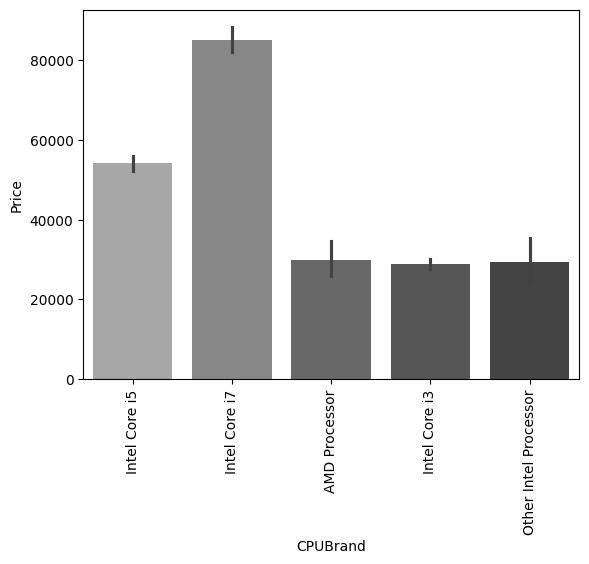

In [ ]:
sns.barplot(x=features['CPUBrand'],y=target,palette='Greys_d')
plt.xticks(rotation=90)

In [ ]:
features['CPUFrequency']=features['Cpu'].str.split().apply(lambda x:x[-1])


In [ ]:
features=features.drop(columns=['Cpu','CPUName'])
features

Inches Ram               Memory                           Gpu  \
0       13.3   8            128GB SSD  Intel Iris Plus Graphics 640   
1       13.3   8  128GB Flash Storage        Intel HD Graphics 6000   
2       15.6   8            256GB SSD         Intel HD Graphics 620   
3       15.4  16            512GB SSD            AMD Radeon Pro 455   
4       13.3   8            256GB SSD  Intel Iris Plus Graphics 650   
...      ...  ..                  ...                           ...   
1298    14.0   4            128GB SSD         Intel HD Graphics 520   
1299    13.3  16            512GB SSD         Intel HD Graphics 520   
1300    14.0   2   64GB Flash Storage             Intel HD Graphics   
1301    15.6   6              1TB HDD            AMD Radeon R5 M330   
1302    15.6   4            500GB HDD             Intel HD Graphics   

           OpSys Weight   Acer  Apple   Asus  Chuwi  ...  Gaming  Netbook  \
0          macOS   1.37  False   True  False  False  ...   False    False   
1          macOS   1.34  False   True  False  False  ...   False    False   
2          No OS   1.86  False  False  False  False  ...   False    False   
3          macOS   1.83  False   True  False  False  ...   False    False   
4          macOS   1.37  False   True  False  False  ...   False    False   
...          ...    ...    ...    ...    ...    ...  ...     ...      ...   
1298  Windows 10    1.8  False  False  False  False  ...   False    False   
1299  Windows 10    1.3  False  False  False  False  ...   False    False   
1300  Windows 10    1.5  False  False  False  False  ...   False    False   
1301  Windows 10   2.19  False  False  False  False  ...   False    False   
1302  Windows 10    2.2  False  False   True  False  ...   False    False   

      Notebook  Ultrabook  Workstation  Touchscreen  IPS         Ppi  \
0        False       True        False            0    1  226.983005   
1        False       True        False            0    0  127.677940   
2         True      False        False            0    0  141.211998   
3        False       True        False            0    1  220.534624   
4        False       True        False            0    1  226.983005   
...        ...        ...          ...          ...  ...         ...   
1298     False      False        False            1    1  157.350512   
1299     False      False        False            1    1  276.053530   
1300      True      False        False            0    0  111.935204   
1301      True      False        False            0    0  100.454670   
1302      True      False        False            0    0  100.454670   

                   CPUBrand  CPUFrequency  
0             Intel Core i5        2.3GHz  
1             Intel Core i5        1.8GHz  
2             Intel Core i5        2.5GHz  
3             Intel Core i7        2.7GHz  
4             Intel Core i5        3.1GHz  
...                     ...           ...  
1298          Intel Core i7        2.5GHz  
1299          Intel Core i7        2.5GHz  
1300  Other Intel Processor        1.6GHz  
1301          Intel Core i7        2.5GHz  
1302  Other Intel Processor        1.6GHz  

[1303 rows x 36 columns]

In [ ]:
features['CPUFrequency']=features['CPUFrequency'].str[:-3]
features

Inches Ram               Memory                           Gpu  \
0       13.3   8            128GB SSD  Intel Iris Plus Graphics 640   
1       13.3   8  128GB Flash Storage        Intel HD Graphics 6000   
2       15.6   8            256GB SSD         Intel HD Graphics 620   
3       15.4  16            512GB SSD            AMD Radeon Pro 455   
4       13.3   8            256GB SSD  Intel Iris Plus Graphics 650   
...      ...  ..                  ...                           ...   
1298    14.0   4            128GB SSD         Intel HD Graphics 520   
1299    13.3  16            512GB SSD         Intel HD Graphics 520   
1300    14.0   2   64GB Flash Storage             Intel HD Graphics   
1301    15.6   6              1TB HDD            AMD Radeon R5 M330   
1302    15.6   4            500GB HDD             Intel HD Graphics   

           OpSys Weight   Acer  Apple   Asus  Chuwi  ...  Gaming  Netbook  \
0          macOS   1.37  False   True  False  False  ...   False    False   
1          macOS   1.34  False   True  False  False  ...   False    False   
2          No OS   1.86  False  False  False  False  ...   False    False   
3          macOS   1.83  False   True  False  False  ...   False    False   
4          macOS   1.37  False   True  False  False  ...   False    False   
...          ...    ...    ...    ...    ...    ...  ...     ...      ...   
1298  Windows 10    1.8  False  False  False  False  ...   False    False   
1299  Windows 10    1.3  False  False  False  False  ...   False    False   
1300  Windows 10    1.5  False  False  False  False  ...   False    False   
1301  Windows 10   2.19  False  False  False  False  ...   False    False   
1302  Windows 10    2.2  False  False   True  False  ...   False    False   

      Notebook  Ultrabook  Workstation  Touchscreen  IPS         Ppi  \
0        False       True        False            0    1  226.983005   
1        False       True        False            0    0  127.677940   
2         True      False        False            0    0  141.211998   
3        False       True        False            0    1  220.534624   
4        False       True        False            0    1  226.983005   
...        ...        ...          ...          ...  ...         ...   
1298     False      False        False            1    1  157.350512   
1299     False      False        False            1    1  276.053530   
1300      True      False        False            0    0  111.935204   
1301      True      False        False            0    0  100.454670   
1302      True      False        False            0    0  100.454670   

                   CPUBrand  CPUFrequency  
0             Intel Core i5           2.3  
1             Intel Core i5           1.8  
2             Intel Core i5           2.5  
3             Intel Core i7           2.7  
4             Intel Core i5           3.1  
...                     ...           ...  
1298          Intel Core i7           2.5  
1299          Intel Core i7           2.5  
1300  Other Intel Processor           1.6  
1301          Intel Core i7           2.5  
1302  Other Intel Processor           1.6  

[1303 rows x 36 columns]

**RAM**

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '8'),
  Text(1, 0, '16'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '12'),
  Text(5, 0, '6'),
  Text(6, 0, '32'),
  Text(7, 0, '24'),
  Text(8, 0, '64')])

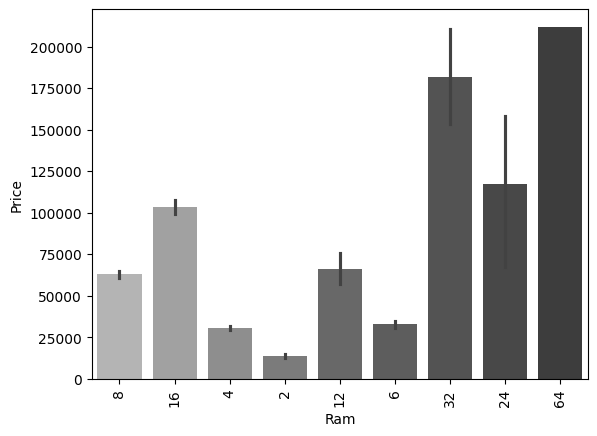

In [ ]:
sns.barplot(x=features['Ram'],y=target,palette='Greys_d')
plt.xticks(rotation=90)

In [ ]:
features.dtypes

Inches                float64
Ram                    object
Memory                 object
Gpu                    object
OpSys                  object
Weight                 object
Acer                     bool
Apple                    bool
Asus                     bool
Chuwi                    bool
Dell                     bool
Fujitsu                  bool
Google                   bool
HP                       bool
Huawei                   bool
LG                       bool
Lenovo                   bool
MSI                      bool
Mediacom                 bool
Microsoft                bool
Razer                    bool
Samsung                  bool
Toshiba                  bool
Vero                     bool
Xiaomi                   bool
2 in 1 Convertible       bool
Gaming                   bool
Netbook                  bool
Notebook                 bool
Ultrabook                bool
Workstation              bool
Touchscreen             int64
IPS                     int64
Ppi       

In [ ]:
features['Ram']=features['Ram'].astype(int)

features['CPUFrequency']=features['CPUFrequency'].astype(float)


**MEMMORY**

In [ ]:
features['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
features['Memory']=features['Memory'].str.replace('\.0', '', regex=True)
features['Memory']=features['Memory'].str.replace('GB','')
features['Memory']=features['Memory'].str.replace('TB','000')
new=features["Memory"].str.split("+", n = 1, expand = True)

In [ ]:
features['First_Memory']=new[0]
features['Second_Memory']=new[1]
features["Second_Memory"].fillna("0", inplace = True)

In [ ]:
features['First_Memory'].value_counts()

First_Memory
256 SSD              412
1000 HDD             224
500 HDD              132
512 SSD              118
128 SSD               96
256 SSD               88
128 SSD               76
32 Flash Storage      38
512 SSD               20
2000 HDD              16
64 Flash Storage      15
1000 SSD              14
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
1000 SSD               2
512 Flash Storage      2
64 SSD                 1
64 Flash Storage       1
1000 HDD               1
32 HDD                 1
128 HDD                1
240 SSD                1
8 SSD                  1
508 Hybrid             1
Name: count, dtype: int64

In [ ]:
features["FirstHDD"] = features["First_Memory"].apply(lambda x: 1 if "HDD" in x else 0)
features["FirstSSD"] = features["First_Memory"].apply(lambda x: 1 if "SSD" in x else 0)
features["FirstHybrid"] = features["First_Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
features["FirstFlash_Storage"] = features["First_Memory"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
features['First_Memory'] = features['First_Memory'].astype(str).str.findall(r'\d+').apply(lambda x: x[0])
features

Inches  Ram             Memory                           Gpu  \
0       13.3    8            128 SSD  Intel Iris Plus Graphics 640   
1       13.3    8  128 Flash Storage        Intel HD Graphics 6000   
2       15.6    8            256 SSD         Intel HD Graphics 620   
3       15.4   16            512 SSD            AMD Radeon Pro 455   
4       13.3    8            256 SSD  Intel Iris Plus Graphics 650   
...      ...  ...                ...                           ...   
1298    14.0    4            128 SSD         Intel HD Graphics 520   
1299    13.3   16            512 SSD         Intel HD Graphics 520   
1300    14.0    2   64 Flash Storage             Intel HD Graphics   
1301    15.6    6           1000 HDD            AMD Radeon R5 M330   
1302    15.6    4            500 HDD             Intel HD Graphics   

           OpSys Weight   Acer  Apple   Asus  Chuwi  ...  IPS         Ppi  \
0          macOS   1.37  False   True  False  False  ...    1  226.983005   
1          macOS   1.34  False   True  False  False  ...    0  127.677940   
2          No OS   1.86  False  False  False  False  ...    0  141.211998   
3          macOS   1.83  False   True  False  False  ...    1  220.534624   
4          macOS   1.37  False   True  False  False  ...    1  226.983005   
...          ...    ...    ...    ...    ...    ...  ...  ...         ...   
1298  Windows 10    1.8  False  False  False  False  ...    1  157.350512   
1299  Windows 10    1.3  False  False  False  False  ...    1  276.053530   
1300  Windows 10    1.5  False  False  False  False  ...    0  111.935204   
1301  Windows 10   2.19  False  False  False  False  ...    0  100.454670   
1302  Windows 10    2.2  False  False   True  False  ...    0  100.454670   

                   CPUBrand  CPUFrequency  First_Memory  Second_Memory  \
0             Intel Core i5           2.3           128              0   
1             Intel Core i5           1.8           128              0   
2             Intel Core i5           2.5           256              0   
3             Intel Core i7           2.7           512              0   
4             Intel Core i5           3.1           256              0   
...                     ...           ...           ...            ...   
1298          Intel Core i7           2.5           128              0   
1299          Intel Core i7           2.5           512              0   
1300  Other Intel Processor           1.6            64              0   
1301          Intel Core i7           2.5          1000              0   
1302  Other Intel Processor           1.6           500              0   

      FirstHDD  FirstSSD  FirstHybrid  FirstFlash_Storage  
0            0         1            0                   0  
1            0         0            0                   1  
2            0         1            0                   0  
3            0         1            0                   0  
4            0         1            0                   0  
...        ...       ...          ...                 ...  
1298         0         1            0                   0  
1299         0         1            0                   0  
1300         0         0            0                   1  
1301         1         0            0                   0  
1302         1         0            0                   0  

[1303 rows x 42 columns]

In [ ]:
features['Second_Memory'].value_counts()

Second_Memory
0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [ ]:
features["SecondHDD"] = features["Second_Memory"].apply(lambda x: 1 if "HDD" in x else 0)
features["SecondSSD"] = features["Second_Memory"].apply(lambda x: 1 if "SSD" in x else 0)
features["SecondHybrid"] = features["Second_Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
features["SecondFlash_Storage"] = features["Second_Memory"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [ ]:
features['Second_Memory'] = features['Second_Memory'].str.findall(r'\d+').apply(lambda x:x[0])
features

Inches  Ram             Memory                           Gpu  \
0       13.3    8            128 SSD  Intel Iris Plus Graphics 640   
1       13.3    8  128 Flash Storage        Intel HD Graphics 6000   
2       15.6    8            256 SSD         Intel HD Graphics 620   
3       15.4   16            512 SSD            AMD Radeon Pro 455   
4       13.3    8            256 SSD  Intel Iris Plus Graphics 650   
...      ...  ...                ...                           ...   
1298    14.0    4            128 SSD         Intel HD Graphics 520   
1299    13.3   16            512 SSD         Intel HD Graphics 520   
1300    14.0    2   64 Flash Storage             Intel HD Graphics   
1301    15.6    6           1000 HDD            AMD Radeon R5 M330   
1302    15.6    4            500 HDD             Intel HD Graphics   

           OpSys Weight   Acer  Apple   Asus  Chuwi  ...  First_Memory  \
0          macOS   1.37  False   True  False  False  ...           128   
1          macOS   1.34  False   True  False  False  ...           128   
2          No OS   1.86  False  False  False  False  ...           256   
3          macOS   1.83  False   True  False  False  ...           512   
4          macOS   1.37  False   True  False  False  ...           256   
...          ...    ...    ...    ...    ...    ...  ...           ...   
1298  Windows 10    1.8  False  False  False  False  ...           128   
1299  Windows 10    1.3  False  False  False  False  ...           512   
1300  Windows 10    1.5  False  False  False  False  ...            64   
1301  Windows 10   2.19  False  False  False  False  ...          1000   
1302  Windows 10    2.2  False  False   True  False  ...           500   

      Second_Memory  FirstHDD  FirstSSD  FirstHybrid  FirstFlash_Storage  \
0                 0         0         1            0                   0   
1                 0         0         0            0                   1   
2                 0         0         1            0                   0   
3                 0         0         1            0                   0   
4                 0         0         1            0                   0   
...             ...       ...       ...          ...                 ...   
1298              0         0         1            0                   0   
1299              0         0         1            0                   0   
1300              0         0         0            0                   1   
1301              0         1         0            0                   0   
1302              0         1         0            0                   0   

      SecondHDD  SecondSSD  SecondHybrid  SecondFlash_Storage  
0             0          0             0                    0  
1             0          0             0                    0  
2             0          0             0                    0  
3             0          0             0                    0  
4             0          0             0                    0  
...         ...        ...           ...                  ...  
1298          0          0             0                    0  
1299          0          0             0                    0  
1300          0          0             0                    0  
1301          0          0             0                    0  
1302          0          0             0                    0  

[1303 rows x 46 columns]

In [ ]:
features['First_Memory']=features['First_Memory'].astype(int)
features['Second_Memory']=features['Second_Memory'].astype(int)

In [ ]:
features['HDD']=(features['First_Memory']*features['FirstHDD']+features['Second_Memory']*features['SecondHDD'])
features['SSD']=(features['First_Memory']*features['FirstSSD']+features['Second_Memory']*features['SecondSSD'])
features['Flash_Storage']=(features['First_Memory']*features['FirstFlash_Storage']+features['Second_Memory']*features['SecondFlash_Storage'])
features['Hybrid']=(features['First_Memory']*features['FirstHybrid']+features['Second_Memory']*features['SecondHybrid'])


In [ ]:
features['FirstFlash_Storage'].value_counts()

FirstFlash_Storage
0    1228
1      75
Name: count, dtype: int64

In [ ]:
features['Flash_Storage'].value_counts()

Flash_Storage
0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: count, dtype: int64

In [ ]:
features

Inches  Ram             Memory                           Gpu  \
0       13.3    8            128 SSD  Intel Iris Plus Graphics 640   
1       13.3    8  128 Flash Storage        Intel HD Graphics 6000   
2       15.6    8            256 SSD         Intel HD Graphics 620   
3       15.4   16            512 SSD            AMD Radeon Pro 455   
4       13.3    8            256 SSD  Intel Iris Plus Graphics 650   
...      ...  ...                ...                           ...   
1298    14.0    4            128 SSD         Intel HD Graphics 520   
1299    13.3   16            512 SSD         Intel HD Graphics 520   
1300    14.0    2   64 Flash Storage             Intel HD Graphics   
1301    15.6    6           1000 HDD            AMD Radeon R5 M330   
1302    15.6    4            500 HDD             Intel HD Graphics   

           OpSys Weight   Acer  Apple   Asus  Chuwi  ...  FirstHybrid  \
0          macOS   1.37  False   True  False  False  ...            0   
1          macOS   1.34  False   True  False  False  ...            0   
2          No OS   1.86  False  False  False  False  ...            0   
3          macOS   1.83  False   True  False  False  ...            0   
4          macOS   1.37  False   True  False  False  ...            0   
...          ...    ...    ...    ...    ...    ...  ...          ...   
1298  Windows 10    1.8  False  False  False  False  ...            0   
1299  Windows 10    1.3  False  False  False  False  ...            0   
1300  Windows 10    1.5  False  False  False  False  ...            0   
1301  Windows 10   2.19  False  False  False  False  ...            0   
1302  Windows 10    2.2  False  False   True  False  ...            0   

      FirstFlash_Storage  SecondHDD  SecondSSD  SecondHybrid  \
0                      0          0          0             0   
1                      1          0          0             0   
2                      0          0          0             0   
3                      0          0          0             0   
4                      0          0          0             0   
...                  ...        ...        ...           ...   
1298                   0          0          0             0   
1299                   0          0          0             0   
1300                   1          0          0             0   
1301                   0          0          0             0   
1302                   0          0          0             0   

      SecondFlash_Storage   HDD  SSD  Flash_Storage  Hybrid  
0                       0     0  128              0       0  
1                       0     0    0            128       0  
2                       0     0  256              0       0  
3                       0     0  512              0       0  
4                       0     0  256              0       0  
...                   ...   ...  ...            ...     ...  
1298                    0     0  128              0       0  
1299                    0     0  512              0       0  
1300                    0     0    0             64       0  
1301                    0  1000    0              0       0  
1302                    0   500    0              0       0  

[1303 rows x 50 columns]

In [ ]:
features=features.drop(columns=['First_Memory','Second_Memory','FirstHDD','FirstSSD','FirstHybrid','FirstFlash_Storage','SecondHDD','SecondSSD','SecondHybrid','SecondFlash_Storage'])
features

Inches  Ram             Memory                           Gpu  \
0       13.3    8            128 SSD  Intel Iris Plus Graphics 640   
1       13.3    8  128 Flash Storage        Intel HD Graphics 6000   
2       15.6    8            256 SSD         Intel HD Graphics 620   
3       15.4   16            512 SSD            AMD Radeon Pro 455   
4       13.3    8            256 SSD  Intel Iris Plus Graphics 650   
...      ...  ...                ...                           ...   
1298    14.0    4            128 SSD         Intel HD Graphics 520   
1299    13.3   16            512 SSD         Intel HD Graphics 520   
1300    14.0    2   64 Flash Storage             Intel HD Graphics   
1301    15.6    6           1000 HDD            AMD Radeon R5 M330   
1302    15.6    4            500 HDD             Intel HD Graphics   

           OpSys Weight   Acer  Apple   Asus  Chuwi  ...  Workstation  \
0          macOS   1.37  False   True  False  False  ...        False   
1          macOS   1.34  False   True  False  False  ...        False   
2          No OS   1.86  False  False  False  False  ...        False   
3          macOS   1.83  False   True  False  False  ...        False   
4          macOS   1.37  False   True  False  False  ...        False   
...          ...    ...    ...    ...    ...    ...  ...          ...   
1298  Windows 10    1.8  False  False  False  False  ...        False   
1299  Windows 10    1.3  False  False  False  False  ...        False   
1300  Windows 10    1.5  False  False  False  False  ...        False   
1301  Windows 10   2.19  False  False  False  False  ...        False   
1302  Windows 10    2.2  False  False   True  False  ...        False   

      Touchscreen  IPS         Ppi               CPUBrand  CPUFrequency   HDD  \
0               0    1  226.983005          Intel Core i5           2.3     0   
1               0    0  127.677940          Intel Core i5           1.8     0   
2               0    0  141.211998          Intel Core i5           2.5     0   
3               0    1  220.534624          Intel Core i7           2.7     0   
4               0    1  226.983005          Intel Core i5           3.1     0   
...           ...  ...         ...                    ...           ...   ...   
1298            1    1  157.350512          Intel Core i7           2.5     0   
1299            1    1  276.053530          Intel Core i7           2.5     0   
1300            0    0  111.935204  Other Intel Processor           1.6     0   
1301            0    0  100.454670          Intel Core i7           2.5  1000   
1302            0    0  100.454670  Other Intel Processor           1.6   500   

      SSD  Flash_Storage  Hybrid  
0     128              0       0  
1       0            128       0  
2     256              0       0  
3     512              0       0  
4     256              0       0  
...   ...            ...     ...  
1298  128              0       0  
1299  512              0       0  
1300    0             64       0  
1301    0              0       0  
1302    0              0       0  

[1303 rows x 40 columns]

In [ ]:
features.drop('Memory',axis=1,inplace=True)

**GPU**

In [ ]:
features['GPUBrand']=features['Gpu'].str.split(' ').apply(lambda x:x[0])
features.drop('Gpu',axis=1,inplace=True)

([0, 1, 2, 3],
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'ARM')])

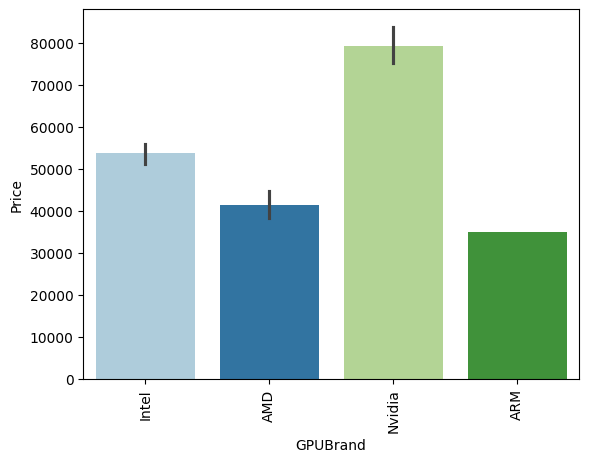

In [ ]:
sns.barplot(x=features['GPUBrand'],y=target,palette='Paired')
plt.xticks(rotation='vertical')

**OPERATING SYSTEM**

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

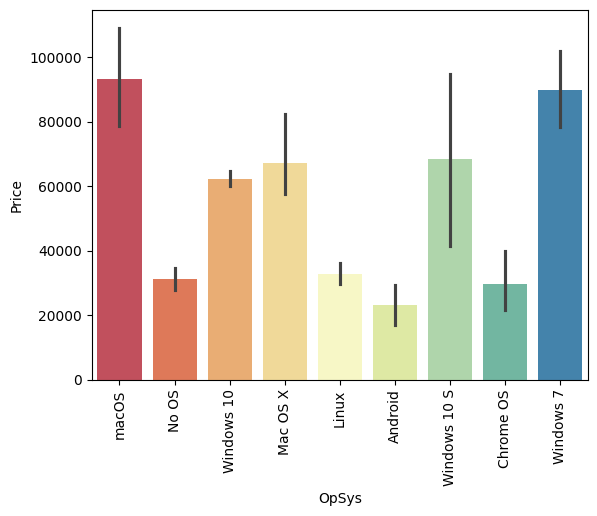

In [ ]:
sns.barplot(x=features['OpSys'],y=target,palette='Spectral')
plt.xticks(rotation='vertical')

In [ ]:
features=features.join(pd.get_dummies(features['OpSys']))
features.drop('OpSys',axis=1,inplace=True)
features

Inches  Ram Weight   Acer  Apple   Asus  Chuwi   Dell  Fujitsu  Google  \
0       13.3    8   1.37  False   True  False  False  False    False   False   
1       13.3    8   1.34  False   True  False  False  False    False   False   
2       15.6    8   1.86  False  False  False  False  False    False   False   
3       15.4   16   1.83  False   True  False  False  False    False   False   
4       13.3    8   1.37  False   True  False  False  False    False   False   
...      ...  ...    ...    ...    ...    ...    ...    ...      ...     ...   
1298    14.0    4    1.8  False  False  False  False  False    False   False   
1299    13.3   16    1.3  False  False  False  False  False    False   False   
1300    14.0    2    1.5  False  False  False  False  False    False   False   
1301    15.6    6   2.19  False  False  False  False  False    False   False   
1302    15.6    4    2.2  False  False   True  False  False    False   False   

      ...  GPUBrand  Android  Chrome OS  Linux  Mac OS X  No OS  Windows 10  \
0     ...     Intel    False      False  False     False  False       False   
1     ...     Intel    False      False  False     False  False       False   
2     ...     Intel    False      False  False     False   True       False   
3     ...       AMD    False      False  False     False  False       False   
4     ...     Intel    False      False  False     False  False       False   
...   ...       ...      ...        ...    ...       ...    ...         ...   
1298  ...     Intel    False      False  False     False  False        True   
1299  ...     Intel    False      False  False     False  False        True   
1300  ...     Intel    False      False  False     False  False        True   
1301  ...       AMD    False      False  False     False  False        True   
1302  ...     Intel    False      False  False     False  False        True   

      Windows 10 S  Windows 7  macOS  
0            False      False   True  
1            False      False   True  
2            False      False  False  
3            False      False   True  
4            False      False   True  
...            ...        ...    ...  
1298         False      False  False  
1299         False      False  False  
1300         False      False  False  
1301         False      False  False  
1302         False      False  False  

[1303 rows x 47 columns]

**FEATURE ENCODING**

In [ ]:
features.dtypes

Inches                float64
Ram                     int64
Weight                 object
Acer                     bool
Apple                    bool
Asus                     bool
Chuwi                    bool
Dell                     bool
Fujitsu                  bool
Google                   bool
HP                       bool
Huawei                   bool
LG                       bool
Lenovo                   bool
MSI                      bool
Mediacom                 bool
Microsoft                bool
Razer                    bool
Samsung                  bool
Toshiba                  bool
Vero                     bool
Xiaomi                   bool
2 in 1 Convertible       bool
Gaming                   bool
Netbook                  bool
Notebook                 bool
Ultrabook                bool
Workstation              bool
Touchscreen             int64
IPS                     int64
Ppi                   float64
CPUBrand               object
CPUFrequency          float64
HDD       

**CPU BRAND & GPU BRAND**

In [ ]:
cpu_brand=pd.get_dummies(features['CPUBrand'])
cpu_brand.columns=[col+'_CPU' for col in cpu_brand.columns]
features=features.join(cpu_brand)
features.drop('CPUBrand',axis=1,inplace=True)

In [ ]:
gpu_brand=pd.get_dummies(features['GPUBrand'])
gpu_brand.columns=[col+'_GPU' for col in gpu_brand.columns]
features=features.join(gpu_brand)
features.drop('GPUBrand',axis=1,inplace=True)

In [ ]:
for col in features.columns:
    if features[col].dtype == 'bool':
        features[col] = features[col].astype(int)

In [ ]:
features.dtypes

Inches                       float64
Ram                            int64
Weight                        object
Acer                           int64
Apple                          int64
Asus                           int64
Chuwi                          int64
Dell                           int64
Fujitsu                        int64
Google                         int64
HP                             int64
Huawei                         int64
LG                             int64
Lenovo                         int64
MSI                            int64
Mediacom                       int64
Microsoft                      int64
Razer                          int64
Samsung                        int64
Toshiba                        int64
Vero                           int64
Xiaomi                         int64
2 in 1 Convertible             int64
Gaming                         int64
Netbook                        int64
Notebook                       int64
Ultrabook                      int64
W

**PLOTING THE DEPENDENCIES WITH PRICE**

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.77

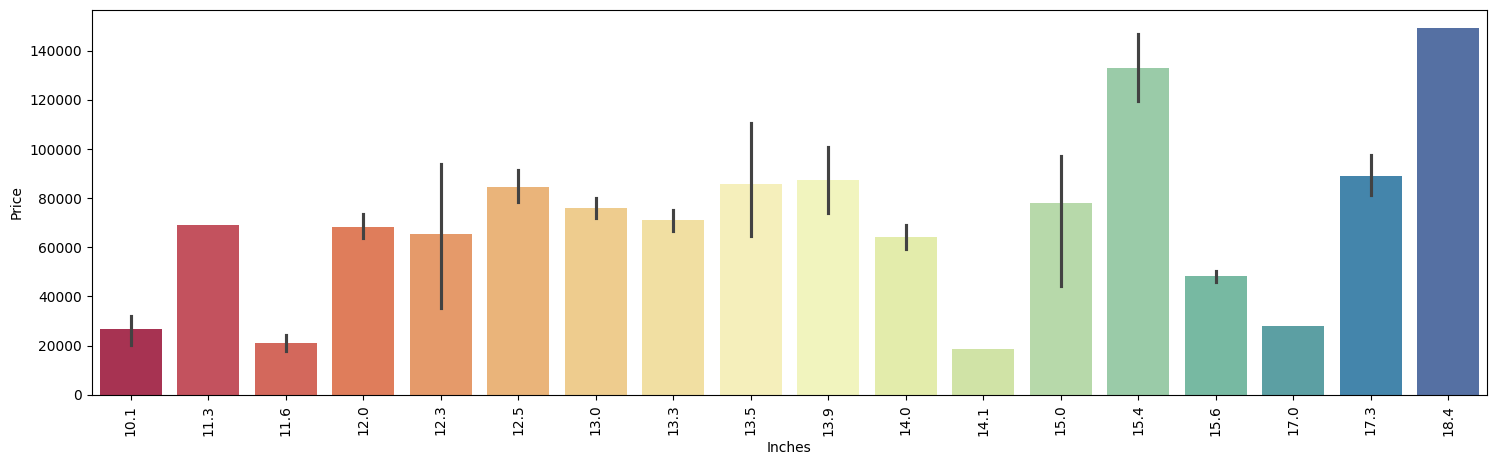

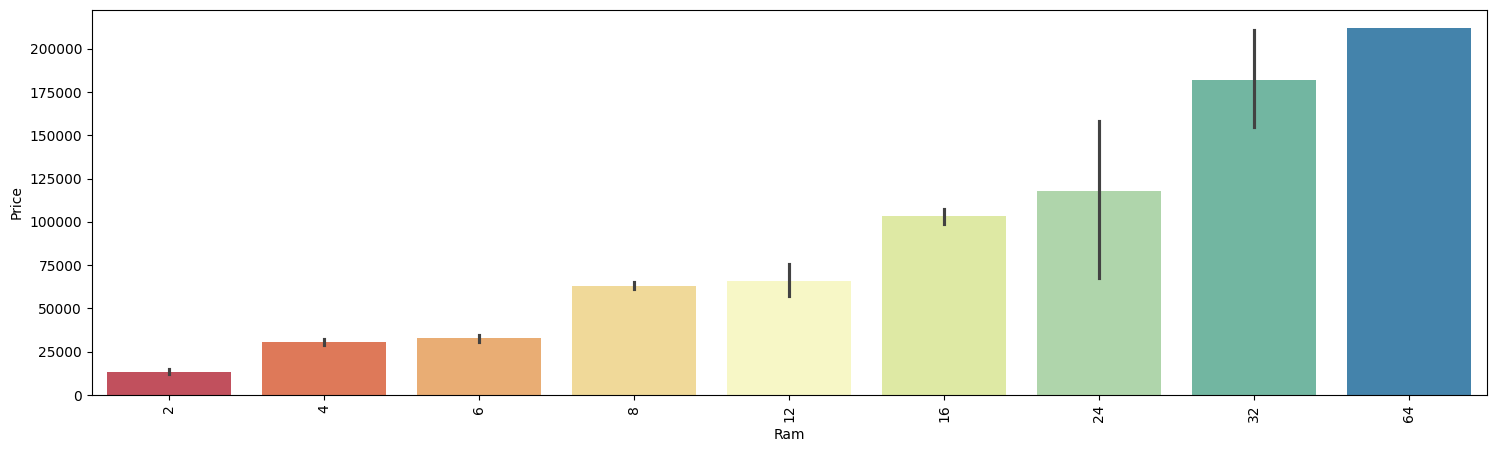

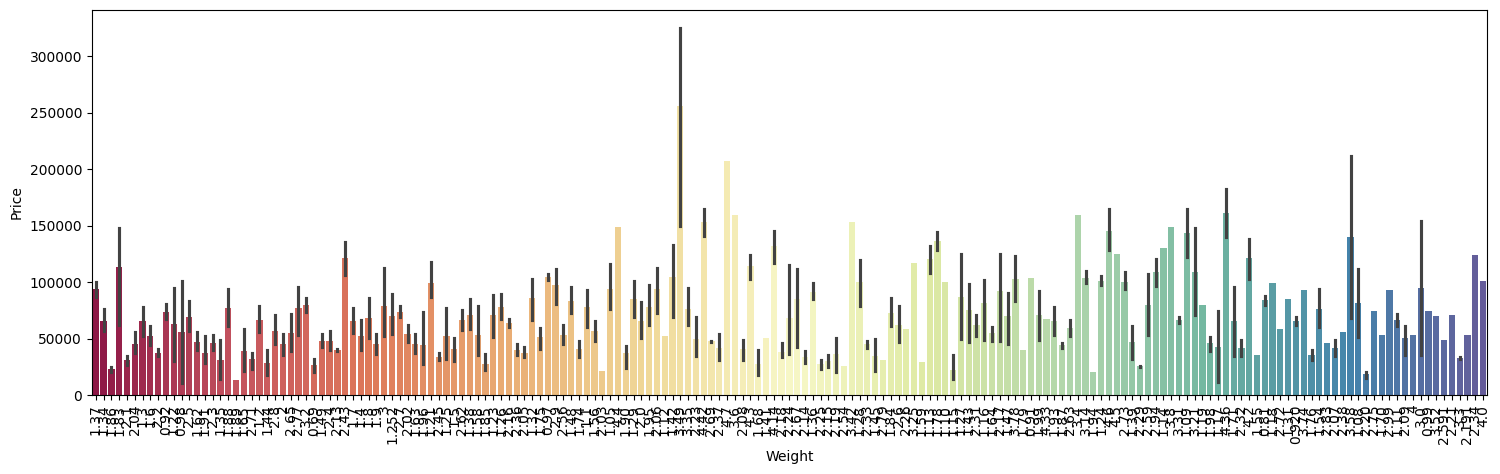

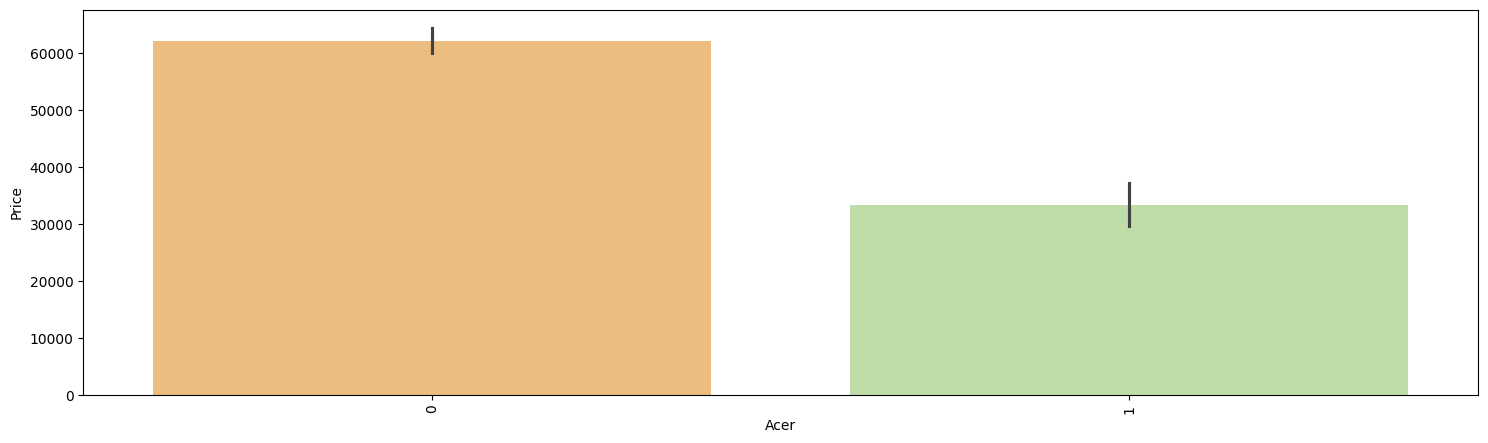

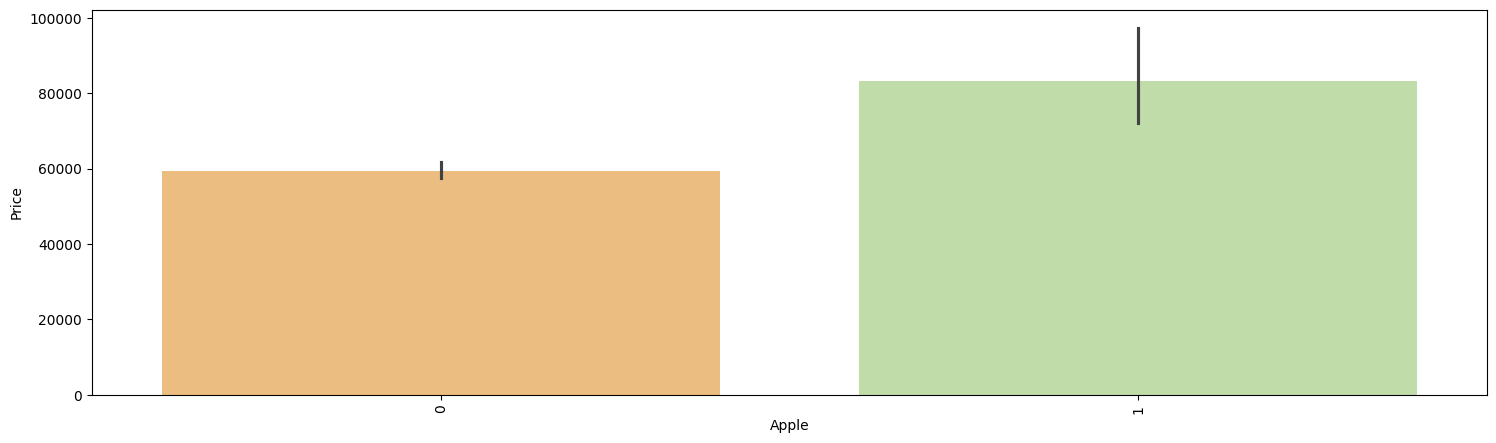

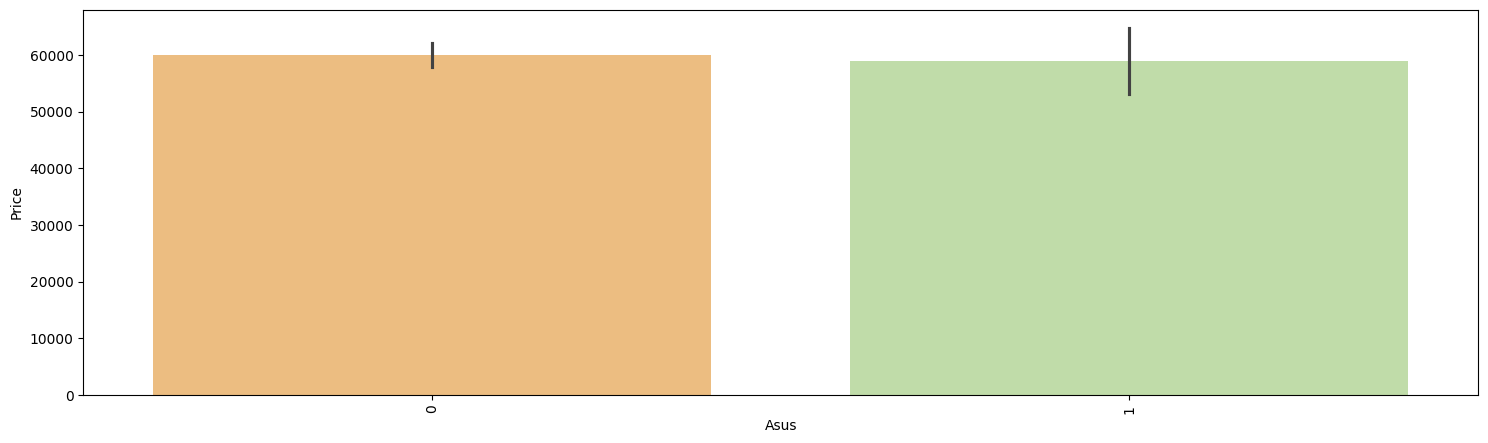

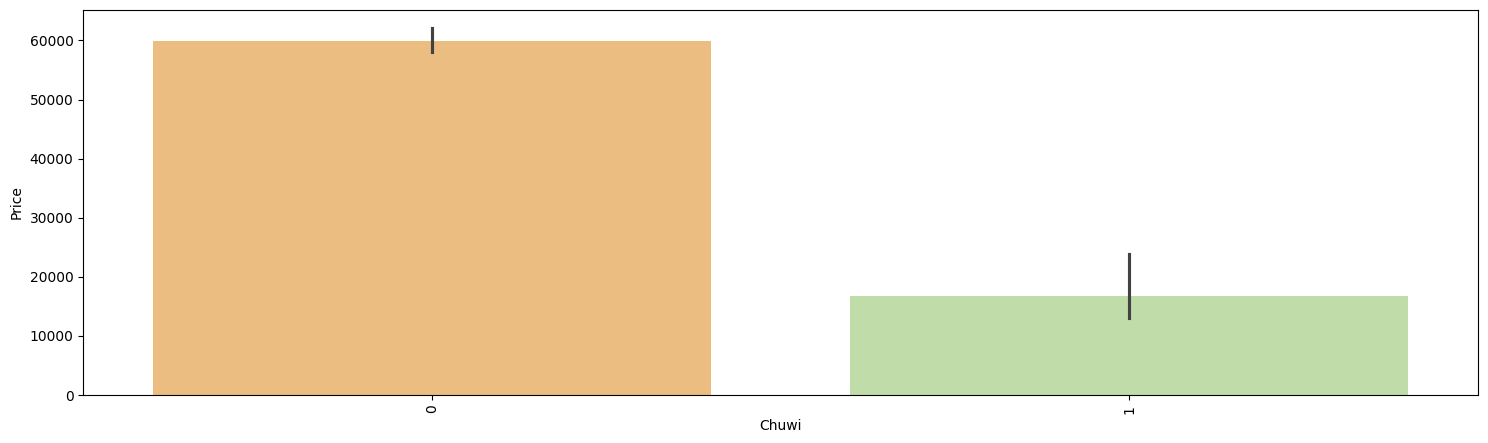

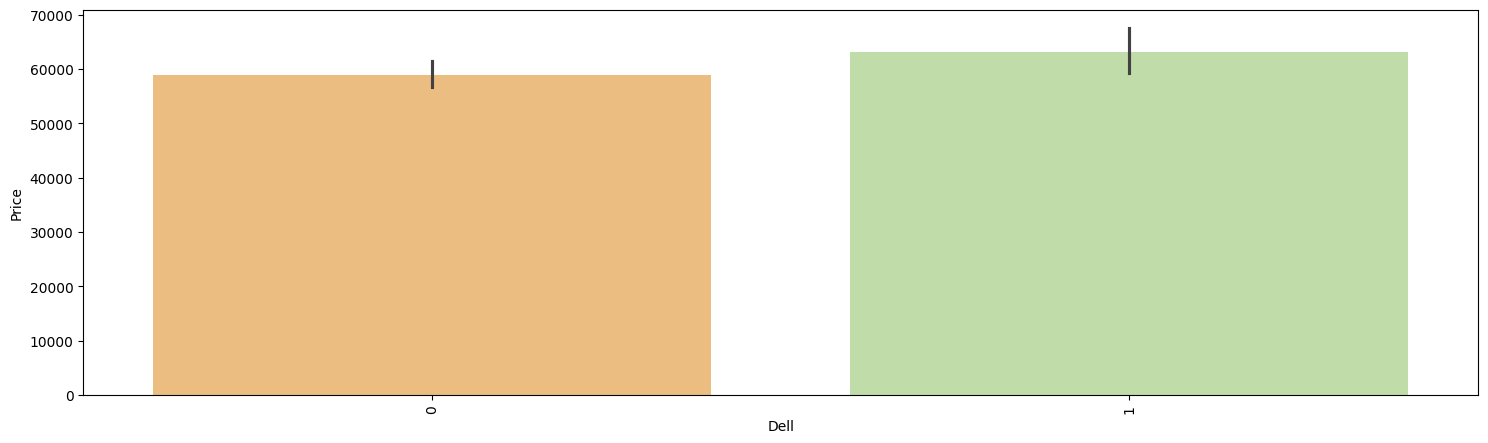

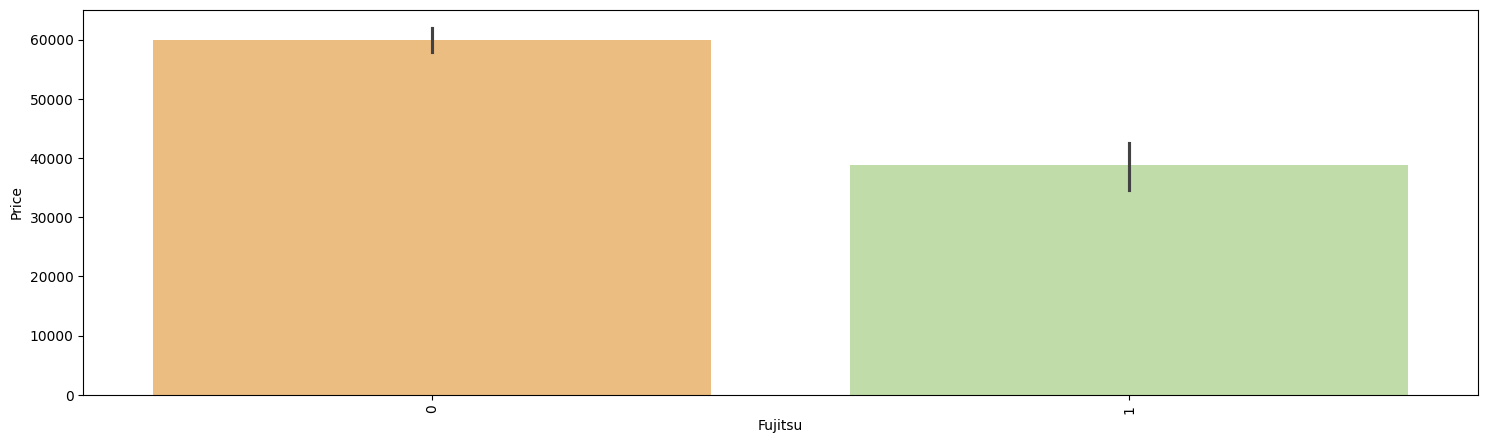

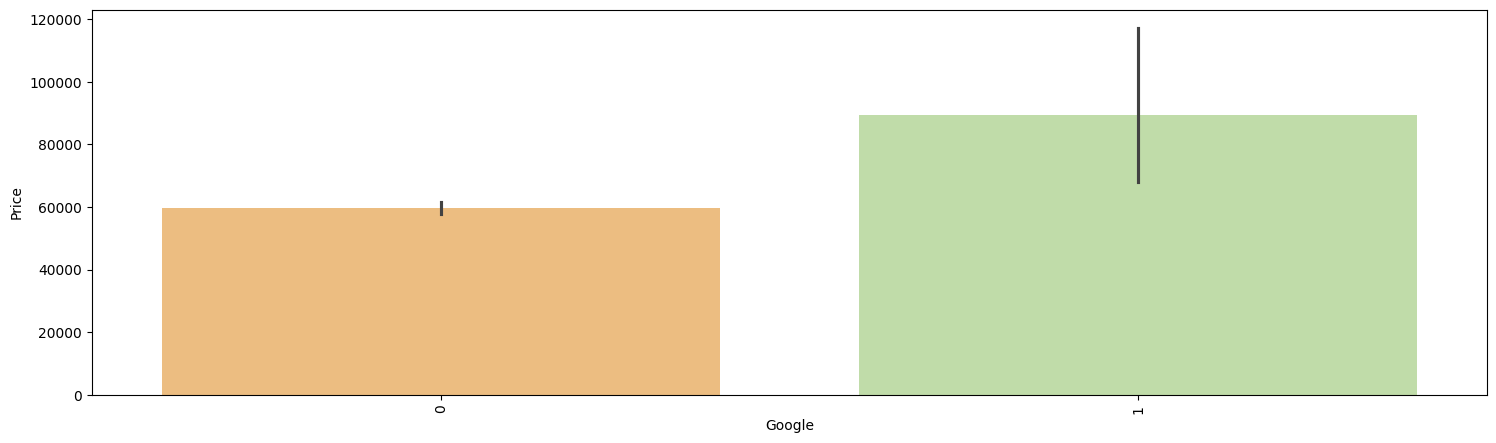

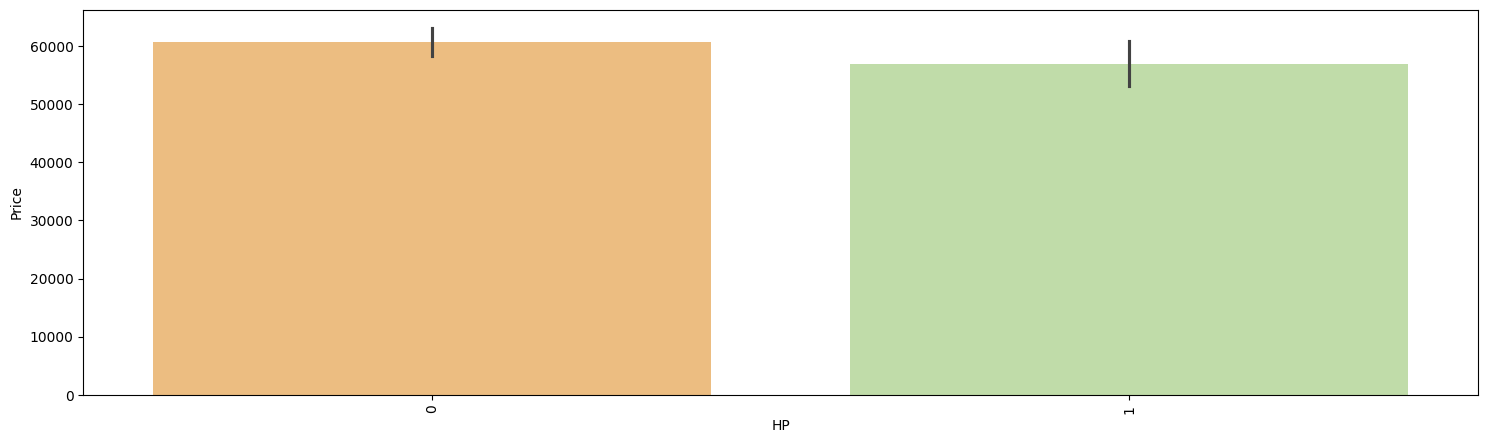

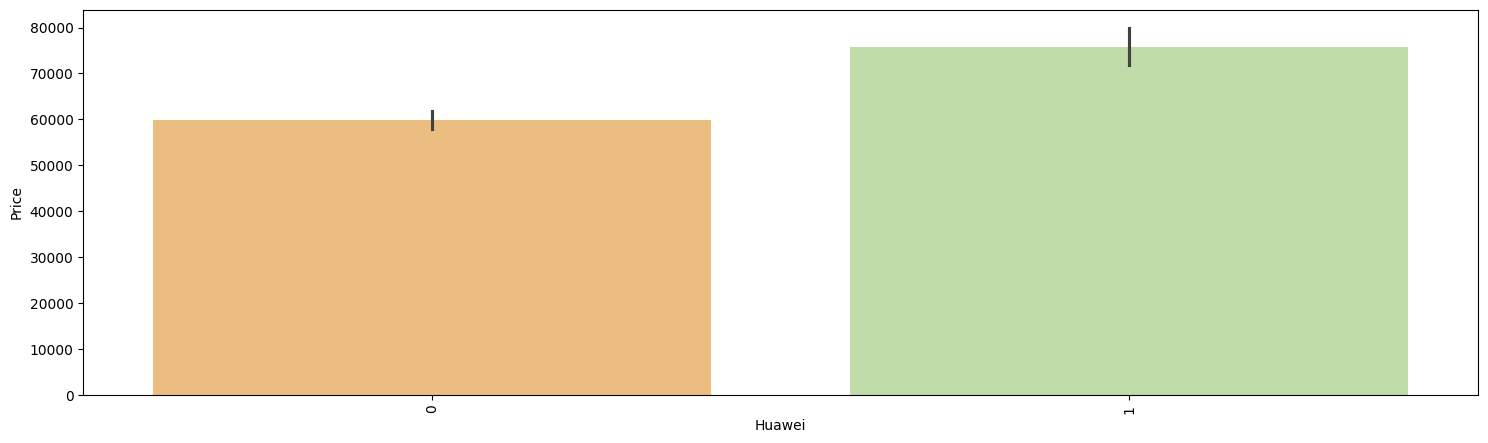

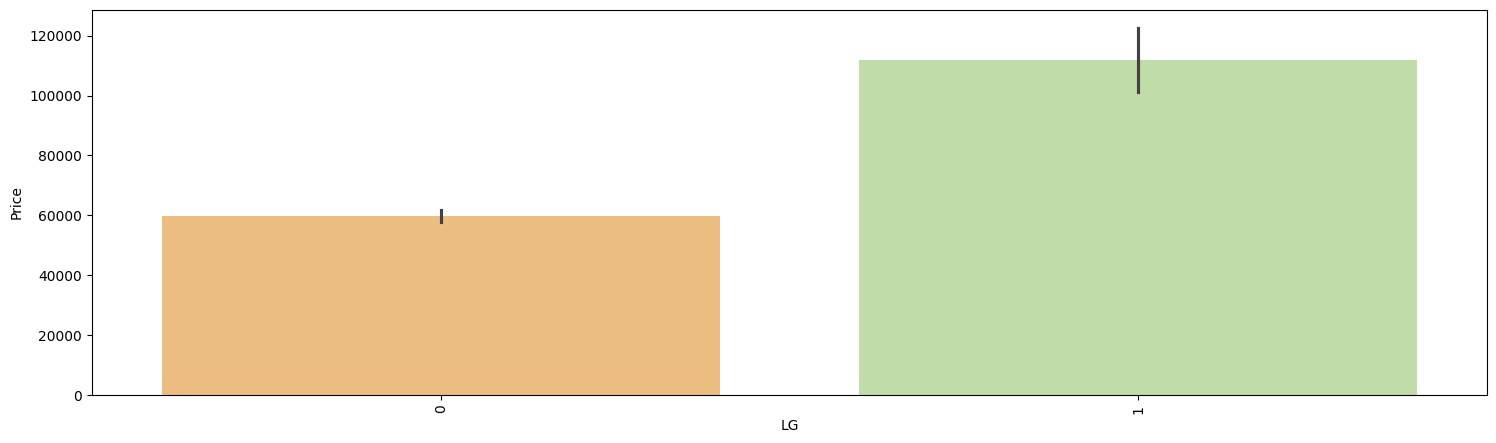

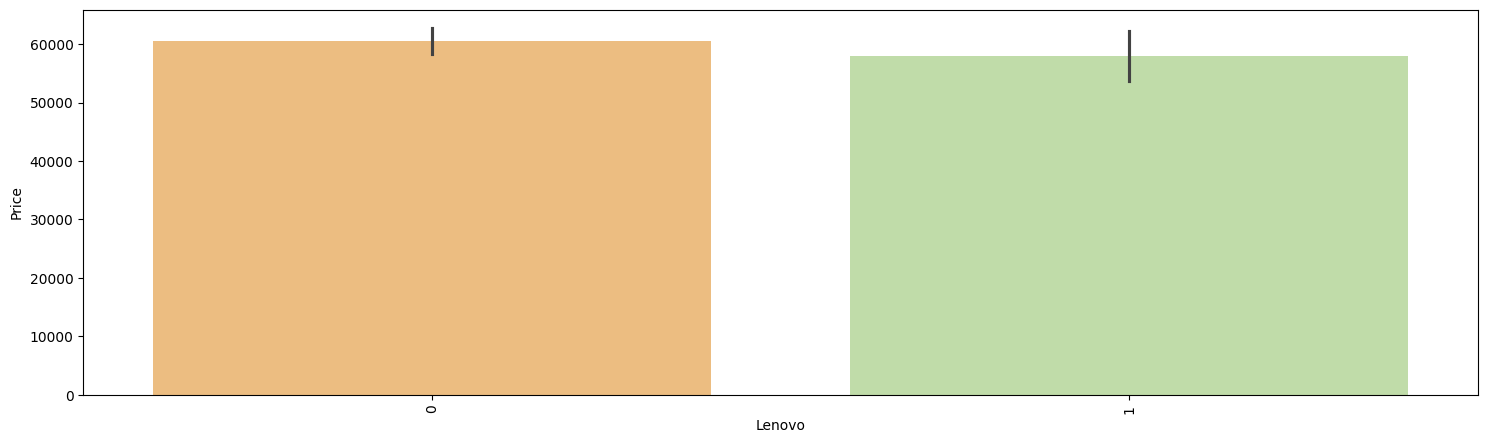

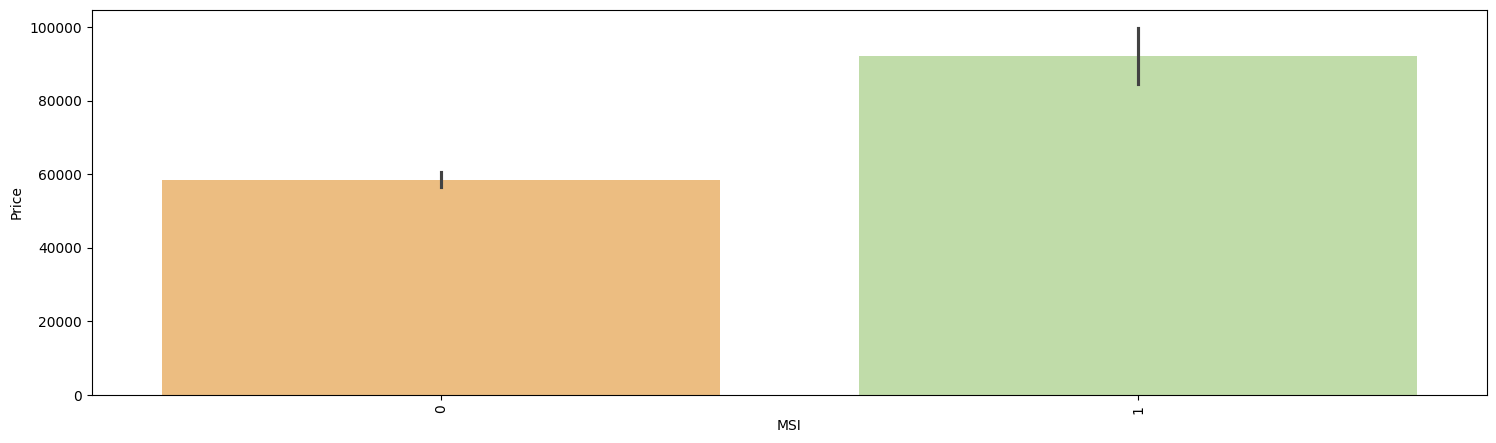

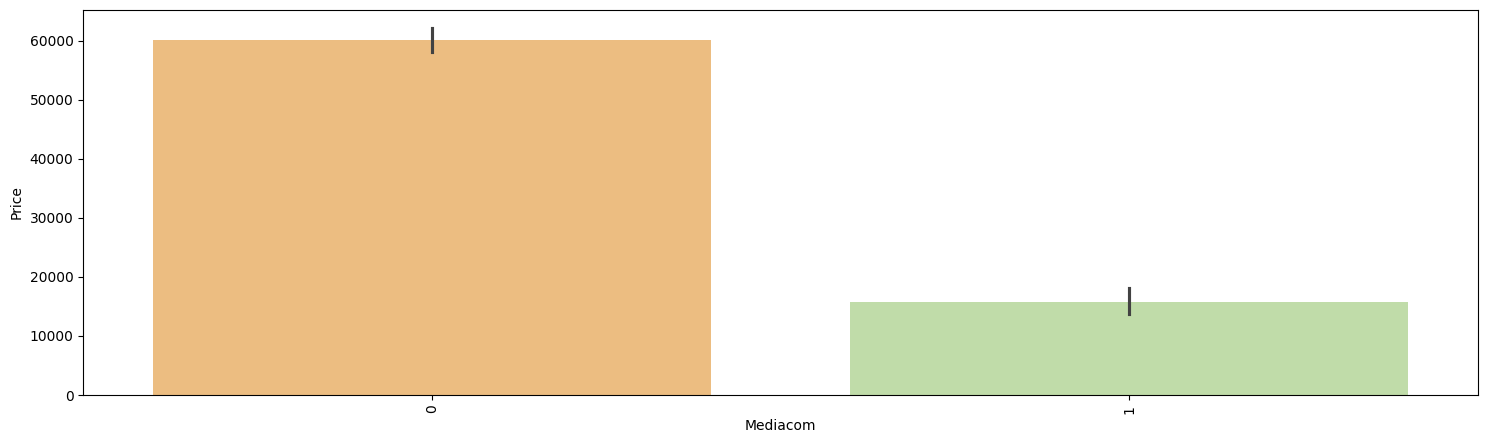

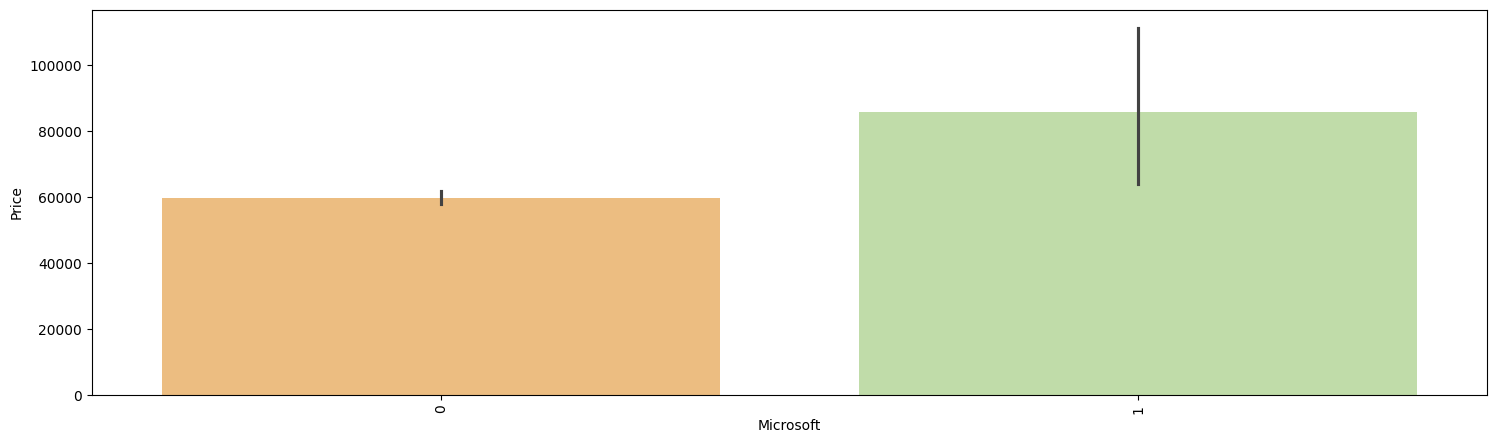

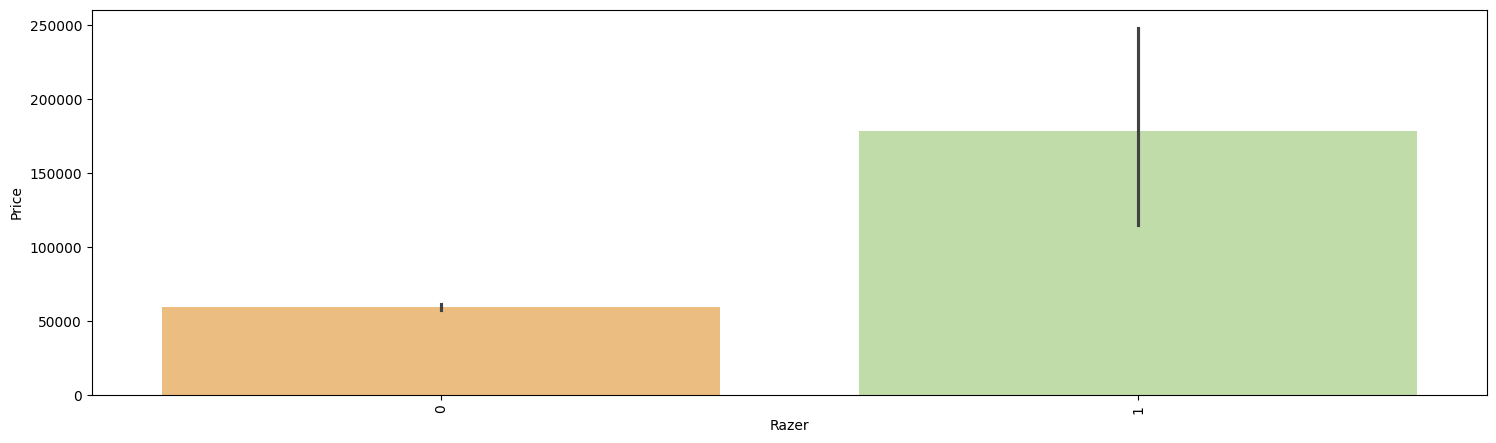

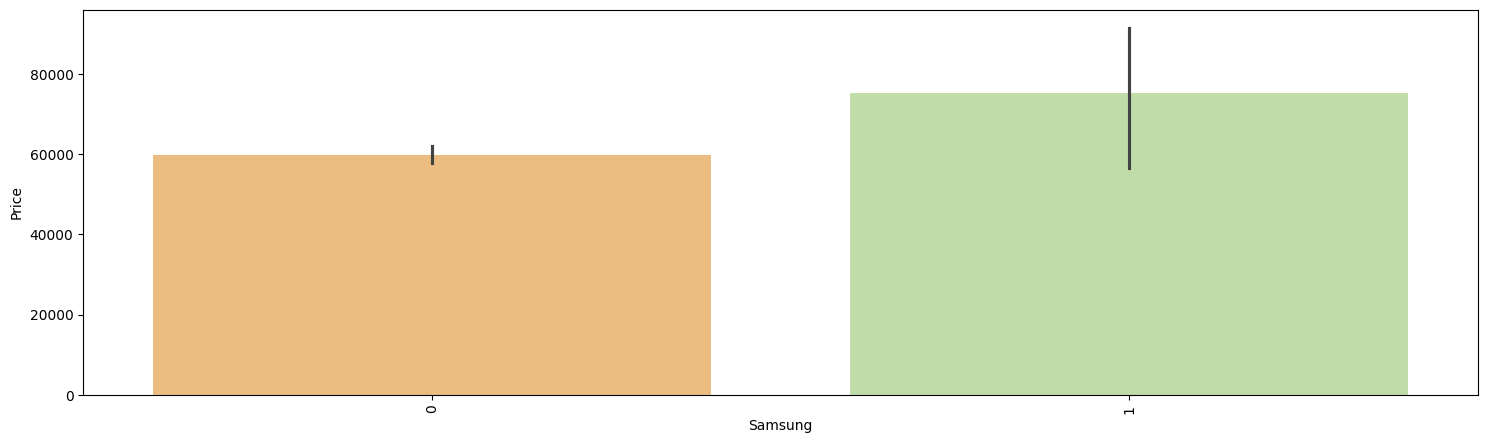

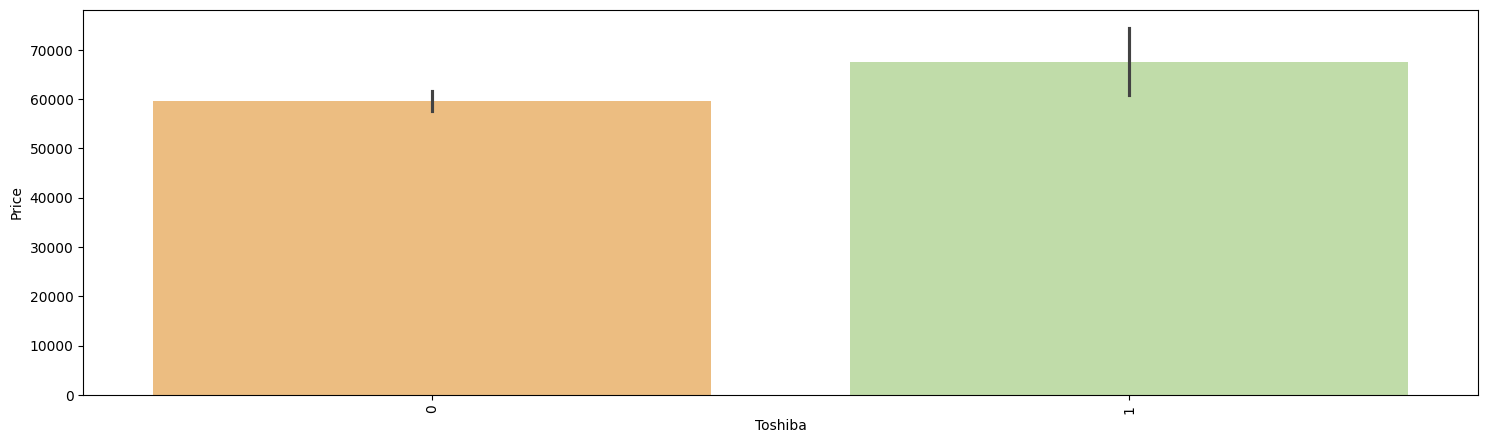

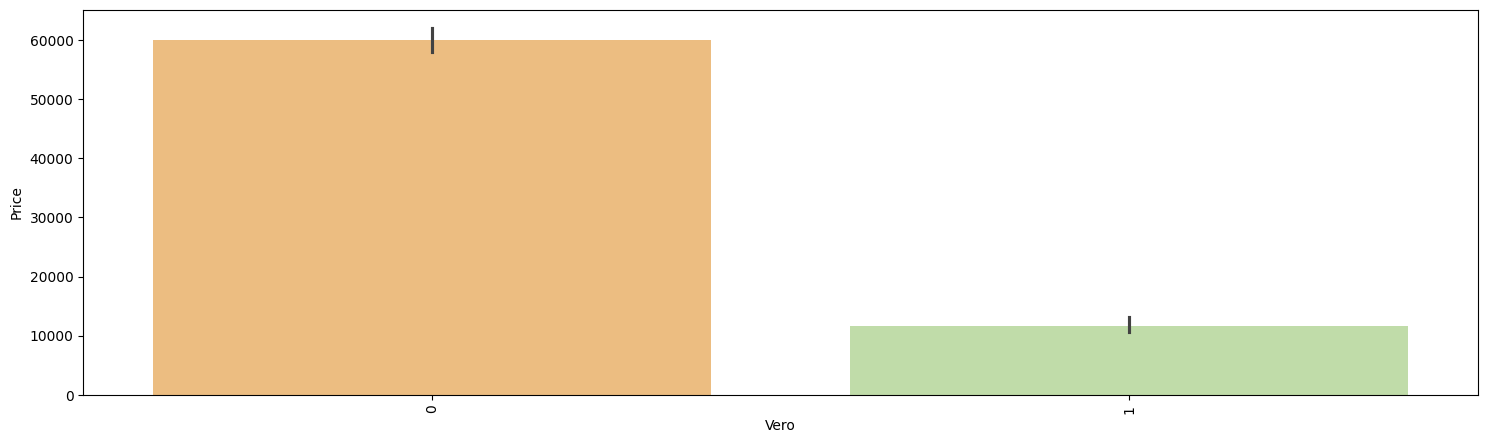

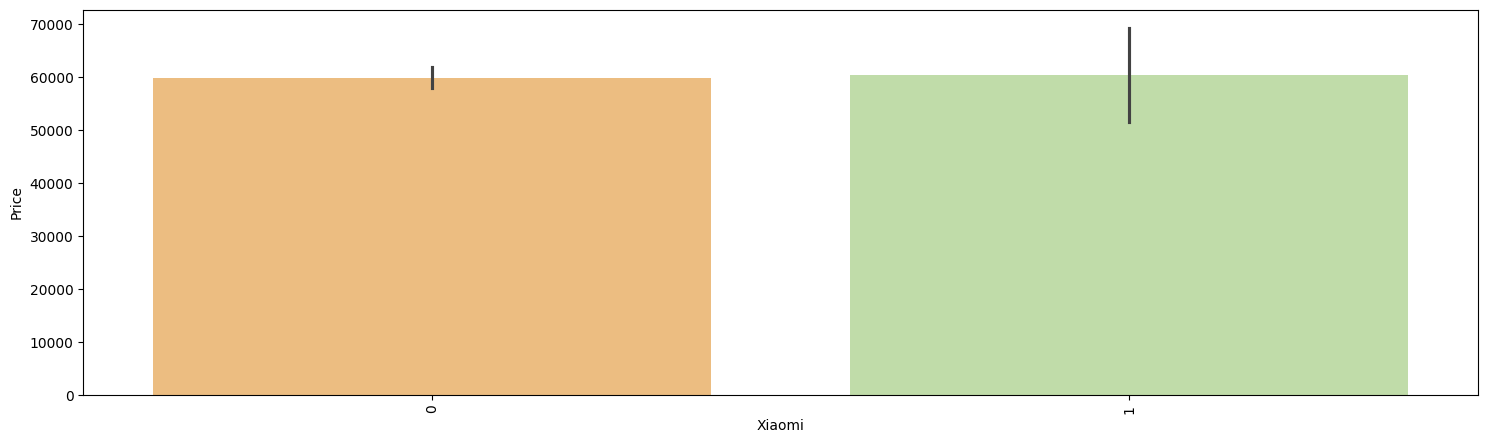

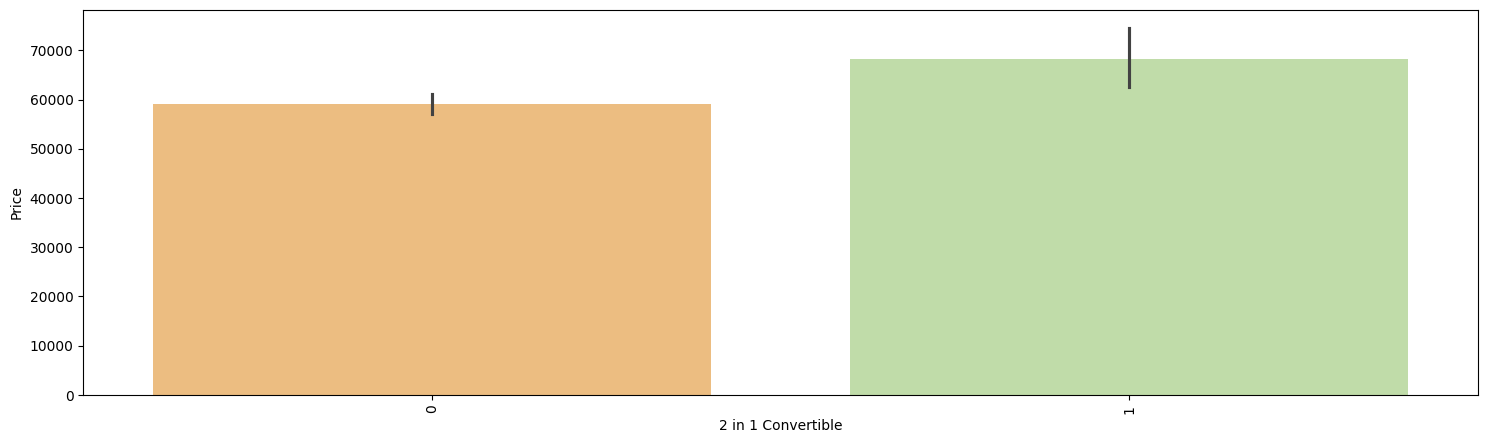

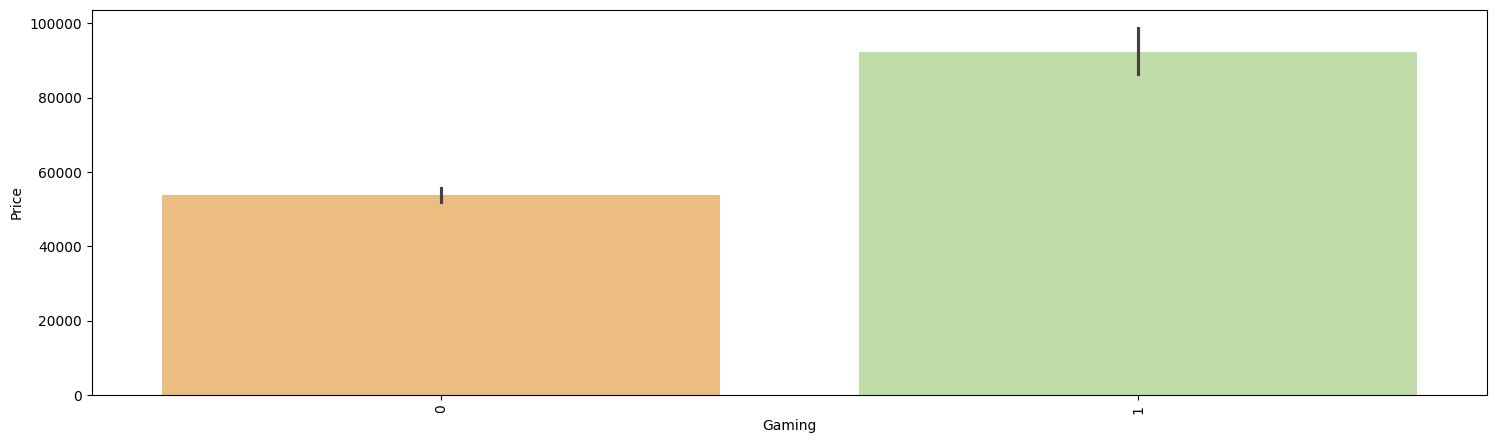

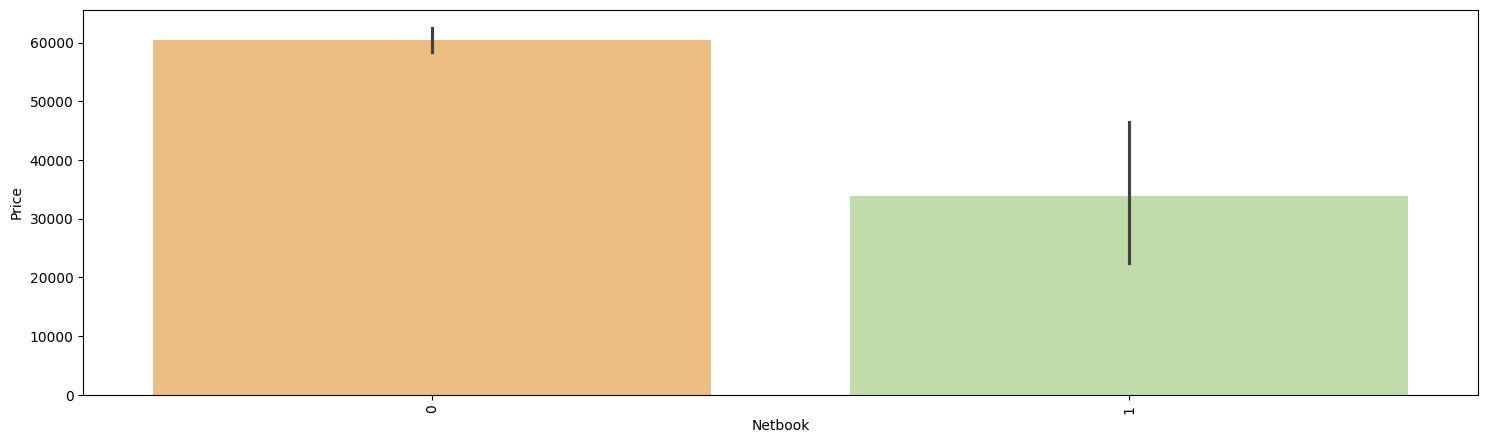

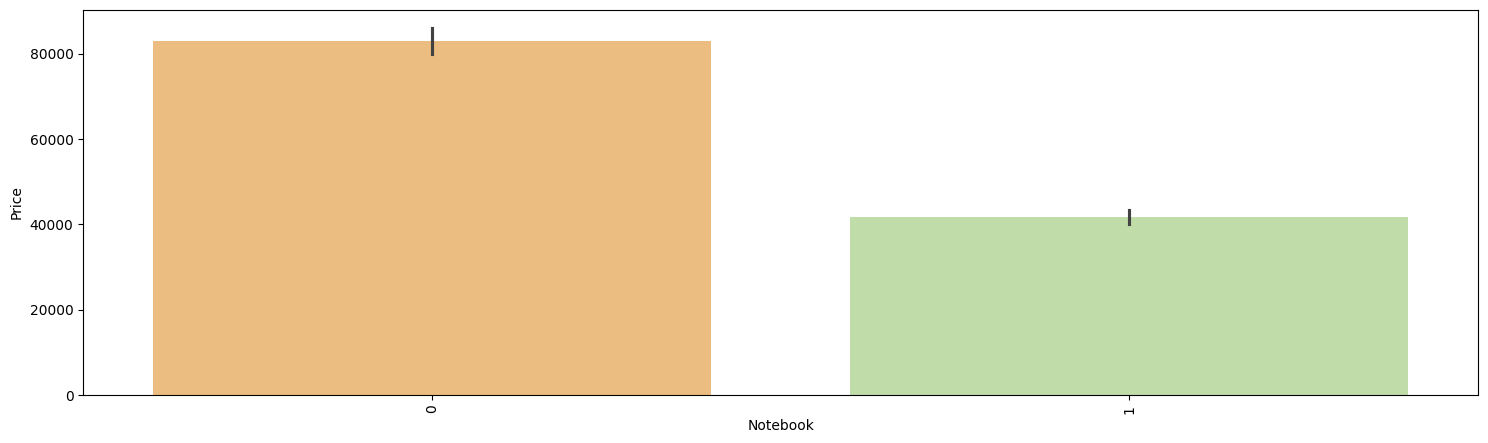

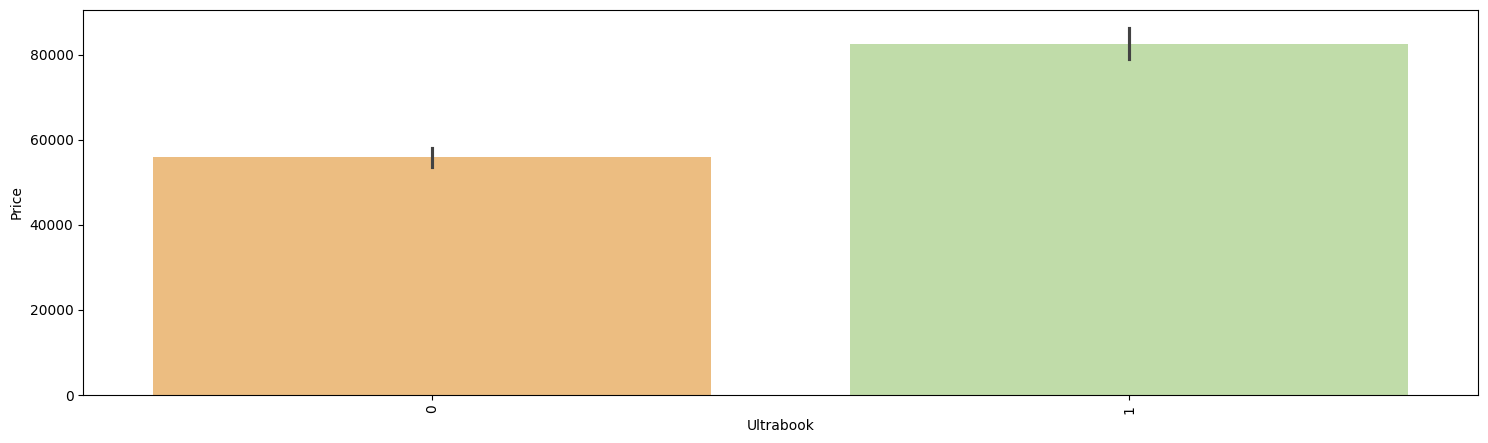

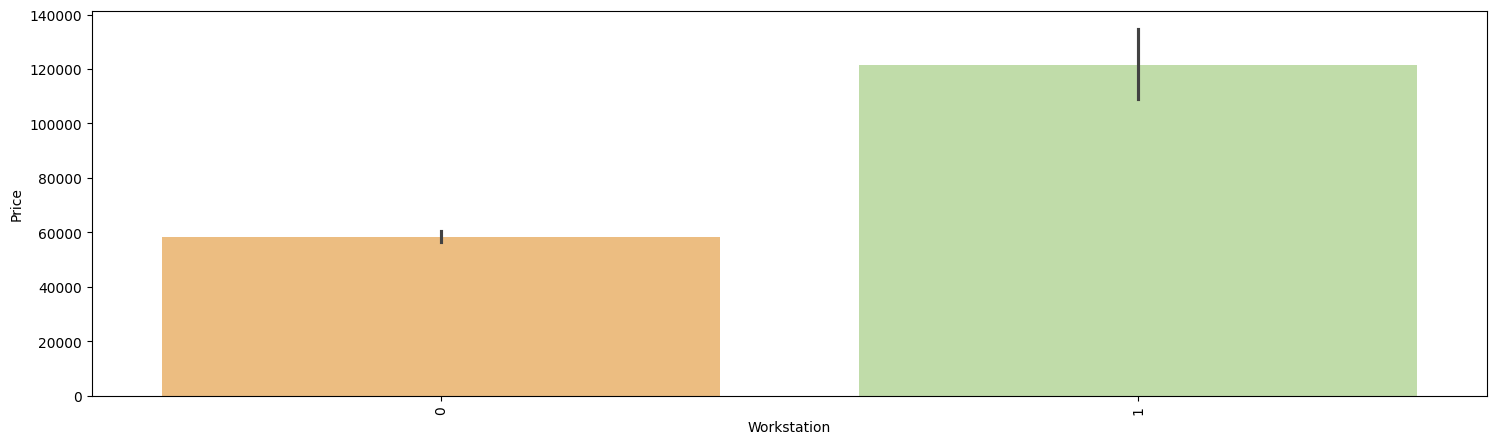

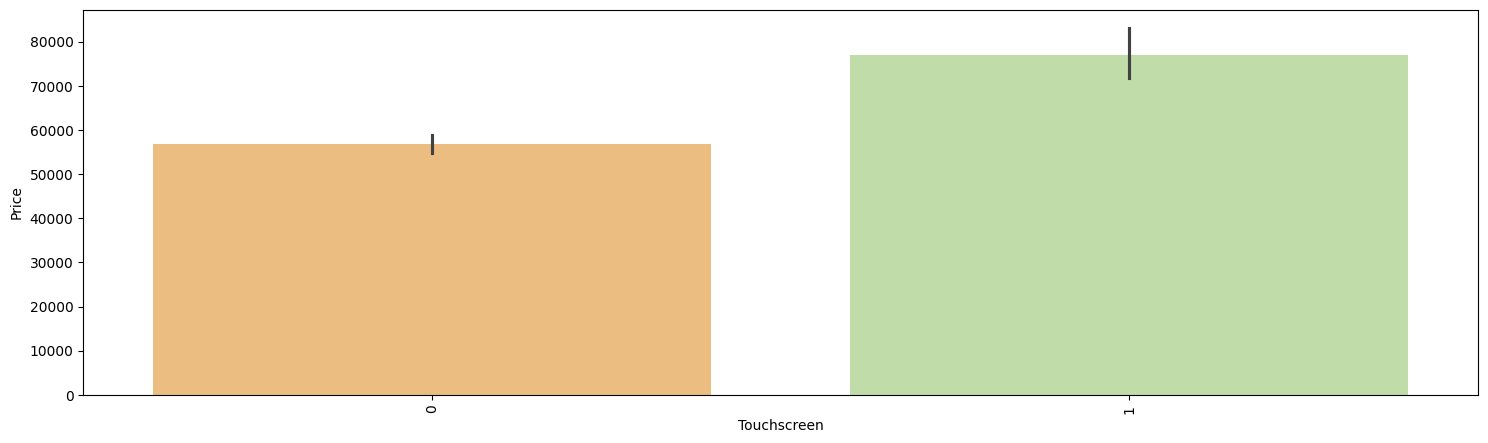

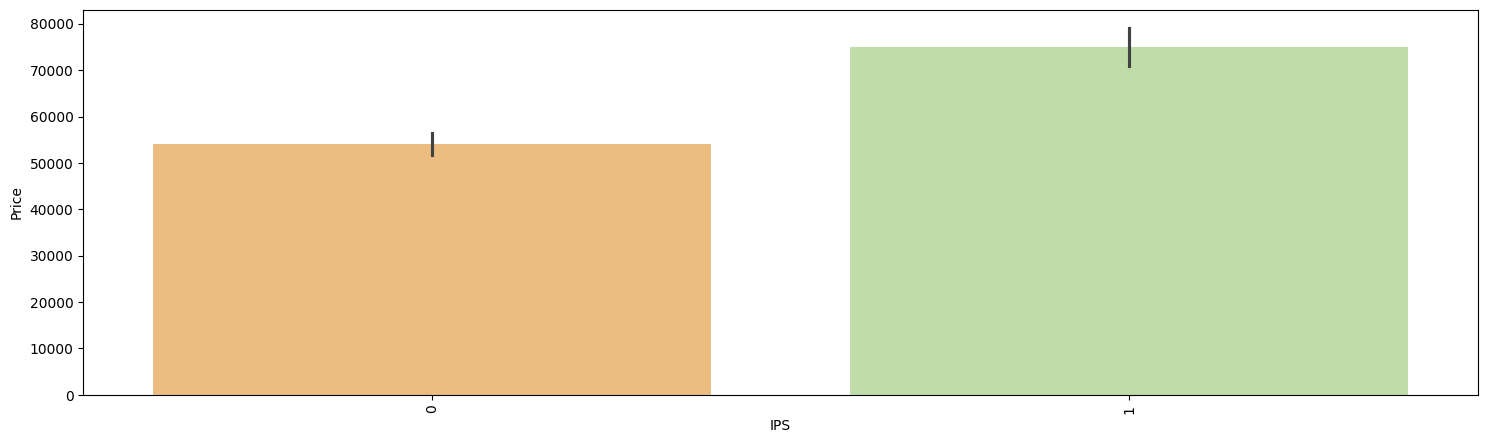

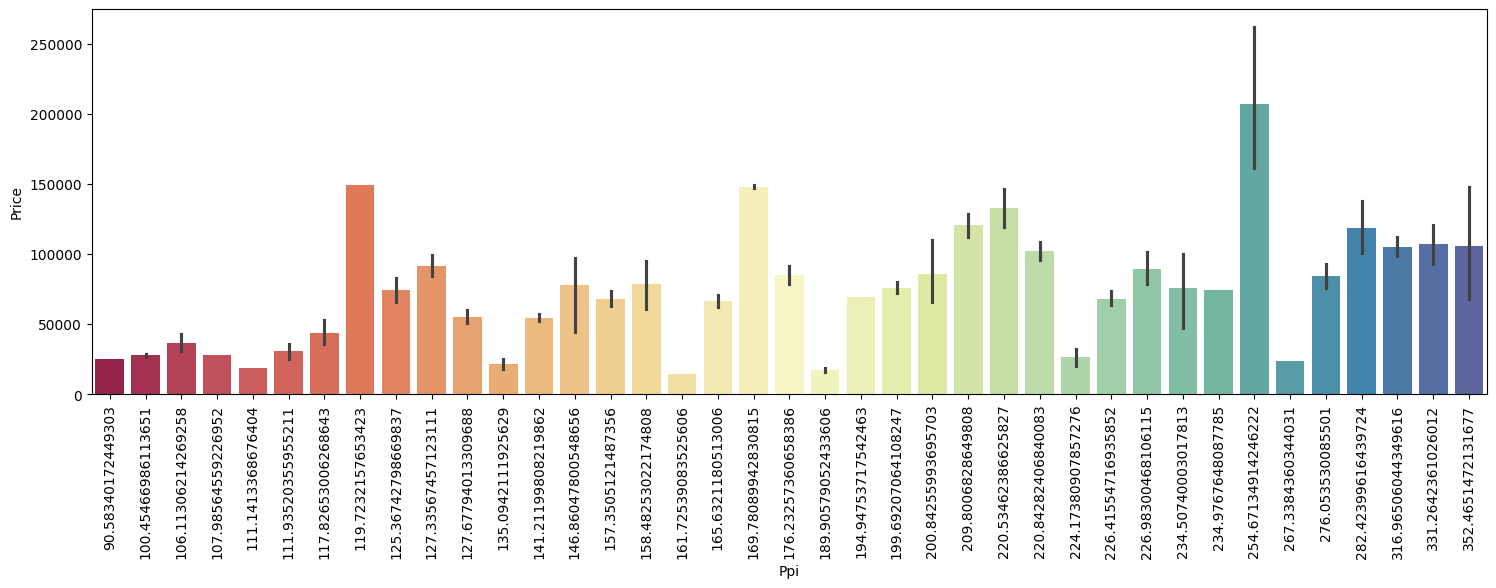

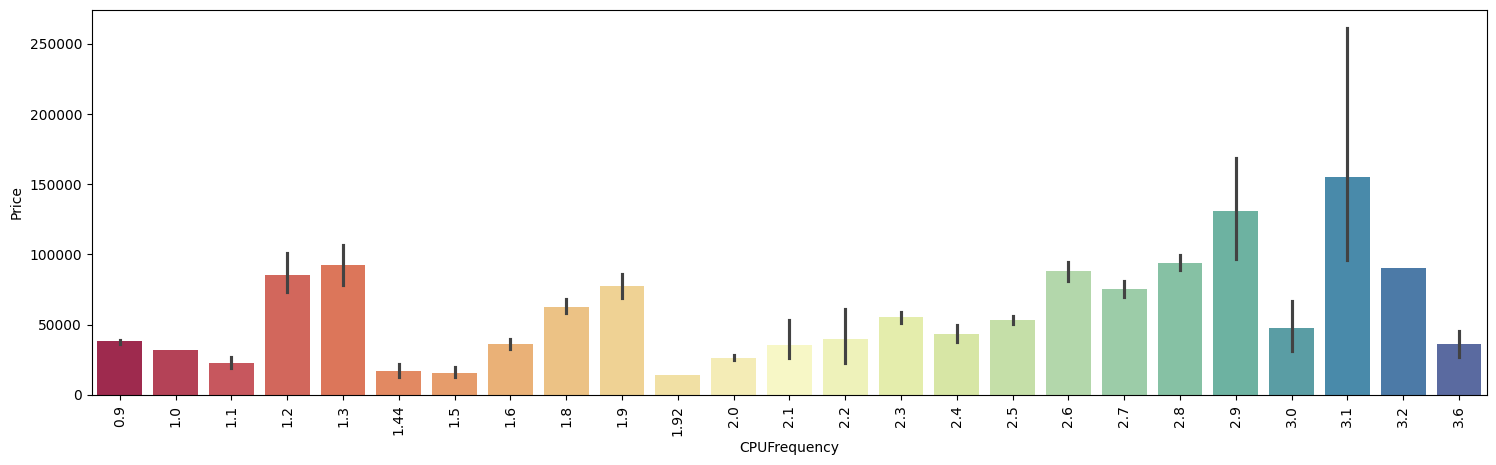

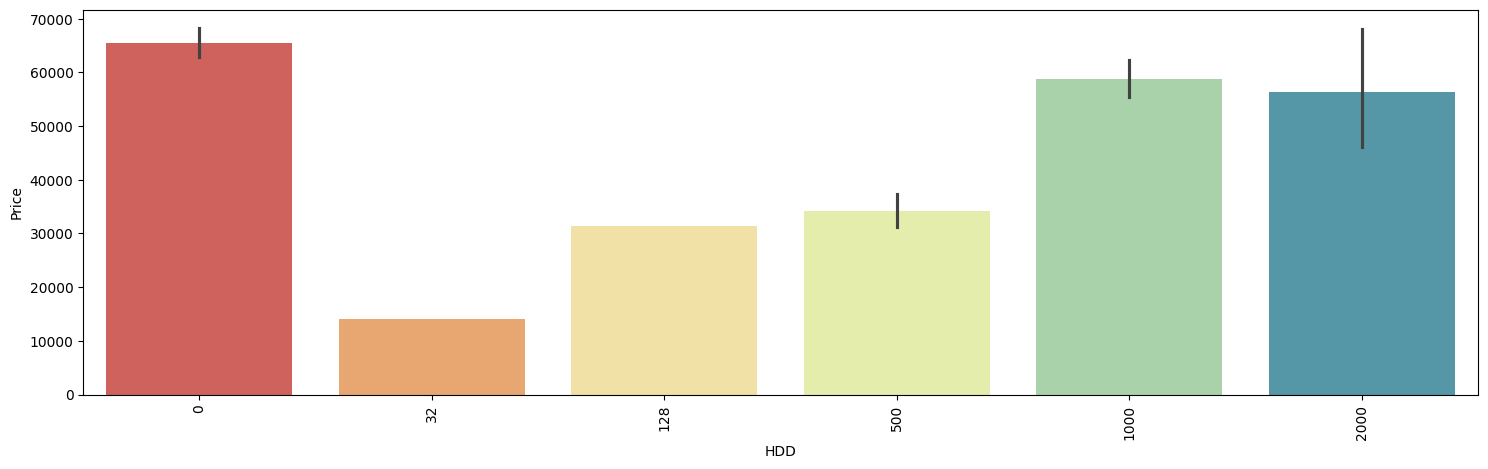

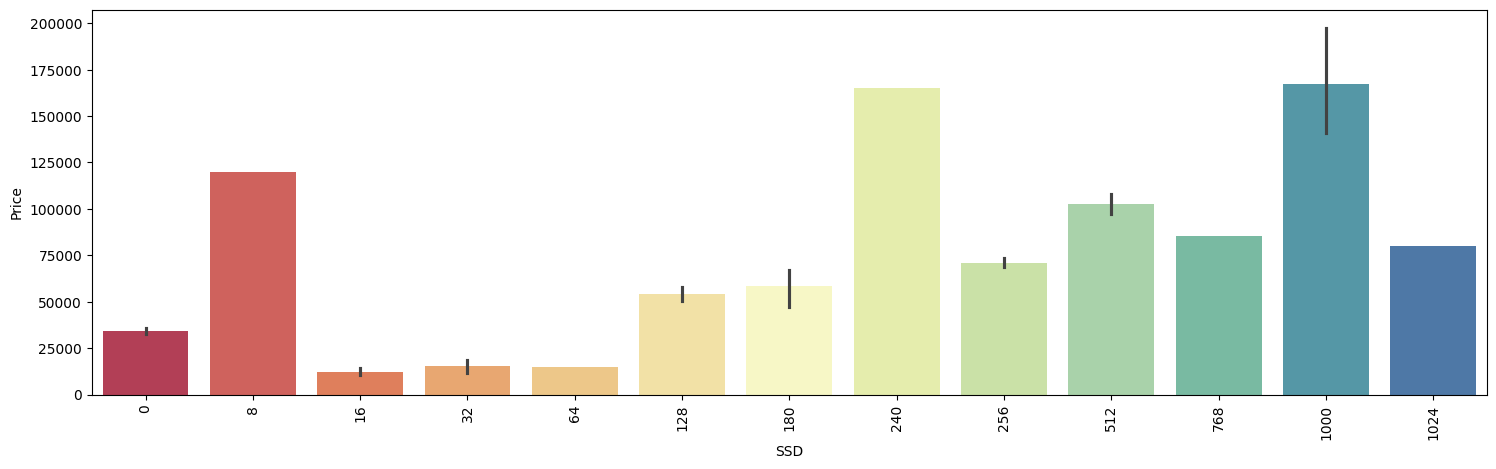

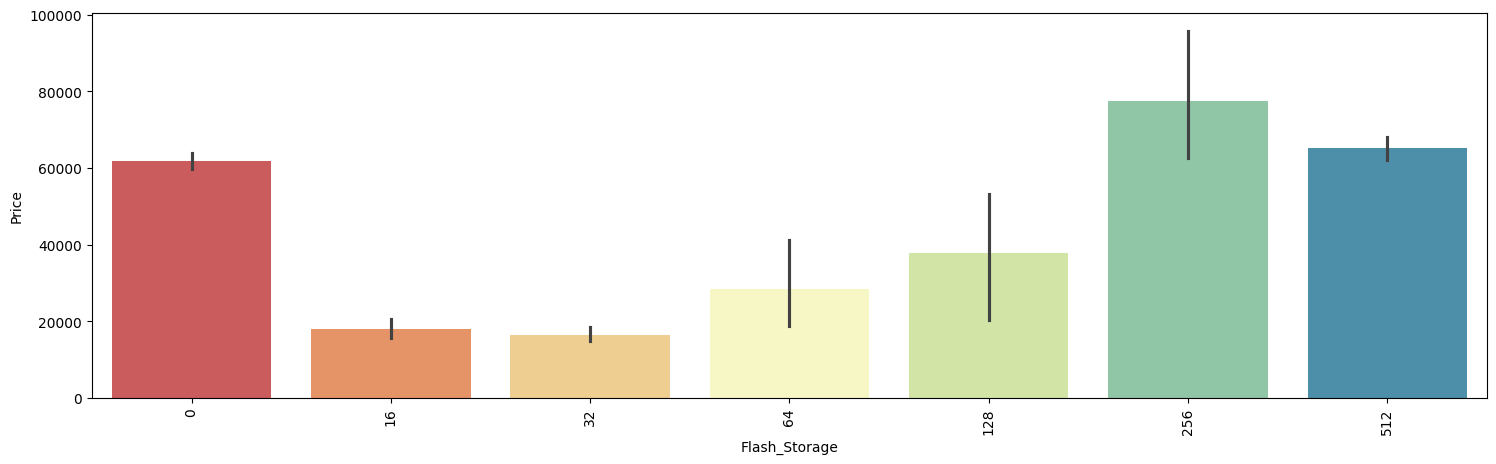

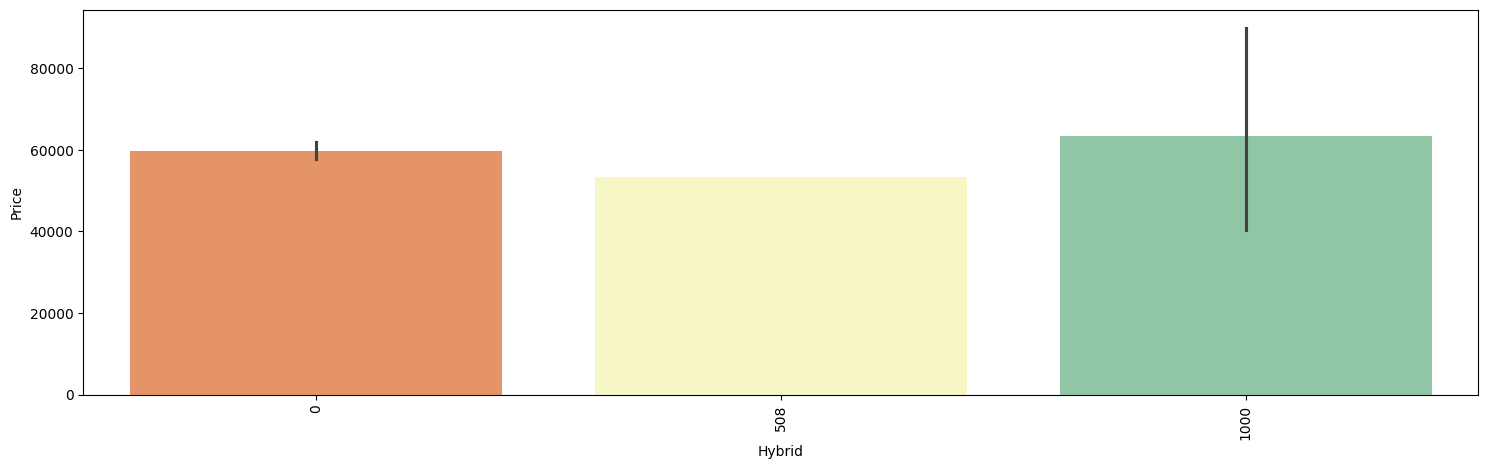

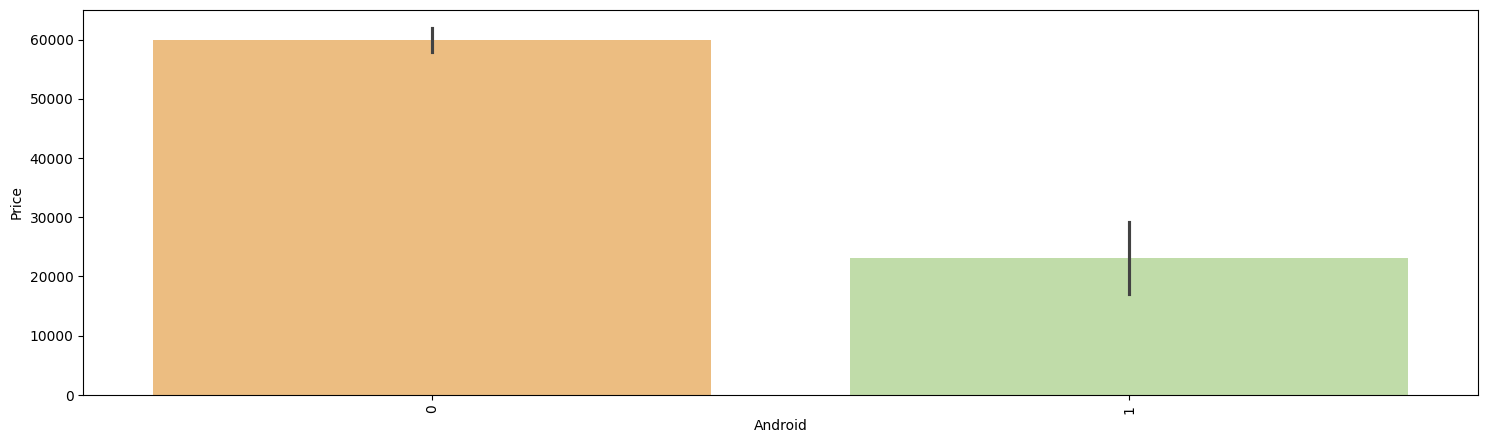

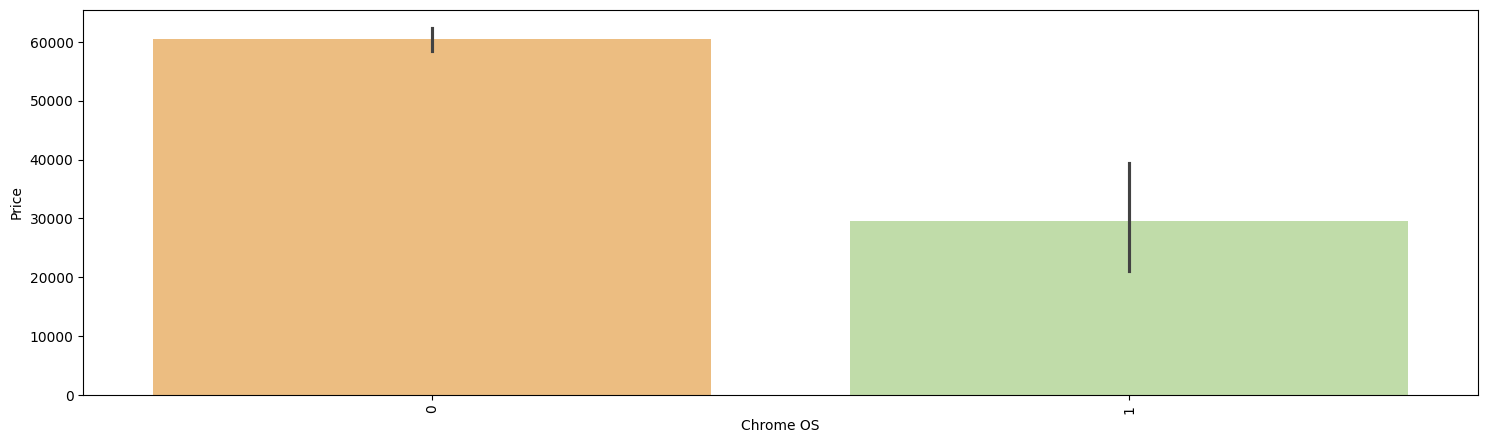

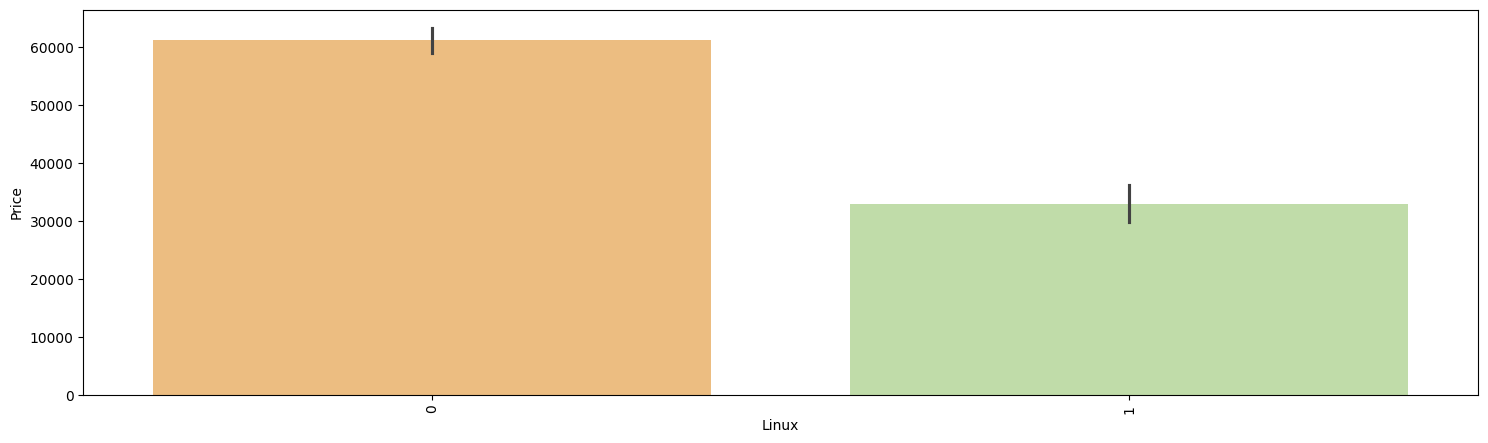

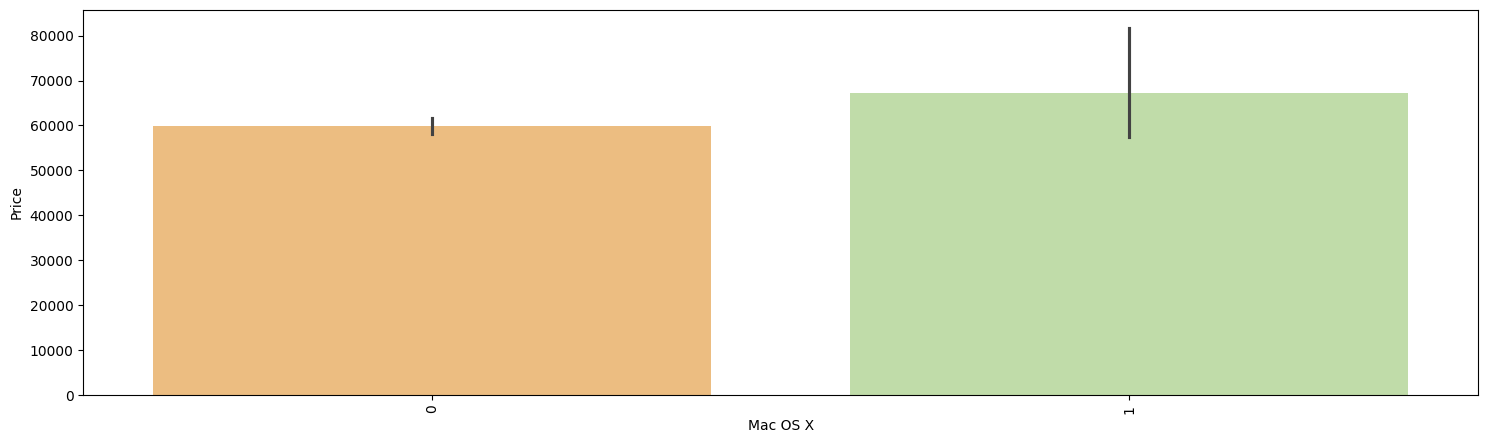

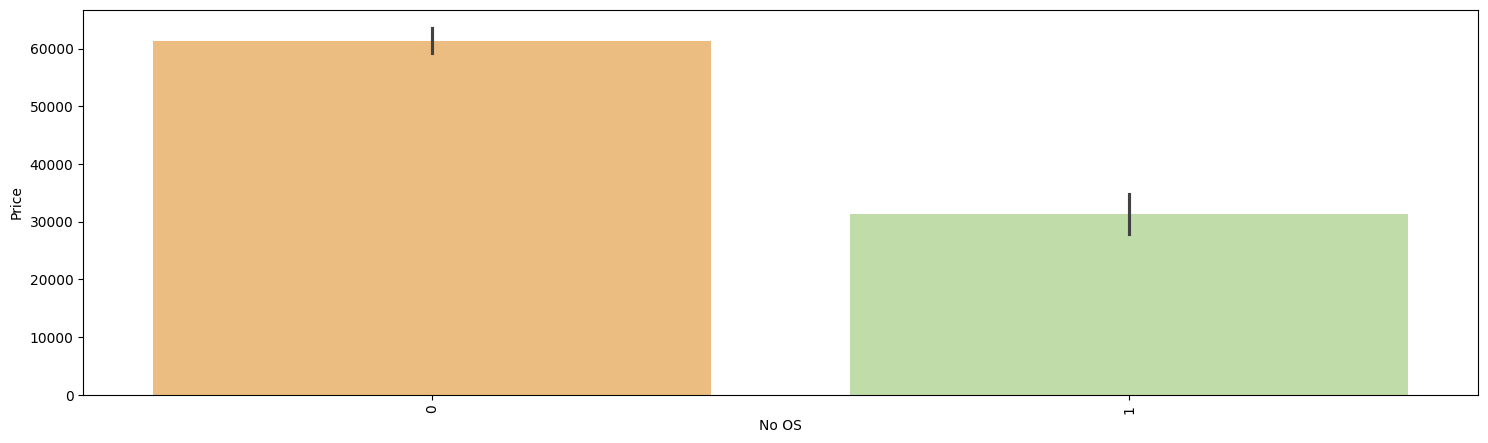

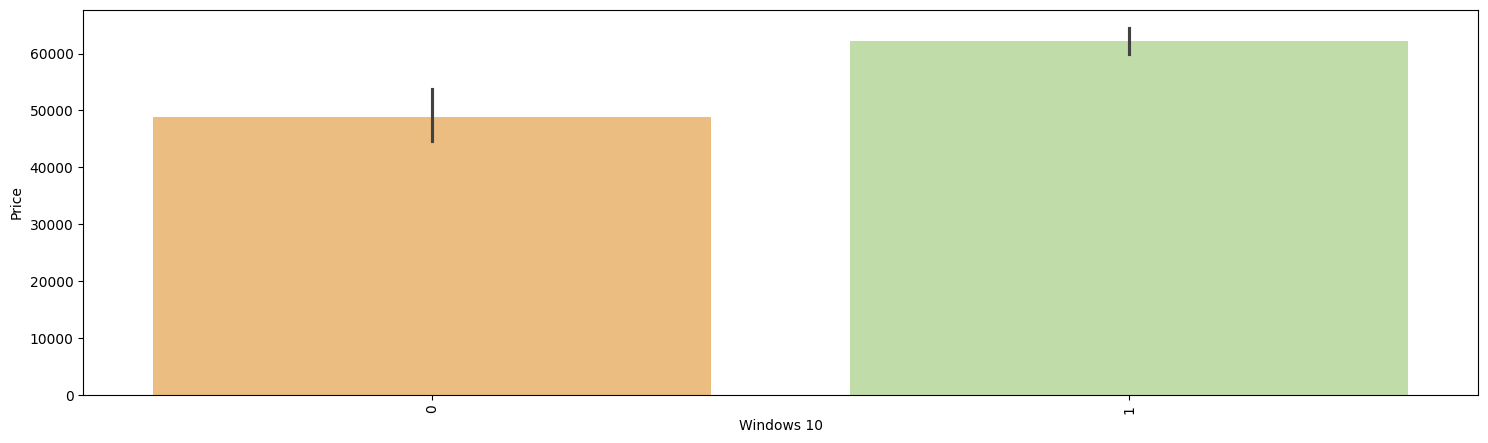

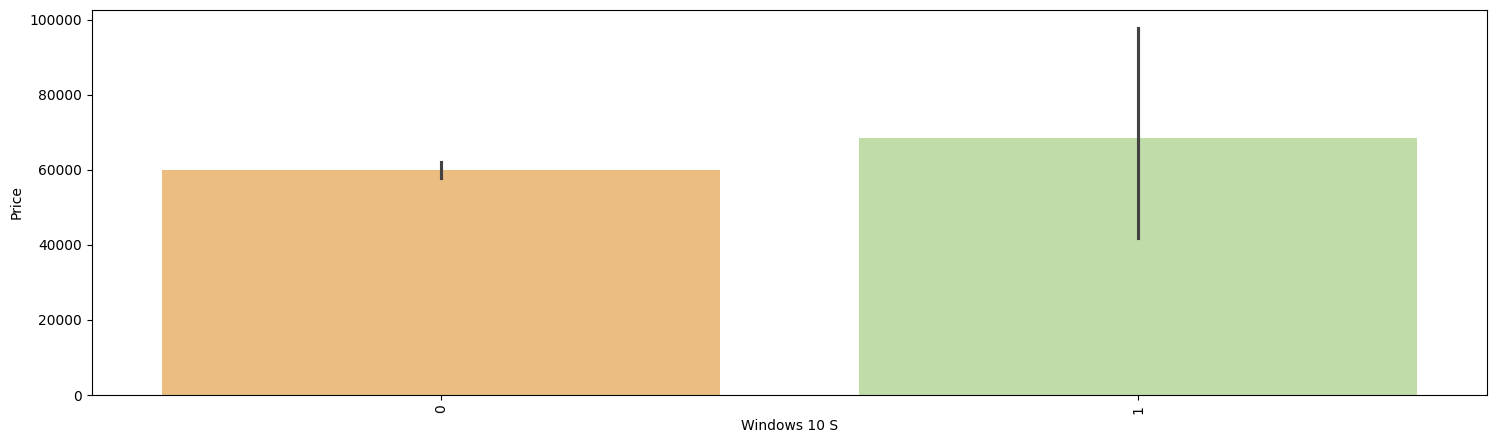

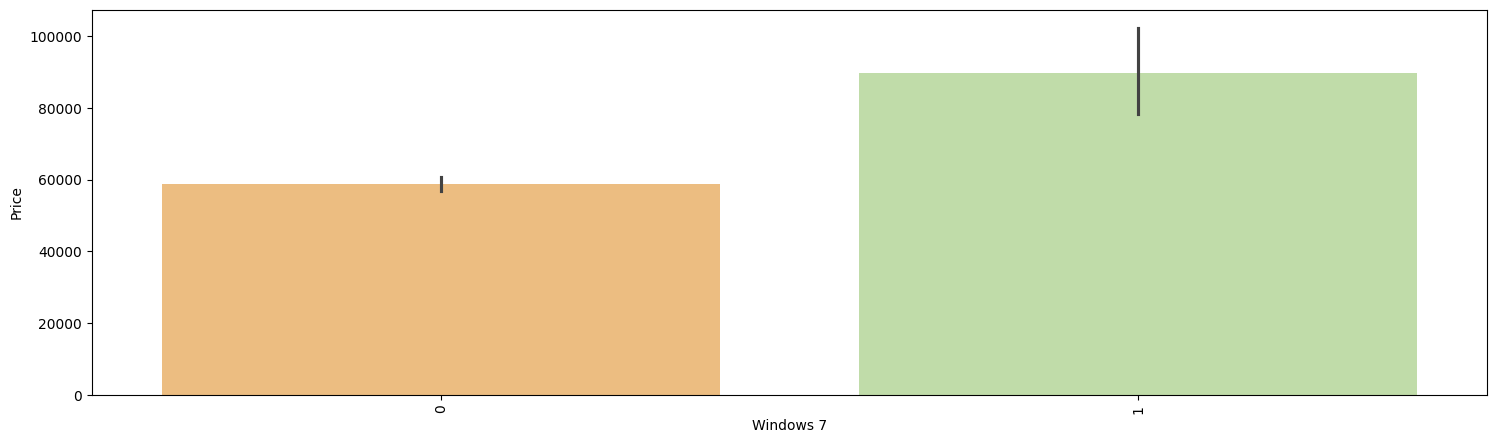

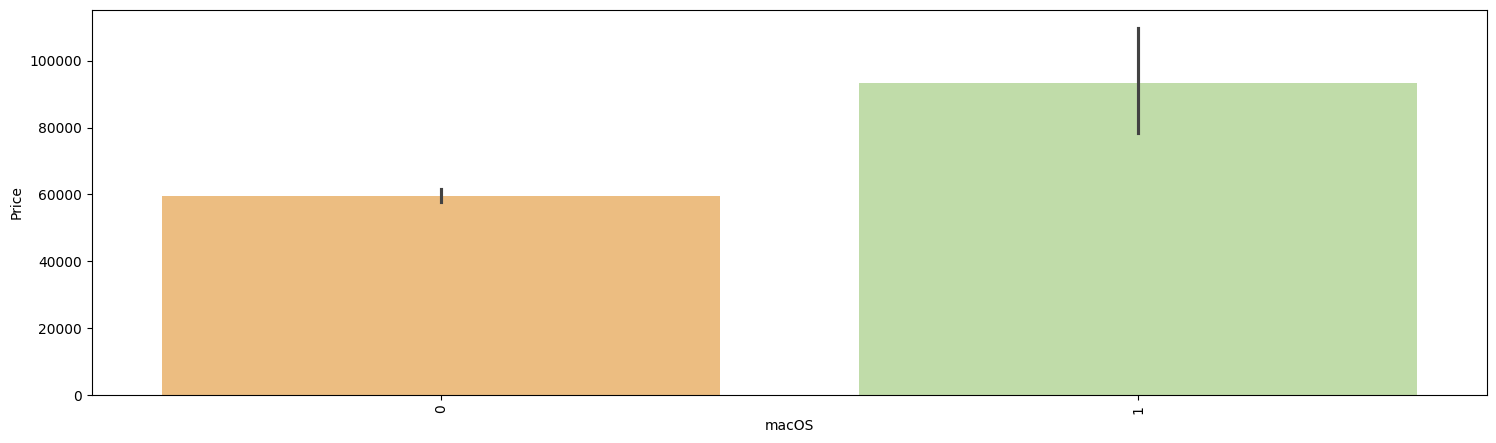

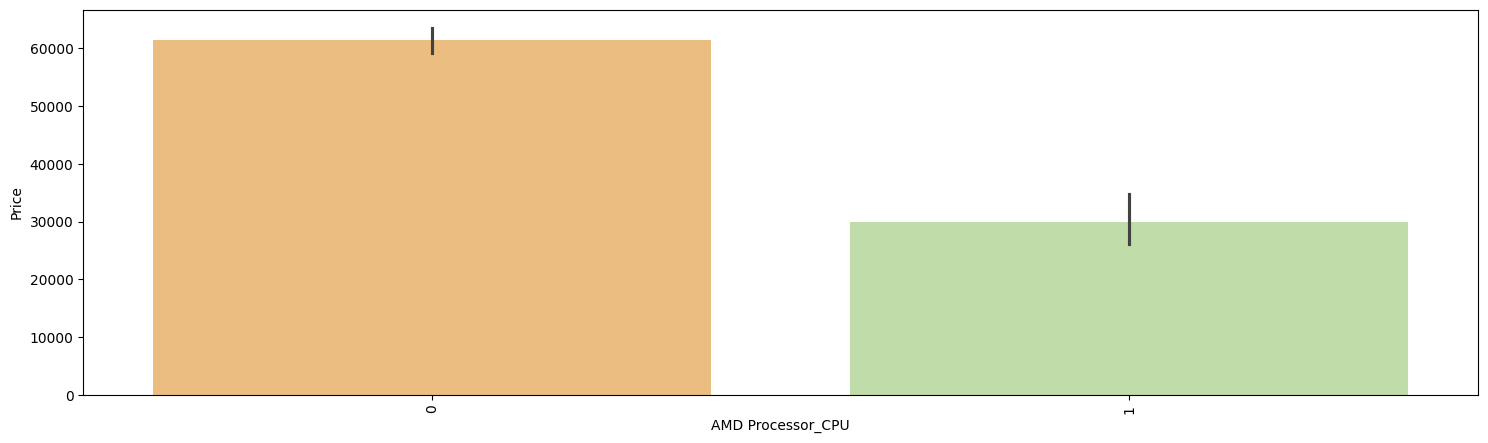

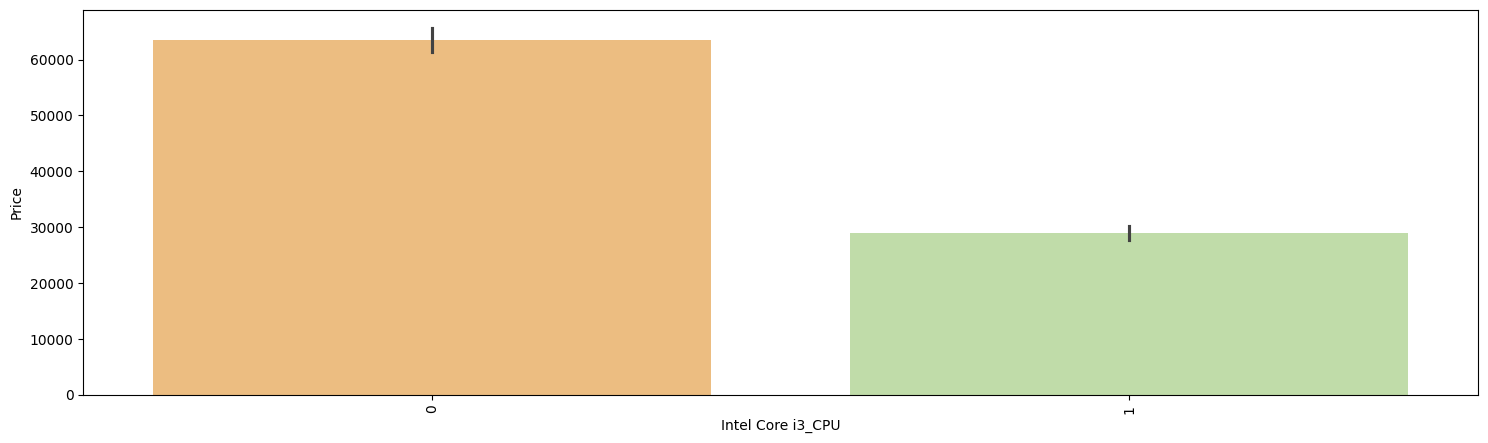

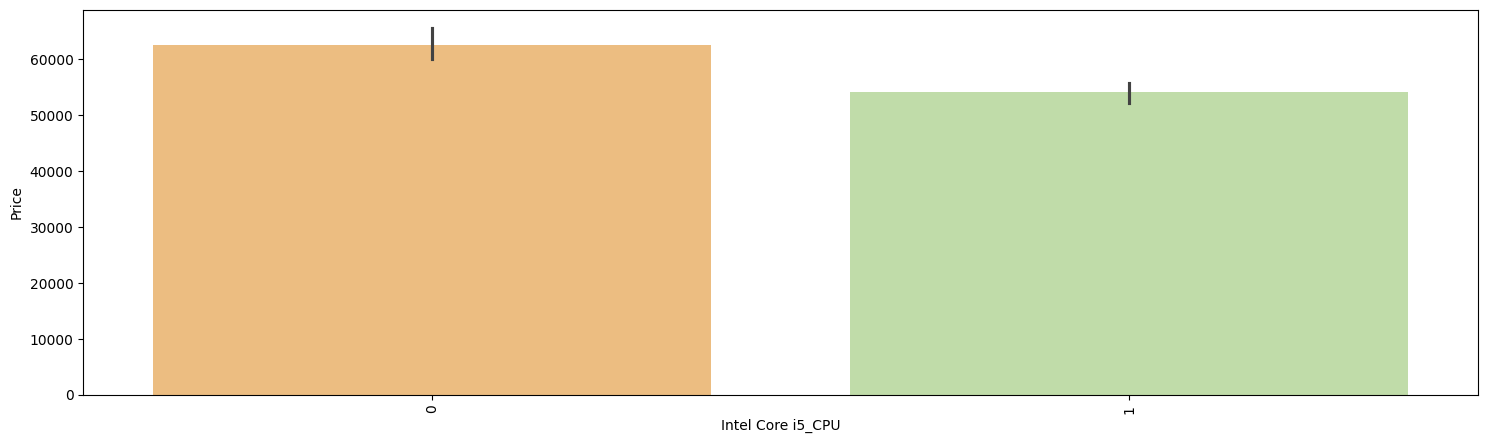

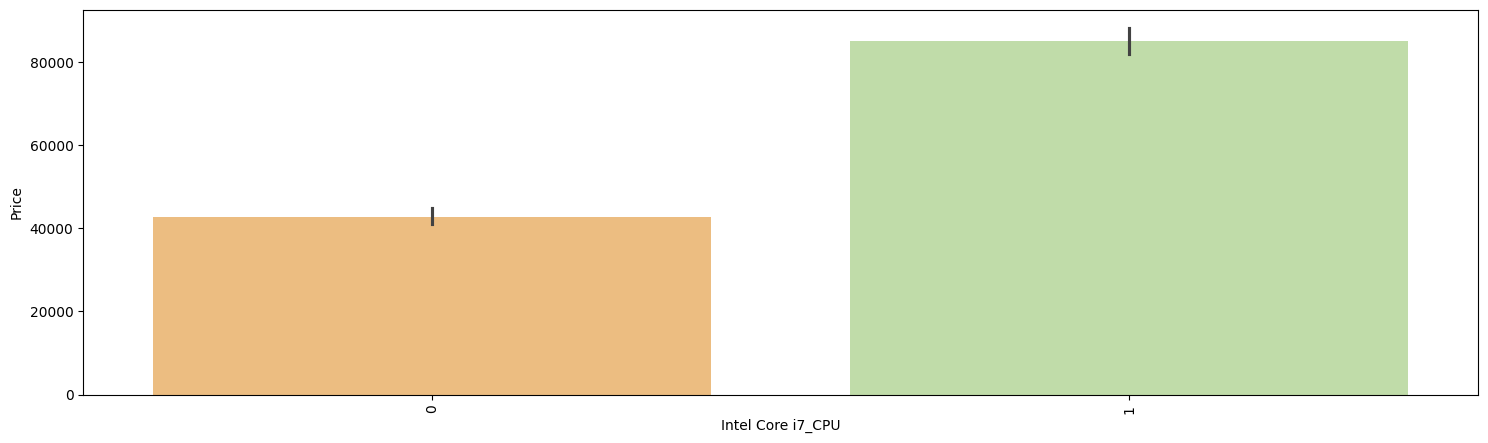

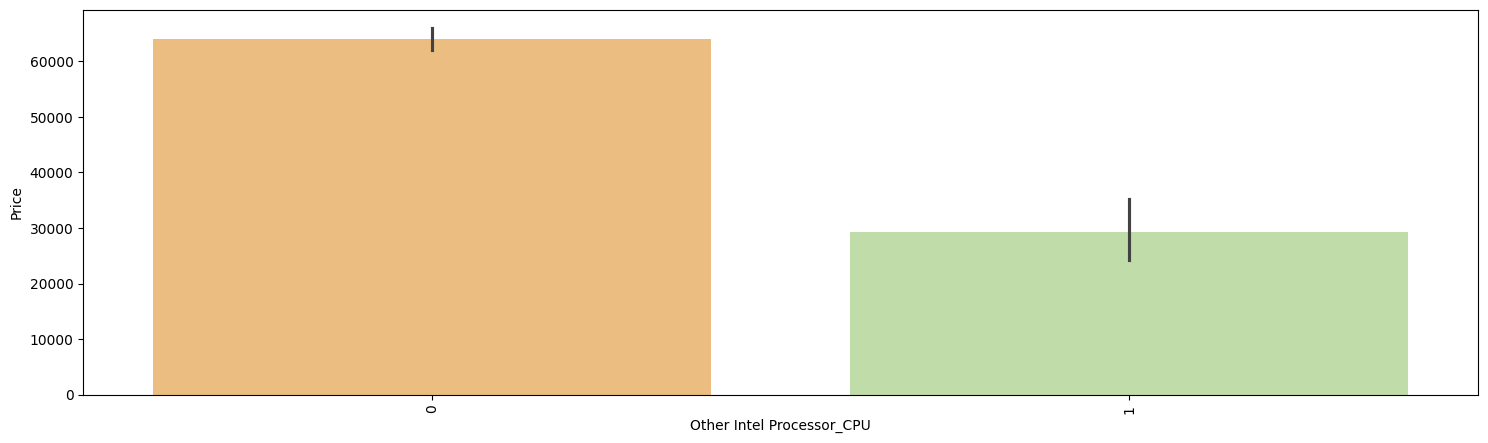

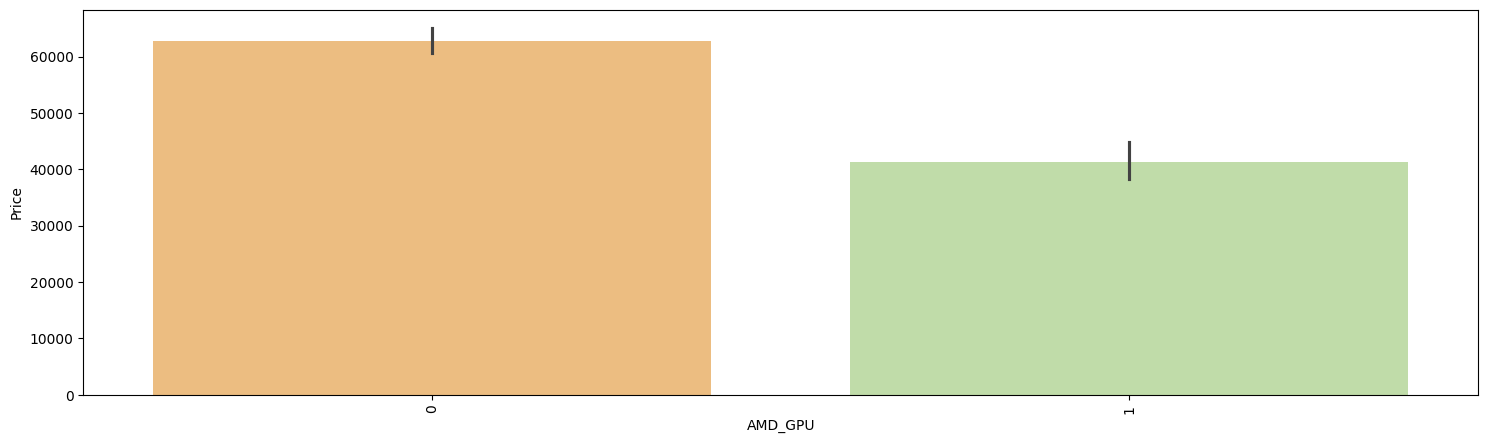

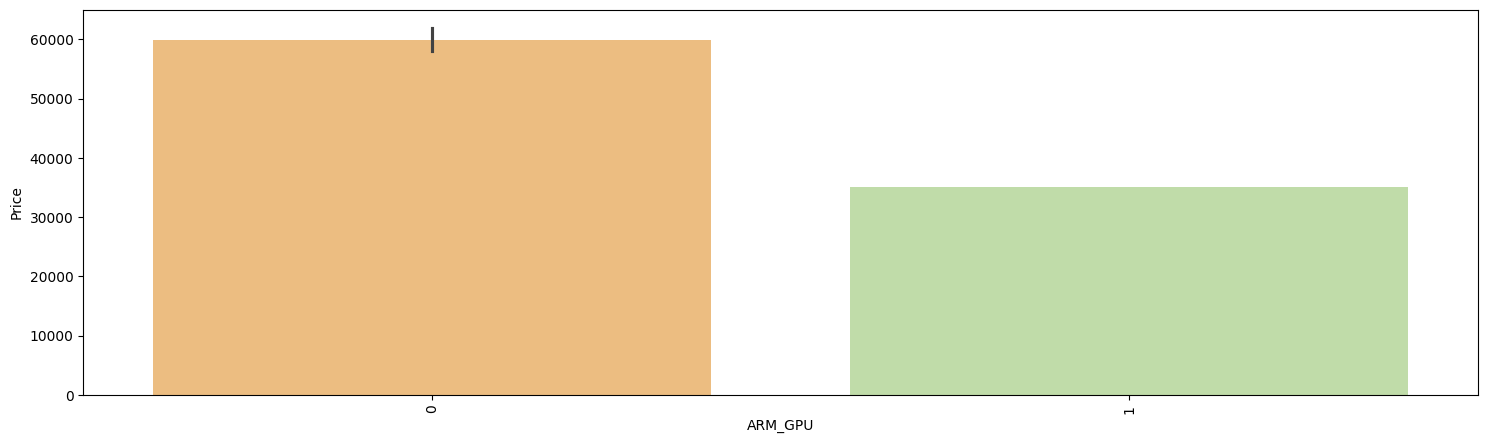

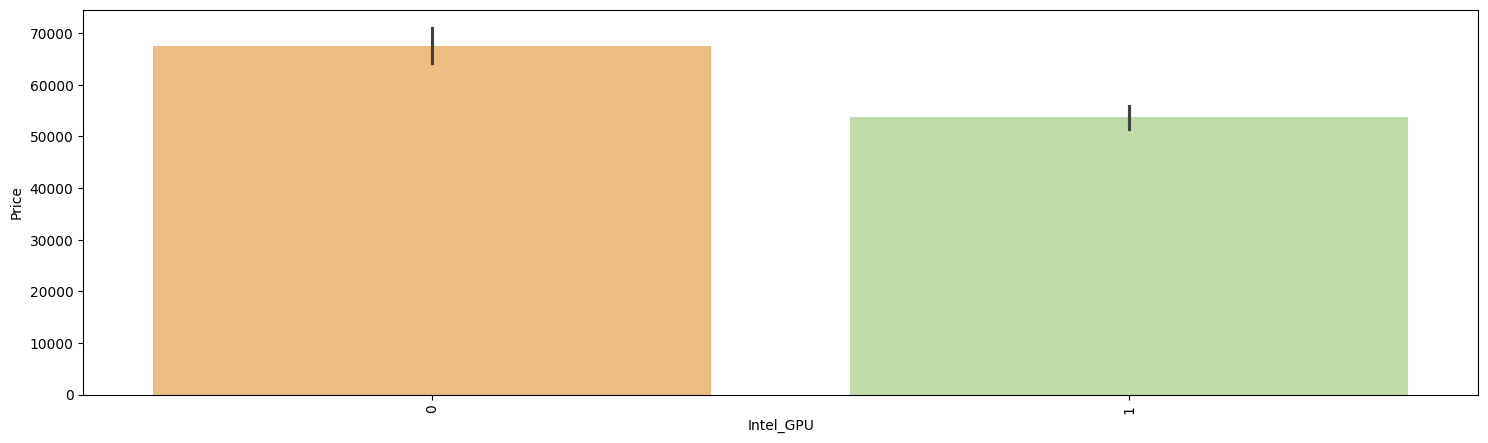

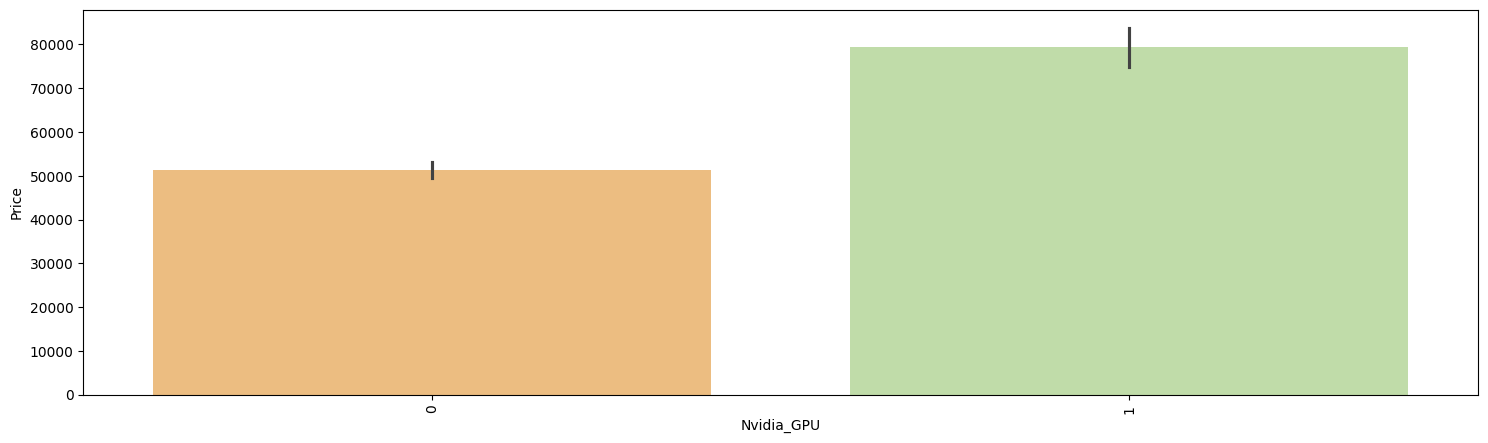

In [ ]:
for val in features:
  plt.figure(figsize=(18,5))
  print(sns.barplot(x=features[val],y=target,palette='Spectral'))
  plt.xticks(rotation=90)

**FEATURE SELECTION USING CORRELATION AND MUTUAL INFORMATION GAIN**

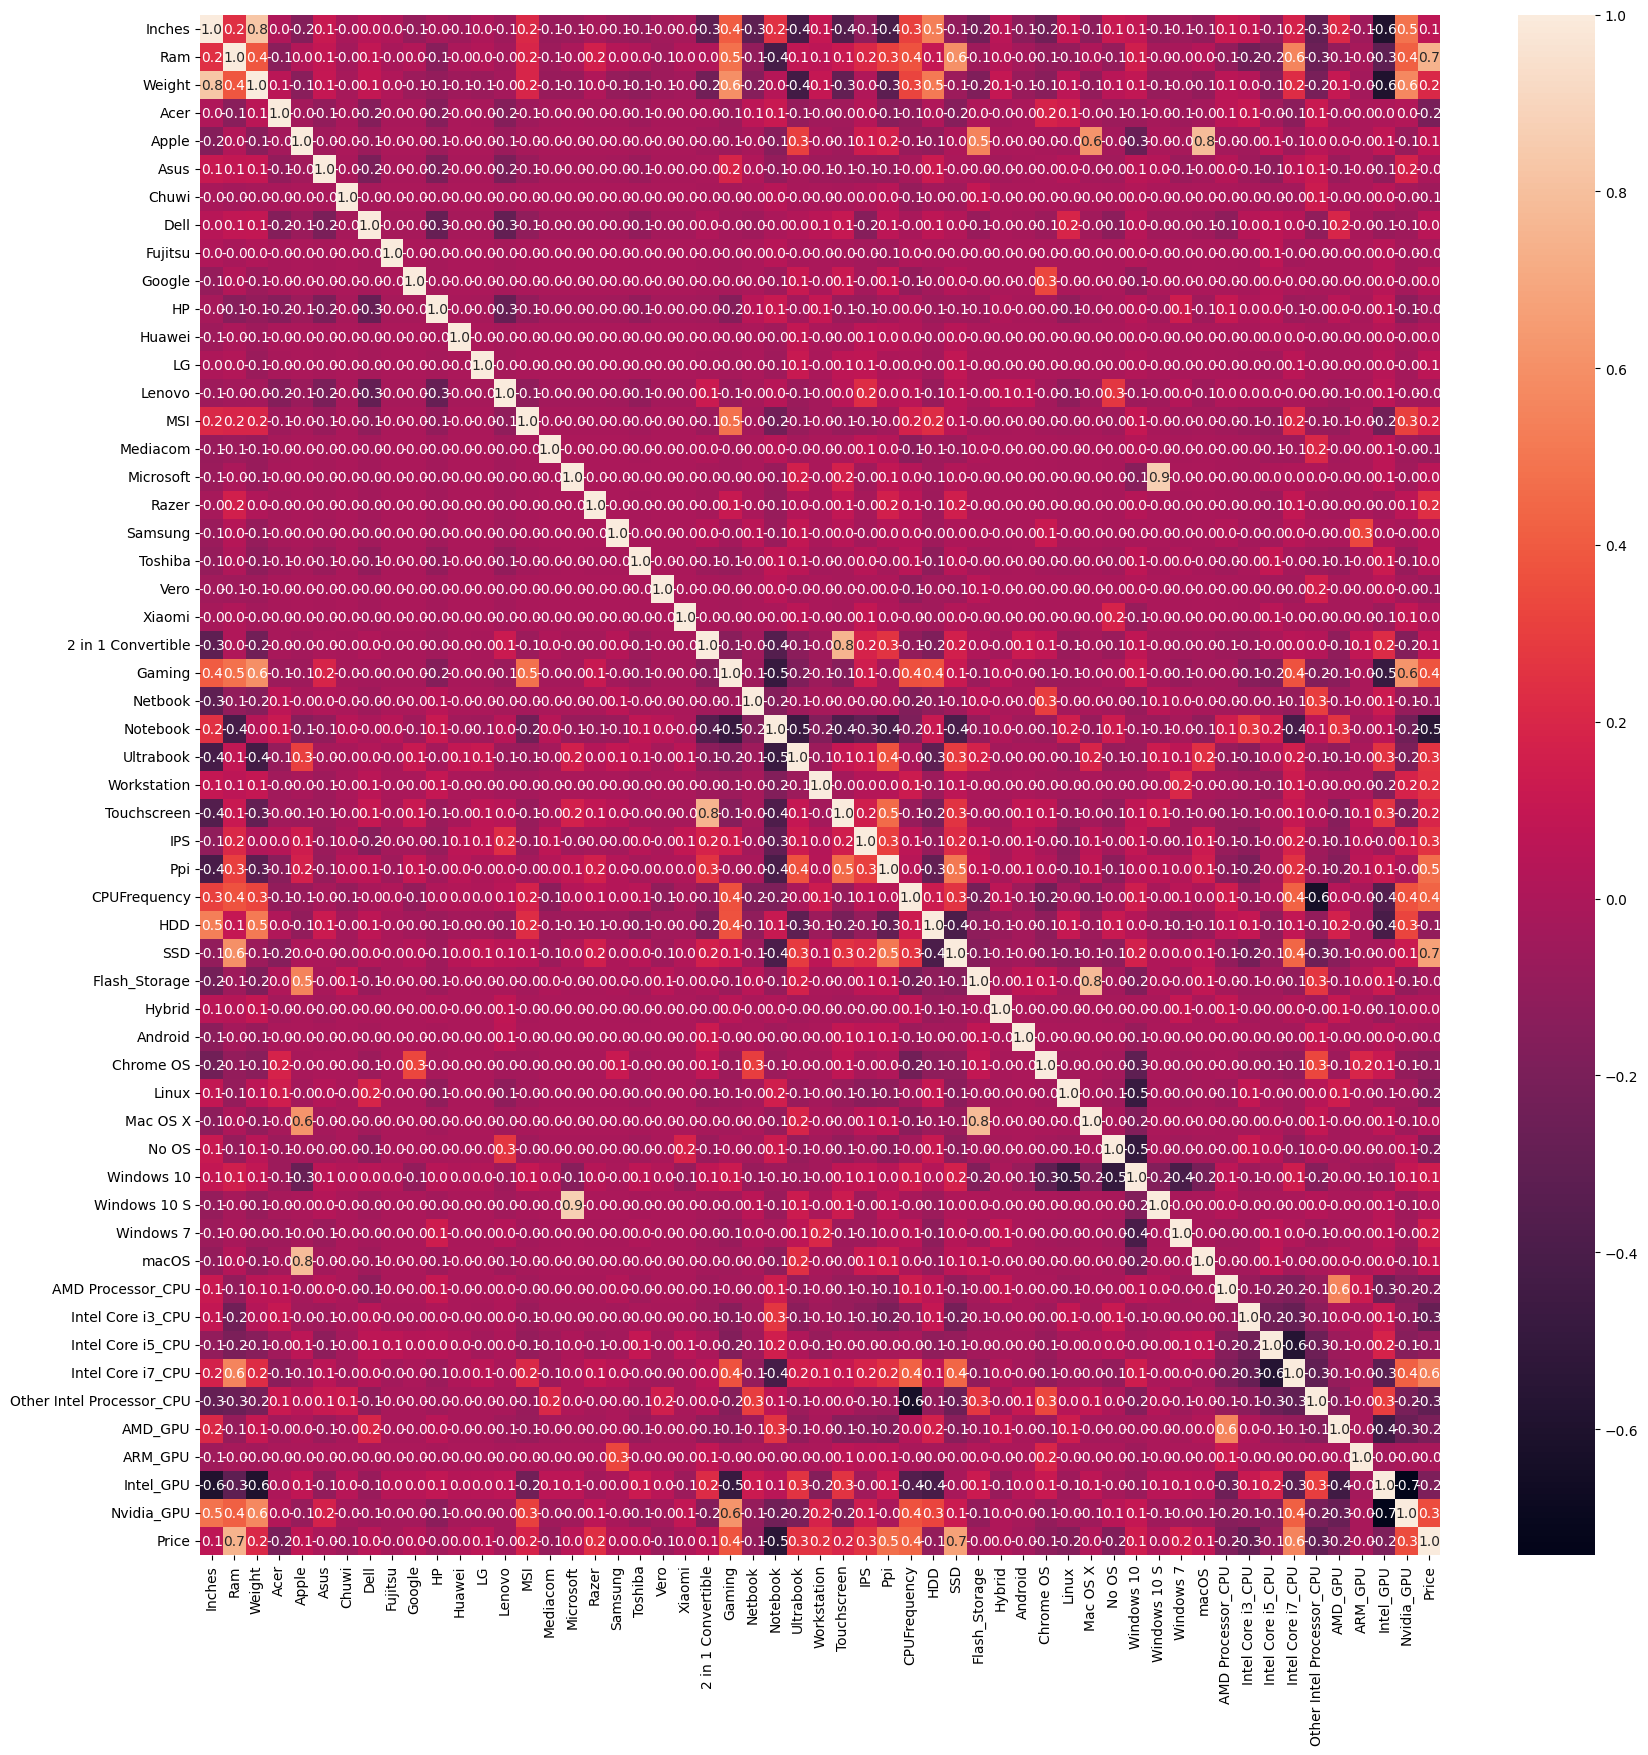

In [ ]:
cor=pd.concat([features,target],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(cor.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
correltion=cor.corr()['Price'].apply(abs).sort_values()
correltion

Xiaomi                       0.000776
Hybrid                       0.007989
Asus                         0.010376
Mac OS X                     0.015656
Huawei                       0.016851
Windows 10 S                 0.018312
ARM_GPU                      0.018431
Fujitsu                      0.027135
Lenovo                       0.029007
Samsung                      0.034584
Google                       0.038086
Android                      0.038700
Toshiba                      0.040339
Flash_Storage                0.040511
HP                           0.041291
Microsoft                    0.047562
Dell                         0.048509
Chuwi                        0.055646
LG                           0.067053
Inches                       0.068197
Vero                         0.071972
2 in 1 Convertible           0.072675
Apple                        0.080688
Mediacom                     0.087161
macOS                        0.089928
HDD                          0.096441
Netbook     

In [ ]:
mutual_info=mutual_info_regression(features,target)
mutual_info

array([0.2302454 , 0.50230559, 0.31525504, 0.04772835, 0.01867347,
       0.01505729, 0.        , 0.01422459, 0.0057169 , 0.        ,
       0.00401729, 0.        , 0.        , 0.00885706, 0.01781217,
       0.01104525, 0.00572116, 0.01168354, 0.00912943, 0.02363426,
       0.00486062, 0.00385693, 0.02813202, 0.08338729, 0.03234462,
       0.23213682, 0.07070814, 0.02355941, 0.03064241, 0.04911994,
       0.42699319, 0.50127782, 0.0957393 , 0.35853308, 0.09948945,
       0.00524275, 0.        , 0.01940502, 0.03995898, 0.00443139,
       0.0279999 , 0.0249787 , 0.        , 0.01475759, 0.00764795,
       0.03844781, 0.12419629, 0.1219959 , 0.23647311, 0.1798784 ,
       0.01896911, 0.        , 0.05478795, 0.08781502])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=features.columns
mutual_info.sort_values(ascending=False)

Ram                          0.502306
CPUFrequency                 0.501278
Ppi                          0.426993
SSD                          0.358533
Weight                       0.315255
Intel Core i7_CPU            0.236473
Notebook                     0.232137
Inches                       0.230245
Other Intel Processor_CPU    0.179878
Intel Core i3_CPU            0.124196
Intel Core i5_CPU            0.121996
Flash_Storage                0.099489
HDD                          0.095739
Nvidia_GPU                   0.087815
Gaming                       0.083387
Ultrabook                    0.070708
Intel_GPU                    0.054788
IPS                          0.049120
Acer                         0.047728
Linux                        0.039959
AMD Processor_CPU            0.038448
Netbook                      0.032345
Touchscreen                  0.030642
2 in 1 Convertible           0.028132
No OS                        0.028000
Windows 10                   0.024979
Toshiba     

**MUTUAL INFORMATION GAIN PLOTING**

<Axes: >

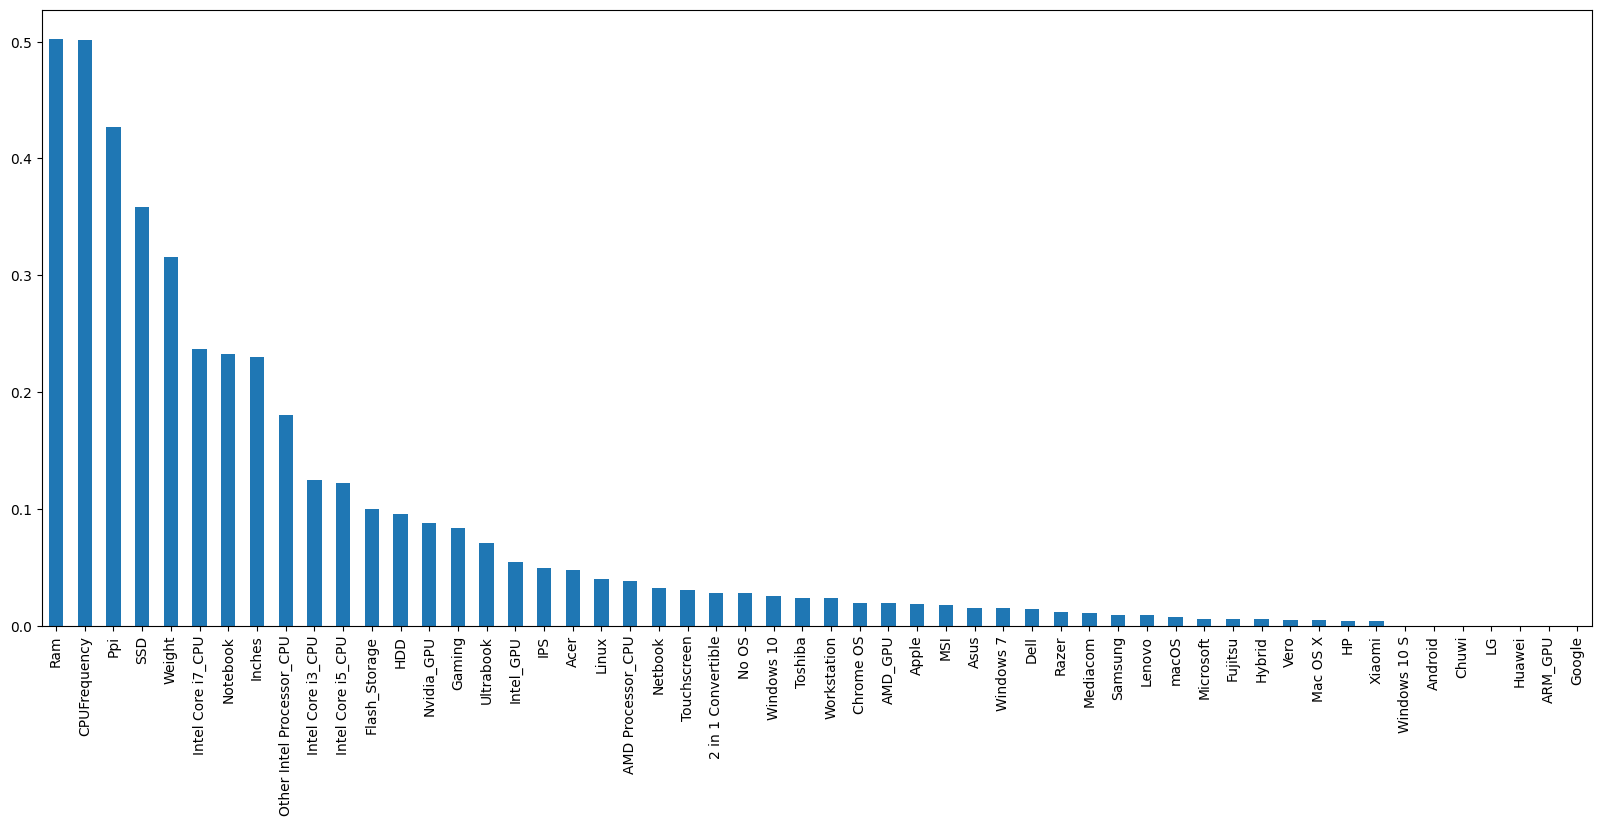

In [ ]:
#ploting the dependencies
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
selected_features=mutual_info[mutual_info>0.01].index
selected_features.sort_values()

Index(['2 in 1 Convertible', 'AMD Processor_CPU', 'AMD_GPU', 'Acer', 'Apple',
       'Asus', 'CPUFrequency', 'Chrome OS', 'Dell', 'Flash_Storage', 'Gaming',
       'HDD', 'IPS', 'Inches', 'Intel Core i3_CPU', 'Intel Core i5_CPU',
       'Intel Core i7_CPU', 'Intel_GPU', 'Linux', 'MSI', 'Mediacom', 'Netbook',
       'No OS', 'Notebook', 'Nvidia_GPU', 'Other Intel Processor_CPU', 'Ppi',
       'Ram', 'Razer', 'SSD', 'Toshiba', 'Touchscreen', 'Ultrabook', 'Weight',
       'Windows 10', 'Windows 7', 'Workstation'],
      dtype='object')

In [ ]:
selected_features=list(selected_features)


In [ ]:
new_laptop_data=cor[selected_features]
new_laptop_data

Inches  Ram Weight  Acer  Apple  Asus  Dell  MSI  Mediacom  Razer  ...  \
0       13.3    8   1.37     0      1     0     0    0         0      0  ...   
1       13.3    8   1.34     0      1     0     0    0         0      0  ...   
2       15.6    8   1.86     0      0     0     0    0         0      0  ...   
3       15.4   16   1.83     0      1     0     0    0         0      0  ...   
4       13.3    8   1.37     0      1     0     0    0         0      0  ...   
...      ...  ...    ...   ...    ...   ...   ...  ...       ...    ...  ...   
1298    14.0    4    1.8     0      0     0     0    0         0      0  ...   
1299    13.3   16    1.3     0      0     0     0    0         0      0  ...   
1300    14.0    2    1.5     0      0     0     0    0         0      0  ...   
1301    15.6    6   2.19     0      0     0     0    0         0      0  ...   
1302    15.6    4    2.2     0      0     1     0    0         0      0  ...   

      Windows 10  Windows 7  AMD Processor_CPU  Intel Core i3_CPU  \
0              0          0                  0                  0   
1              0          0                  0                  0   
2              0          0                  0                  0   
3              0          0                  0                  0   
4              0          0                  0                  0   
...          ...        ...                ...                ...   
1298           1          0                  0                  0   
1299           1          0                  0                  0   
1300           1          0                  0                  0   
1301           1          0                  0                  0   
1302           1          0                  0                  0   

      Intel Core i5_CPU  Intel Core i7_CPU  Other Intel Processor_CPU  \
0                     1                  0                          0   
1                     1                  0                          0   
2                     1                  0                          0   
3                     0                  1                          0   
4                     1                  0                          0   
...                 ...                ...                        ...   
1298                  0                  1                          0   
1299                  0                  1                          0   
1300                  0                  0                          1   
1301                  0                  1                          0   
1302                  0                  0                          1   

      AMD_GPU  Intel_GPU  Nvidia_GPU  
0           0          1           0  
1           0          1           0  
2           0          1           0  
3           1          0           0  
4           0          1           0  
...       ...        ...         ...  
1298        0          1           0  
1299        0          1           0  
1300        0          1           0  
1301        1          0           0  
1302        0          1           0  

[1303 rows x 37 columns]

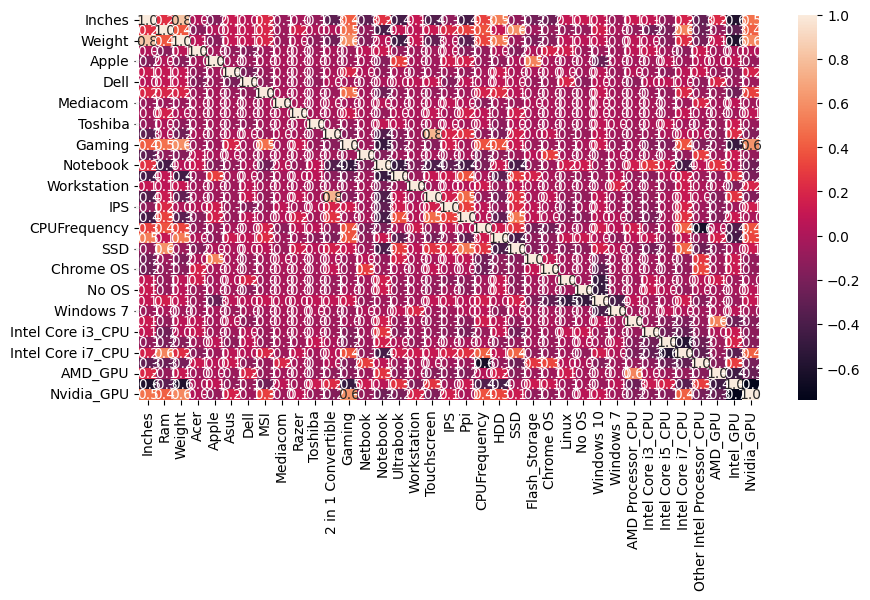

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(new_laptop_data.corr(),annot=True,fmt='.1f')
plt.show()

**SPLITTING FEATURES AND TARGET**

In [ ]:
laptop_features=new_laptop_data
laptop_price=laptop_data['Price']

In [ ]:
features_train,features_test,target_train,target_test=train_test_split(laptop_features,laptop_price,test_size=0.2,random_state=1)


**MODEL CREATION AND PIPELINING**

In [ ]:

models = [
    ('Linear Regression', LinearRegression()),
    ('DecisionTree',DecisionTreeRegressor() ),
    ('RandomForest',RandomForestRegressor())
]
for model_name, model in models:
    pipe = Pipeline([(model_name, model)])

    pipe.fit(features_train, target_train)
    predictions = pipe.predict(features_test)

    mape=mean_absolute_percentage_error(target_test,predictions)
    r2 = r2_score(target_test, predictions)
    mae=mean_absolute_error(target_test,predictions)

    print(f"--- {model_name} ---")
    print("mean_absolute_error",mae)
    print('Mean_absolute_percentage_error',mape)
    print("R2 score", r2)
    print()


--- **Linear Regression** ---
mean_absolute_error 11241.677452452166
Mean_absolute_percentage_error 0.20333141252329884
R2 score 0.8198209959079015

--- **DecisionTree** ---
mean_absolute_error 13678.567765517242
Mean_absolute_percentage_error 0.2139983843725203
R2 score 0.6985365835601687

--- **RandomForest** ---
mean_absolute_error 8948.385930330162
Mean_absolute_percentage_error 0.14640748453651156
R2 score 0.8594179212464398



**HYPERPARAMETER TUNING**

In [ ]:
rf=RandomForestRegressor()
param={
    'n_estimators':[10,50,100,150],
    'bootstrap':[True,False],
    'random_state':[0,1,42,2,3]
}

In [ ]:

gd=GridSearchCV(rf,param,cv=5,scoring='r2')
gd.fit(features_train,target_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 50, 100, 150],
                         'random_state': [0, 1, 42, 2, 3]},
             scoring='r2')

In [ ]:
print(gd.best_params_)

{'bootstrap': True, 'n_estimators': 150, 'random_state': 0}


In [ ]:
model_rf=RandomForestRegressor(n_estimators=150,random_state=0,bootstrap=True)
model_rf.fit(features_train,target_train)
target_pred=model_rf.predict(features_test)

In [ ]:
print("r2_score:",r2_score(target_test,target_pred))

r2_score: 0.8540969648433341


**SAVING THE MODEL**

In [ ]:
import joblib
joblib.dump(model_rf,'laptop_price_prediction')

['laptop_price_prediction']